# Separate runs by HKLE due to size limits

# Positions rounded to 10,000

In [1]:
data="TCGA/focused.10000.T.csv.gz"

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
threshold=3   # 1

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [21]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [22]:
mt1.shape

(127, 5)

In [23]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [24]:
mt1.head()

subject  days_to_death gender1             disease_type  \
0  02-2483            NaN    male  Glioblastoma Multiforme   
1  02-2485            NaN    male  Glioblastoma Multiforme   
2  06-0125         1448.0  female  Glioblastoma Multiforme   
3  06-0152          375.0    male  Glioblastoma Multiforme   
4  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard

In [25]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [29]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [30]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
mt2[['subject','case_submitter_id']].head()

subject case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [32]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [33]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [34]:
#meta=mt2.merge(mt1,left_on='subject2',right_on='subject1',suffixes=["_mt2","_mt1"],how='inner')
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [35]:
del mt1
del mt2

In [36]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma  black or african american   
2   TCGA-GBM      Glioblastoma                      white   
3   TCGA-GBM      Glioblastoma                      white   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male                        NaN      WT   
4  not hispanic or latino  female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   
1  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
3  non-codel     NaN      IDH-WT:1p19q-non-codel  ...   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   

      Tissue_sample_location          MGMT   Age Survival_months  \
0  MD Anderson Cancer Center    Methylated  43.0           15.31   
1  MD Anderson Cancer Center  Unmethylated  53.0           15.44   
2        Henry Ford Hospital    Methylated  63.0           47.57   
3        Henry Ford Hospital           NaN  68.0           12.32   
4        Henry Ford Hospital           NaN  63.0            3.19   

   Vital_status  subject  days_to_death gender1             disease_type  \
0           0.0  02-2483            NaN    male  Glioblastoma Multiforme   
1           0.0  02-2485            NaN    male  Glioblastoma Multiforme   
2           1.0  06-0125         1448.0  female  Glioblastoma Multiforme   
3           1.0  06-0152          375.0    male  Glioblastoma Multiforme   
4           1.0  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard  

[5 rows x 22 columns]

In [37]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [40]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [41]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [42]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [43]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [44]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [45]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [46]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [47]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [48]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [49]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
oligodendroglioma:IDH-WT:1p19q-non-codel         4
Name: WHO_groups, dtype: int64

In [50]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-Mutant:1p19q-codel:TERT-WT             1
Name: Triple_group, dtype: int64

In [51]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [52]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

In [53]:
meta.columns=[meta.columns,[''] * len(meta.columns)]

In [54]:
#meta.columns.names=['chromosome','position']

In [55]:
meta.columns

MultiIndex([(            'project_id', ''),
            (     'primary_diagnosis', ''),
            (                  'race', ''),
            (             'ethnicity', ''),
            (               'gender2', ''),
            (              'RE_names', ''),
            (                   'IDH', ''),
            (                'x1p19q', ''),
            (                  'TERT', ''),
            (      'IDH_1p19q_status', ''),
            (            'WHO_groups', ''),
            (          'Triple_group', ''),
            ('Tissue_sample_location', ''),
            (                  'MGMT', ''),
            (                   'Age', ''),
            (       'Survival_months', ''),
            (          'Vital_status', ''),
            (               'subject', ''),
            (         'days_to_death', ''),
            (               'gender1', ''),
            (          'disease_type', ''),
            (           'center_name', '')],
           )

# Read raw data and cleanup

In [56]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(data,header=[0,1],index_col=[0,1,2,3])

df.reset_index(inplace=True)
df.head()


chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1040000 1190000 1300000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1400000 1410000 1580000  ... 17180000 18940000 19530000 19690000   
0                4       1       4  ...        0        0        0        2   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19700000 20550000 20970000 21040000 21210000 21630000  
0                 0        0        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 14541 columns]

In [57]:
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [58]:
df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1040000'),
            (   'chr1',  '1190000'),
            (   'chr1',  '1300000'),
            (   'chr1',  '1400000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            ...
            (   'chrY', '18940000'),
            (   'chrY', '19530000'),
            (   'chrY', '19690000'),
            (   'chrY', '19700000'),
            (   'chrY', '20550000'),
            (   'chrY', '20970000'),
            (   'chrY', '21040000'),
            (   'chrY', '21210000'),
            (   'chrY', '21630000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=14542)

In [59]:
df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1040000 1190000 1300000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1400000 1410000 1580000  ... 18940000 19530000 19690000 19700000   
0                4       1       4  ...        0        0        2        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                               subject  
position   20550000 20970000 21040000 21210000 21630000           
0                 0        0        0        0        0  02-2483  
1                 0        0        0        0        0  02-2483  
2                 0        0        0        0        0  02-2483  
3                 0        0        0        0        0  02-2483  
4                 0        0        0        0        0  02-2483  

[5 rows x 14542 columns]

In [60]:
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)

In [61]:
df.head()

chromosome                                  chr1                          \
position                                 1040000 1190000 1300000 1400000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        0       0       0       4   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                                \
position                                 1410000 1580000 2210000 2510000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        1       4       0       0   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                ...     chrY  \
position                                 2580000 3120000  ... 17180000   
subject sample      pup    hkle     mapq                  ...            
02-2483 02-2483-01A paired HERVK113 Q20        0       0  ...        0   
                           SVA_A    Q20        0       0  ...        0   
                           SVA_B    Q20        0       0  ...        0   
                           SVA_C    Q20        0       0  ...        0   
                           SVA_D    Q20        0       0  ...        0   

chromosome                                                                    \
position                                 18940000 19530000 19690000 19700000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        2        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                                                    \
position                                 20550000 20970000 21040000 21210000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        0        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                         
position                                 21630000  
subject sample      pup    hkle     mapq           
02-2483 02-2483-01A paired HERVK113 Q20         0  
                           SVA_A    Q20         0  
                           SVA_B    Q20         0  
                           SVA_C    Q20         0  
                           SVA_D    Q20         0  

[5 rows x 14537 columns]

In [62]:
df.shape

(1918, 14537)

## Remove "pup" and "q" as they are useless in this dataset.

In [63]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index')

In [64]:
df.head()

chromosome                      chr1                                          \
position                     1040000 1190000 1300000 1400000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     2210000 2510000 2580000 3120000  ... 17180000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     18940000 19530000 19690000 19700000 20550000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        0        2        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20970000 21040000 21210000 21630000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 14537 columns]

In [65]:
df.shape

(1918, 14537)

## Drop recurrent tumor (-02?)

In [66]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([('06-0125', '06-0125-02A', 'HERVK113'),
            ('06-0125', '06-0125-02A',    'SVA_A'),
            ('06-0125', '06-0125-02A',    'SVA_B'),
            ('06-0125', '06-0125-02A',    'SVA_C'),
            ('06-0125', '06-0125-02A',    'SVA_D'),
            ('06-0125', '06-0125-02A',    'SVA_E'),
            ('06-0125', '06-0125-02A',    'SVA_F'),
            ('06-0152', '06-0152-02A', 'HERVK113'),
            ('06-0152', '06-0152-02A',    'SVA_A'),
            ('06-0152', '06-0152-02A',    'SVA_B'),
            ...
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_D'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_E'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_F'),
            ('TQ-A8XE', 'TQ-A8XE-02A', 'HERVK113'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_A'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_B'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_C'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_D'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_E

In [67]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index,axis='index',inplace=True)

In [68]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solid normal (-11?) (I've seen a couple)

In [69]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([('FG-5963', 'FG-5963-11A', 'HERVK113'),
            ('FG-5963', 'FG-5963-11A',    'SVA_A'),
            ('FG-5963', 'FG-5963-11A',    'SVA_B'),
            ('FG-5963', 'FG-5963-11A',    'SVA_C'),
            ('FG-5963', 'FG-5963-11A',    'SVA_D'),
            ('FG-5963', 'FG-5963-11A',    'SVA_E'),
            ('FG-5963', 'FG-5963-11A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [70]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index,axis='index',inplace=True)

In [71]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [72]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A', 'HERVK113'),
            ('FG-5963', 'FG-5963-01A',    'SVA_A'),
            ('FG-5963', 'FG-5963-01A',    'SVA_B'),
            ('FG-5963', 'FG-5963-01A',    'SVA_C'),
            ('FG-5963', 'FG-5963-01A',    'SVA_D'),
            ('FG-5963', 'FG-5963-01A',    'SVA_E'),
            ('FG-5963', 'FG-5963-01A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [73]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [74]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

In [75]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'HERVK113'),
            ('CS-5390', 'CS-5390-10A',    'SVA_A'),
            ('CS-5390', 'CS-5390-10A',    'SVA_B'),
            ('CS-5390', 'CS-5390-10A',    'SVA_C'),
            ('CS-5390', 'CS-5390-10A',    'SVA_D'),
            ('CS-5390', 'CS-5390-10A',    'SVA_E'),
            ('CS-5390', 'CS-5390-10A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [76]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [77]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [78]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-01A']

hkle
HERVK113     895
SVA_A       1836
SVA_B       1835
SVA_C       1850
SVA_D       1871
SVA_E       1851
SVA_F       1548
dtype: int64

In [79]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-10A']

hkle
HERVK113     786
SVA_A       1663
SVA_B       1621
SVA_C       1604
SVA_D       1615
SVA_E       1585
SVA_F       1340
dtype: int64

In [80]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-01A']

hkle
HERVK113     892
SVA_A       2168
SVA_B       2174
SVA_C       2140
SVA_D       2150
SVA_E       2139
SVA_F       1883
dtype: int64

In [81]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-10A']

hkle
HERVK113     639
SVA_A       1669
SVA_B       1672
SVA_C       1641
SVA_D       1649
SVA_E       1628
SVA_F       1360
dtype: int64

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

In [82]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [83]:
df.index.get_level_values('subject')


Index(['02-2483', '02-2483', '02-2483', '02-2483', '02-2483', '02-2483',
       '02-2483', '02-2483', '02-2483', '02-2483',
       ...
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE',
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=1708)

In [84]:
df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
df=df[df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]
df.head()


chromosome                      chr1                                          \
position                     1040000 1190000 1300000 1400000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     2210000 2510000 2580000 3120000  ... 17180000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     18940000 19530000 19690000 19700000 20550000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        0        2        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20970000 21040000 21210000 21630000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 14537 columns]

In [86]:
df.shape

(1022, 14537)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [87]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [88]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [89]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [90]:
n.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       2       3       3       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        1        1        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [91]:
t.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       4       1       4       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        2        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [92]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [93]:
n_index[n_index != t_index]

MultiIndex([], names=['subject', 'hkle'])

In [94]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [95]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [96]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [97]:
compdf

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       1       1       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
        SVA_E          0       0       0       0       0       0       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
...                  ...     ...     ...  ...      ...      ...      ...   
TQ-A8XE SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
        SVA_E          0       0       0  ...        0        0        0   
        SVA_F          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 14537 columns]

In [98]:
compdf.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       1       1       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [99]:
compdf.shape

(511, 14537)

### Keep only positions with any sample with something other than 0

In [100]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [101]:
compdf.shape

(511, 3287)

In [102]:
compdf

chromosome          chr1                                                  \
position         1400000 1410000 1580000 6300000 6710000 7600000 7950000   
subject hkle                                                               
02-2483 HERVK113       0       1       1       0       0       0       0   
        SVA_A          0       0       0       0       1       1       0   
        SVA_B          0       0       0       0       1       0       0   
        SVA_C          0       0       0       0       1       0       0   
        SVA_D          0       0       0       0       1       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       1       1       0       0   
        SVA_C          0       0       0       1       1       0       0   
        SVA_D          0       0       0       1       1       0       0   
        SVA_E          0       0       0       1       1       0       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...    chrY                  \
position         8500000 8910000 9000000  ... 7170000 7180000 8910000   
subject hkle                              ...                           
02-2483 HERVK113       0       0       0  ...       1       0       0   
        SVA_A          0       0       0  ...       0       1       0   
        SVA_B          0       0       0  ...       0       1       0   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
...                  ...     ...     ...  ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0  ...       0       0       0   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
        SVA_E          0       0       0  ...       0       0       0   
        SVA_F          0       0       0  ...       0       0       0   

chromosome                                                              \
position         12350000 12450000 12460000 12870000 13100000 19690000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        1        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         19700000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 3287 columns]

### Get the chromosome columns for analysis after merging with the metadata

In [103]:
chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns

MultiIndex([('chr1',  '1400000'),
            ('chr1',  '1410000'),
            ('chr1',  '1580000'),
            ('chr1',  '6300000'),
            ('chr1',  '6710000'),
            ('chr1',  '7600000'),
            ('chr1',  '7950000'),
            ('chr1',  '8500000'),
            ('chr1',  '8910000'),
            ('chr1',  '9000000'),
            ...
            ('chrY',  '7170000'),
            ('chrY',  '7180000'),
            ('chrY',  '8910000'),
            ('chrY', '12350000'),
            ('chrY', '12450000'),
            ('chrY', '12460000'),
            ('chrY', '12870000'),
            ('chrY', '13100000'),
            ('chrY', '19690000'),
            ('chrY', '19700000')],
           names=['chromosome', 'position'], length=3287)

### Merge with the metadata for later grouping

In [104]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject','hkle'],inplace=True)
compdf.head()

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


chromosome          chr1                                                  \
position         1400000 1410000 1580000 6300000 6710000 7600000 7950000   
subject hkle                                                               
02-2483 HERVK113       0       1       1       0       0       0       0   
        SVA_A          0       0       0       0       1       1       0   
        SVA_B          0       0       0       0       1       0       0   
        SVA_C          0       0       0       0       1       0       0   
        SVA_D          0       0       0       0       1       0       0   

chromosome                                ...  \
position         8500000 8910000 9000000  ...   
subject hkle                              ...   
02-2483 HERVK113       0       0       0  ...   
        SVA_A          0       0       0  ...   
        SVA_B          0       0       0  ...   
        SVA_C          0       0       0  ...   
        SVA_D          0       0       0  ...   

chromosome                              Triple_group  \
position                                               
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

chromosome           Tissue_sample_location        MGMT   Age Survival_months  \
position                                                                        
subject hkle                                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0           15.31   

chromosome       Vital_status days_to_death gender1             disease_type  \
position                                                                       
subject hkle                                                                   
02-2483 HERVK113          0.0           NaN    male  Glioblastoma Multiforme   
        SVA_A             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_B             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_C             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_D             0.0           NaN    male  Glioblastoma Multiforme   

chromosome                               center_name  
position                                              
subject hkle                                          
02-2483 HERVK113  Broad Institute of MIT and Harvard  
        SVA_A     Broad Institute of MIT and Harvard  
        SVA_B     Broad Institute of MIT and Harvard  
        SVA_C     Broad Institute of MIT and Harvard  
        SVA_D     Broad Institute of MIT and Harvard  

[5 rows x 3308 columns]

In [105]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [106]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 17:23:49'

### Flatten the multi-level column names

In [107]:
compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
compdf.head()

chr1 1400000  chr1 1410000  chr1 1580000  chr1 6300000  \
subject hkle                                                               
02-2483 HERVK113             0             1             1             0   
        SVA_A                0             0             0             0   
        SVA_B                0             0             0             0   
        SVA_C                0             0             0             0   
        SVA_D                0             0             0             0   

                  chr1 6710000  chr1 7600000  chr1 7950000  chr1 8500000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
        SVA_A                1             1             0             0   
        SVA_B                1             0             0             0   
        SVA_C                1             0             0             0   
        SVA_D                1             0             0             0   

                  chr1 8910000  chr1 9000000  ...  \
subject hkle                                  ...   
02-2483 HERVK113             0             0  ...   
        SVA_A                0             0  ...   
        SVA_B                0             0  ...   
        SVA_C                0             0  ...   
        SVA_D                0             0  ...   

                                        Triple_group  \
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

                     Tissue_sample_location        MGMT   Age  \
subject hkle                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0   

                  Survival_months  Vital_status  days_to_death  gender1  \
subject hkle                                                              
02-2483 HERVK113            15.31           0.0            NaN     male   
        SVA_A               15.31           0.0            NaN     male   
        SVA_B               15.31           0.0            NaN     male   
        SVA_C               15.31           0.0            NaN     male   
        SVA_D               15.31           0.0            NaN     male   

                             disease_type                         center_name  
subject hkle                                                                   
02-2483 HERVK113  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_A     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_B     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_C     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_D     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3308 columns]

### Reset Index

In [108]:
compdf.reset_index(inplace=True)
compdf.head()

subject      hkle  chr1 1400000  chr1 1410000  chr1 1580000  chr1 6300000  \
0  02-2483  HERVK113             0             1             1             0   
1  02-2483     SVA_A             0             0             0             0   
2  02-2483     SVA_B             0             0             0             0   
3  02-2483     SVA_C             0             0             0             0   
4  02-2483     SVA_D             0             0             0             0   

   chr1 6710000  chr1 7600000  chr1 7950000  chr1 8500000  ...  \
0             0             0             0             0  ...   
1             1             1             0             0  ...   
2             1             0             0             0  ...   
3             1             0             0             0  ...   
4             1             0             0             0  ...   

                         Triple_group     Tissue_sample_location        MGMT  \
0  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
1  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
2  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
3  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
4  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   

    Age  Survival_months  Vital_status  days_to_death  gender1  \
0  43.0            15.31           0.0            NaN     male   
1  43.0            15.31           0.0            NaN     male   
2  43.0            15.31           0.0            NaN     male   
3  43.0            15.31           0.0            NaN     male   
4  43.0            15.31           0.0            NaN     male   

              disease_type                         center_name  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3310 columns]

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 17:23:50'

primary_diagnosis
T-Testing
Boxplotting
 p : 2.948014870353662e-15  ( t : 12.708265027138834 ) :  chr11 60710000


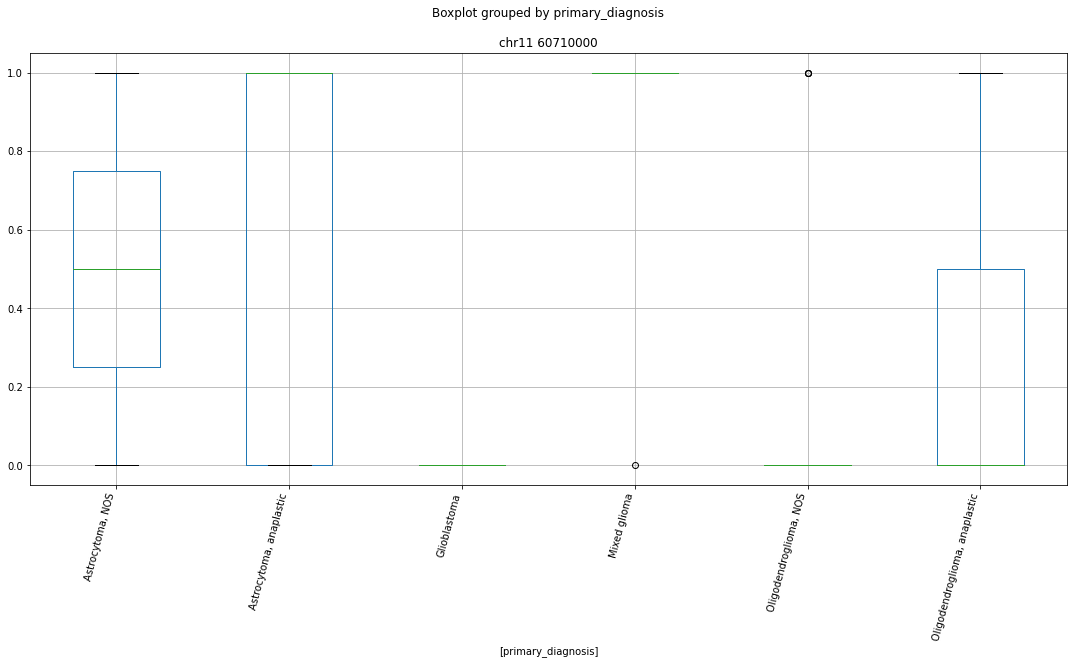

 p : 7.32689326172455e-15  ( t : 12.511533141004804 ) :  chr11 62850000


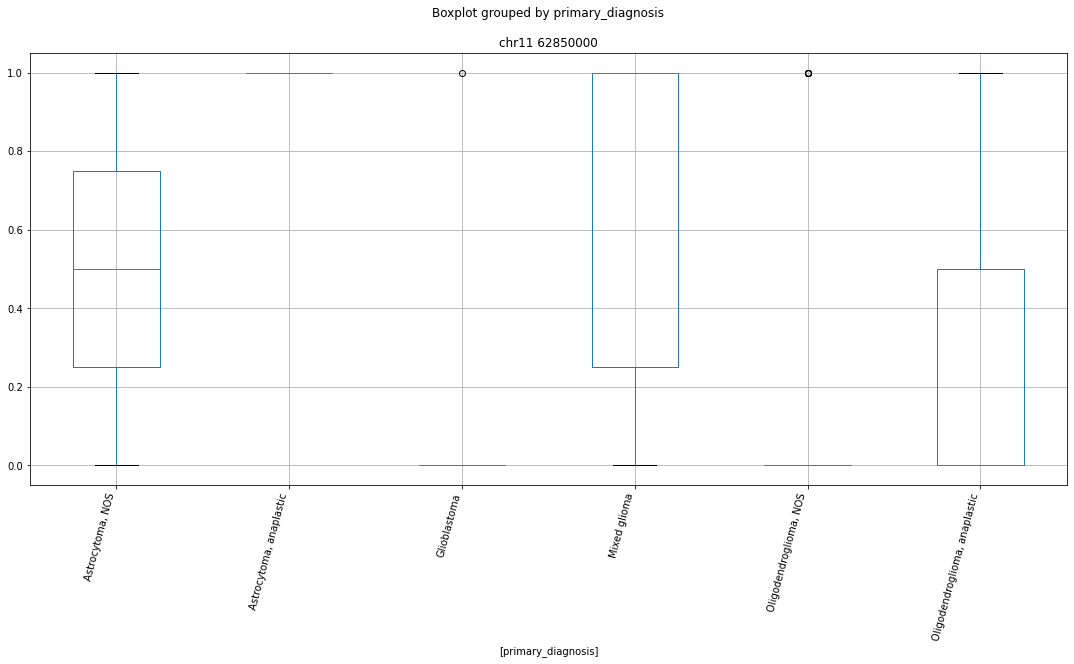

 p : 1.2735213637763693e-13  ( t : 11.358945418727965 ) :  chr16 5750000


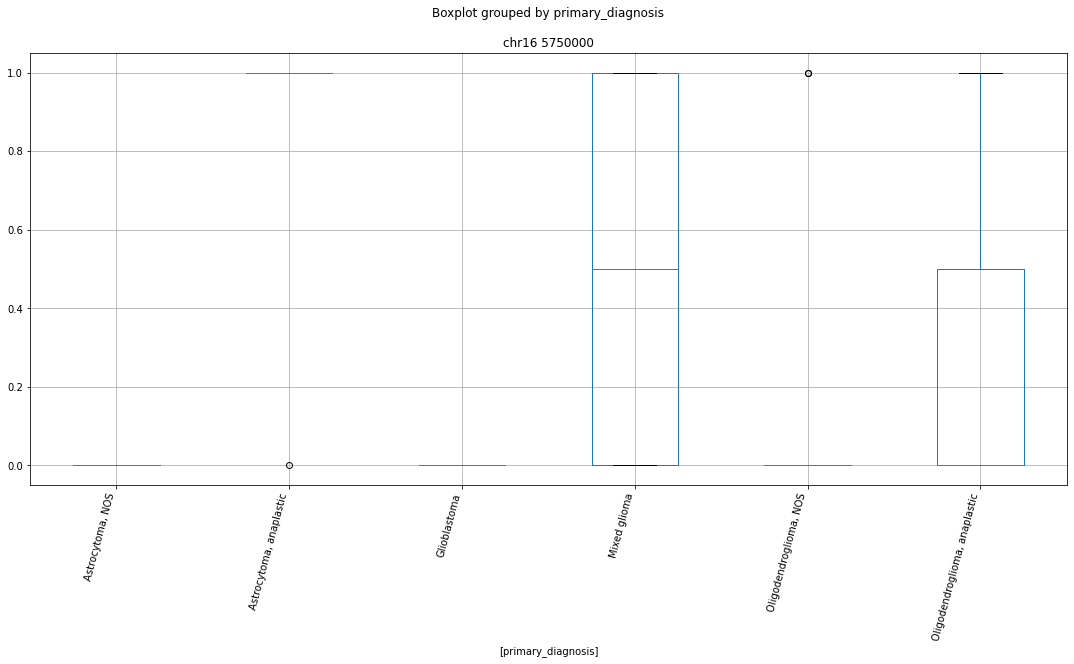

 p : 1.2735213637763693e-13  ( t : 11.358945418727965 ) :  chr19 20150000


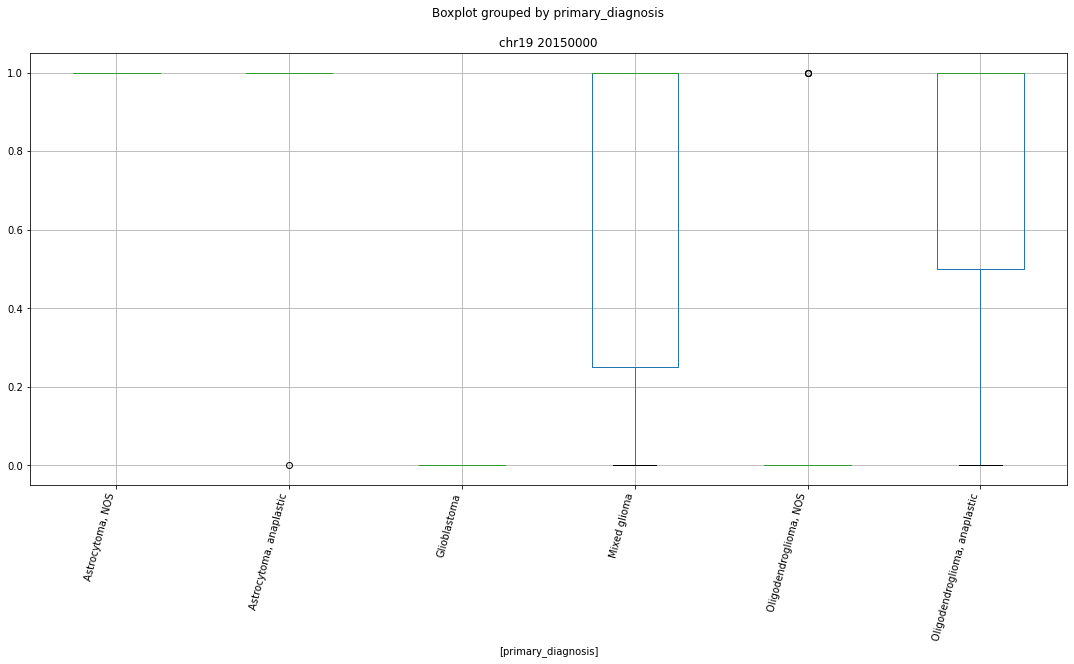

Clustermapping
['chr1 10020000' 'chr1 104130000' 'chr1 108150000' 'chr1 111360000'
 'chr1 111520000' 'chr1 114050000' 'chr1 120420000' 'chr1 1400000'
 'chr1 1410000' 'chr1 144450000' 'chr1 145410000' 'chr1 145930000'
 'chr1 146940000' 'chr1 147100000' 'chr1 147240000' 'chr1 148130000'
 'chr1 149090000' 'chr1 152450000' 'chr1 15370000' 'chr1 155620000'
 'chr1 155630000' 'chr1 156170000' 'chr1 156180000' 'chr1 156320000'
 'chr1 160650000' 'chr1 160910000' 'chr1 165090000' 'chr1 166600000'
 'chr1 198120000' 'chr1 209140000' 'chr1 224330000' 'chr1 224340000'
 'chr1 227600000' 'chr1 246080000' 'chr1 247580000' 'chr1 25580000'
 'chr1 29330000' 'chr1 29350000' 'chr1 33060000' 'chr1 40570000'
 'chr1 45510000' 'chr1 46390000' 'chr1 48170000' 'chr1 65130000'
 'chr1 65140000' 'chr1 66420000' 'chr1 70460000' 'chr1 73130000'
 'chr1 75370000' 'chr1 76110000' 'chr1 77980000' 'chr1 86890000'
 'chr1 9000000' 'chr1 93270000' 'chr1 99830000' 'chr10 102450000'
 'chr10 107800000' 'chr10 121920000' 'chr10 1

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


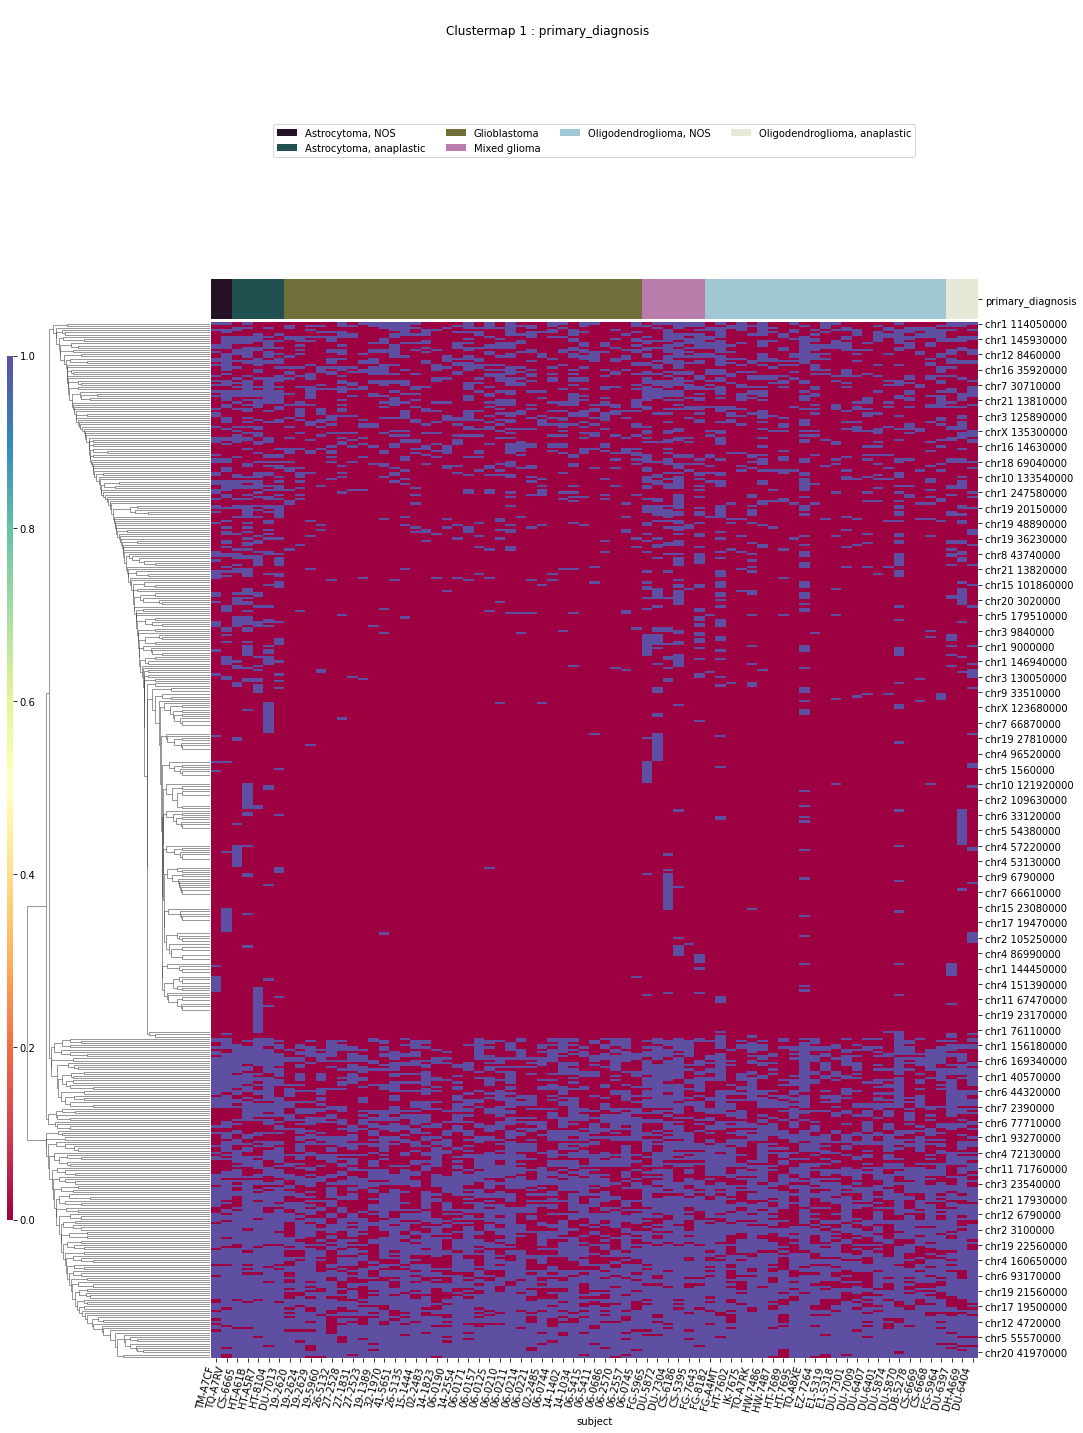

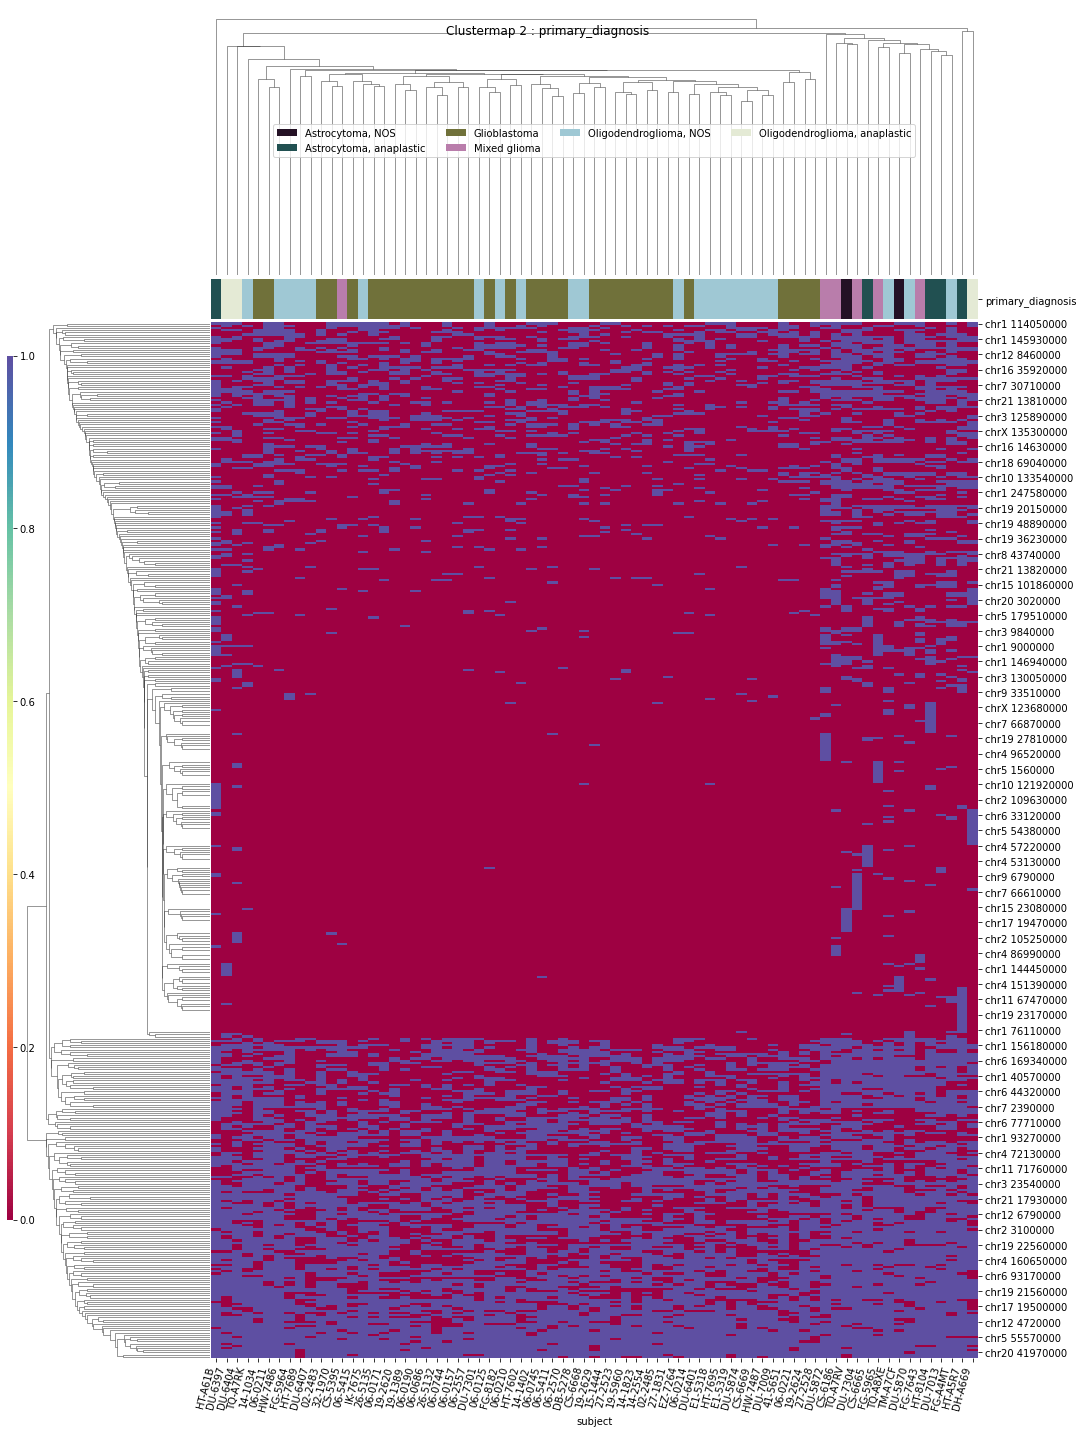

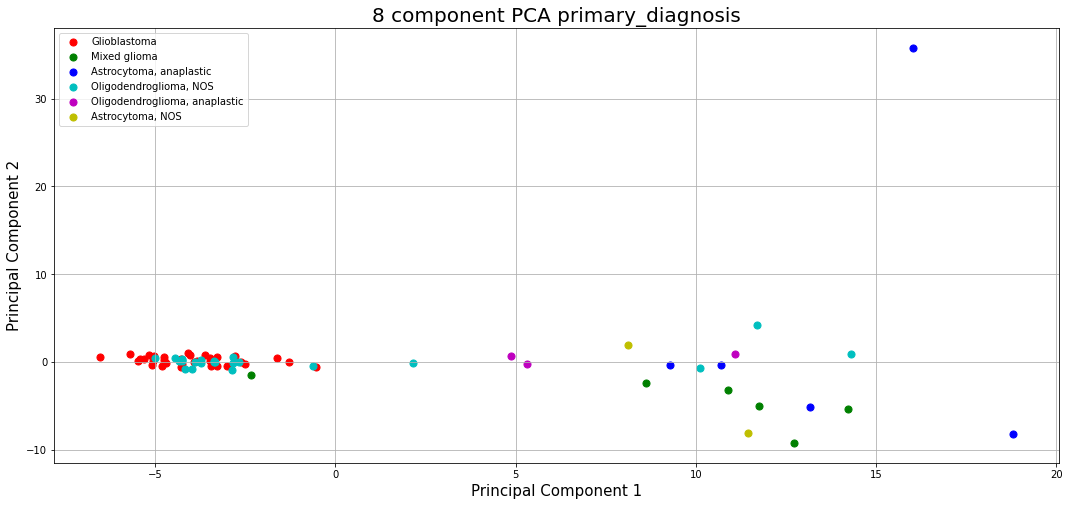

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 104130000' 'chr1 111360000' 'chr1 147100000' 'chr1 150630000'
 'chr1 152450000' 'chr1 156170000' 'chr1 160650000' 'chr1 209140000'
 'chr1 224330000' 'chr1 227600000' 'chr1 29350000' 'chr1 52000000'
 'chr1 54630000' 'chr1 65140000' 'chr10 121920000' 'chr10 43330000'
 'chr10 6160000' 'chr10 65410000' 'chr11 101690000' 'chr11 18900000'
 'chr11 62850000' 'chr11 67860000' 'chr12 105470000' 'chr12 32090000'
 'chr12 32100000' 'chr12 42320000' 'chr13 95260000' 'chr14 100310000'
 'chr14 77410000' 'chr15 65730000' 'chr16 35200000' 'chr16 47860000'
 'chr16 74790000' 'chr16 75810000' 'chr17 30560000' 'chr17 42440000'
 'chr18 68100000' 'chr19 21560000' 'chr19 27810000' 'chr19 28130000'
 'chr19 36330000' 'chr19 37530000' 'chr19 48880000' 'chr19 52550000'
 'chr19 52690000' 'chr19 53440000' 'chr19 54940000' 'chr2 201130000'
 'chr2 20770000' 'chr2 228360000' 'chr2 37220000' 'chr21 17690000'
 'chr22 24210000' 'chr3 185560000' 'chr3 185570000' 'chr3 2

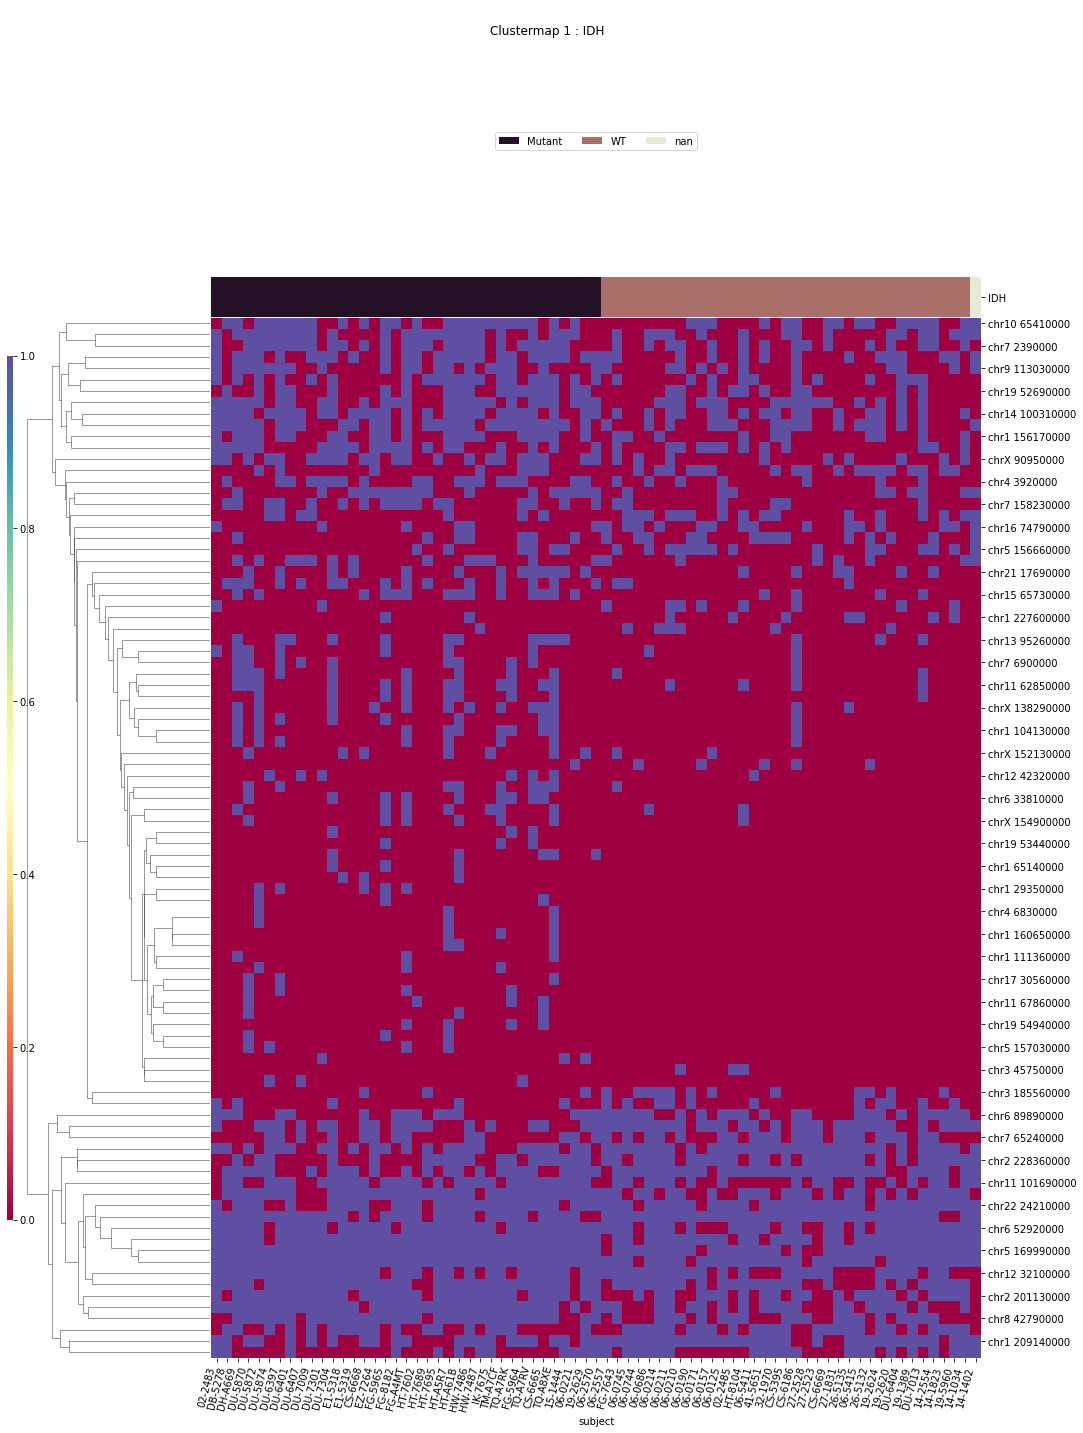

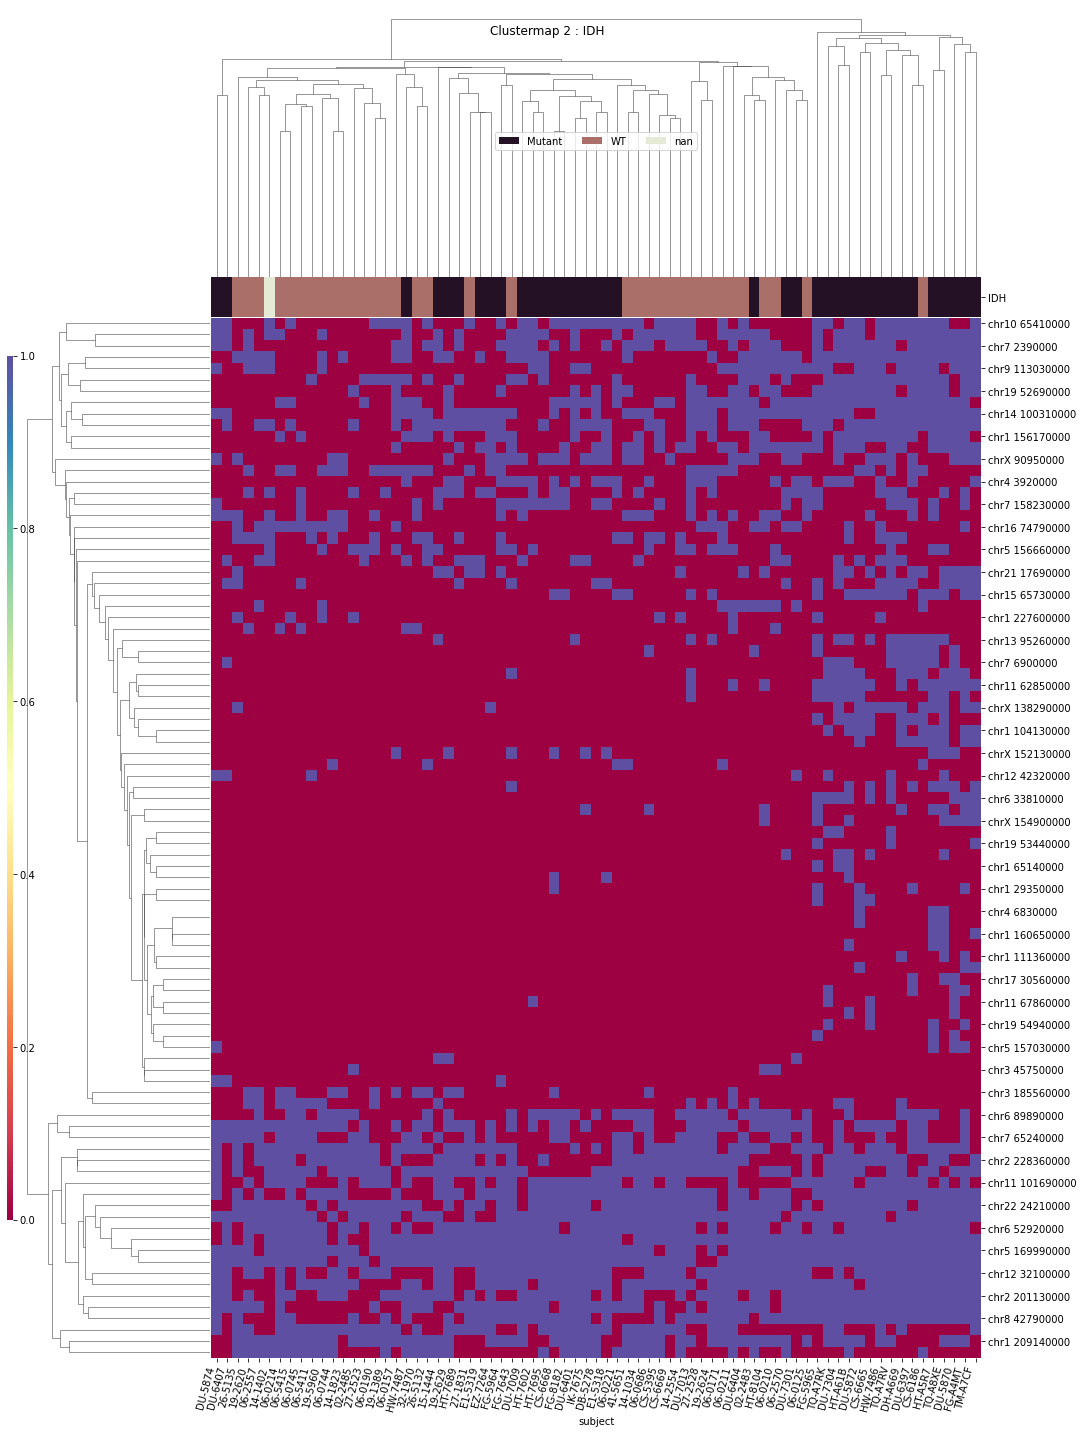

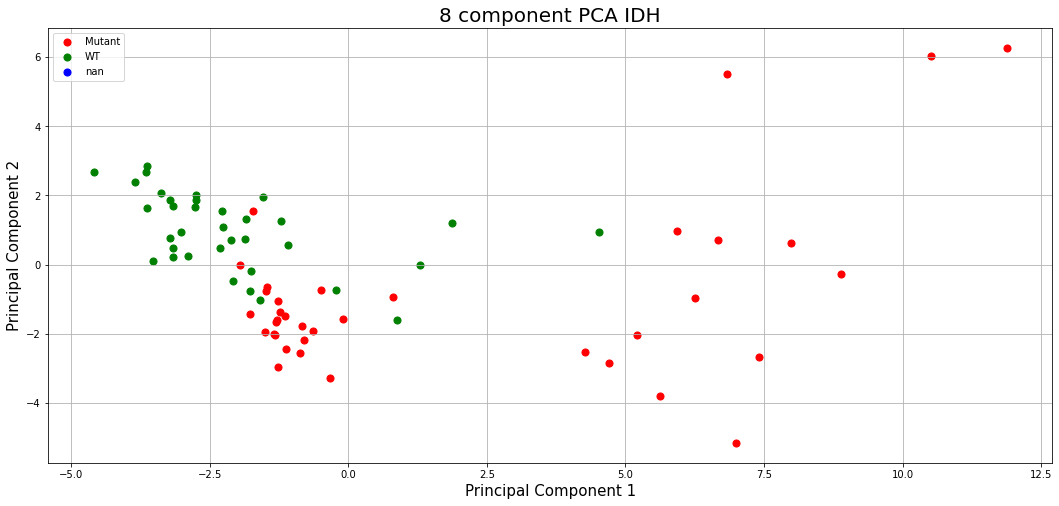

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 108150000' 'chr1 108510000' 'chr1 15130000' 'chr1 152450000'
 'chr1 211220000' 'chr1 247010000' 'chr1 37890000' 'chr1 46320000'
 'chr1 79700000' 'chr10 121920000' 'chr10 90300000' 'chr11 59130000'
 'chr11 63520000' 'chr12 121630000' 'chr12 32090000' 'chr12 32100000'
 'chr12 34180000' 'chr12 75440000' 'chr12 93070000' 'chr12 9600000'
 'chr13 18710000' 'chr13 69610000' 'chr15 65220000' 'chr16 35200000'
 'chr16 74790000' 'chr16 75810000' 'chr17 19500000' 'chr17 21590000'
 'chr17 30560000' 'chr17 54200000' 'chr17 82740000' 'chr18 26920000'
 'chr19 20280000' 'chr19 21560000' 'chr19 37320000' 'chr19 51860000'
 'chr19 53260000' 'chr19 53460000' 'chr19 54210000' 'chr2 111960000'
 'chr2 207030000' 'chr2 228360000' 'chr2 32270000' 'chr20 29440000'
 'chr22 24210000' 'chr3 12670000' 'chr3 145700000' 'chr3 175900000'
 'chr3 189250000' 'chr3 50510000' 'chr4 135530000' 'chr4 150000'
 'chr4 160650000' 'chr4 3920000' 'chr4 49030000' 'chr5 156660000'
 '

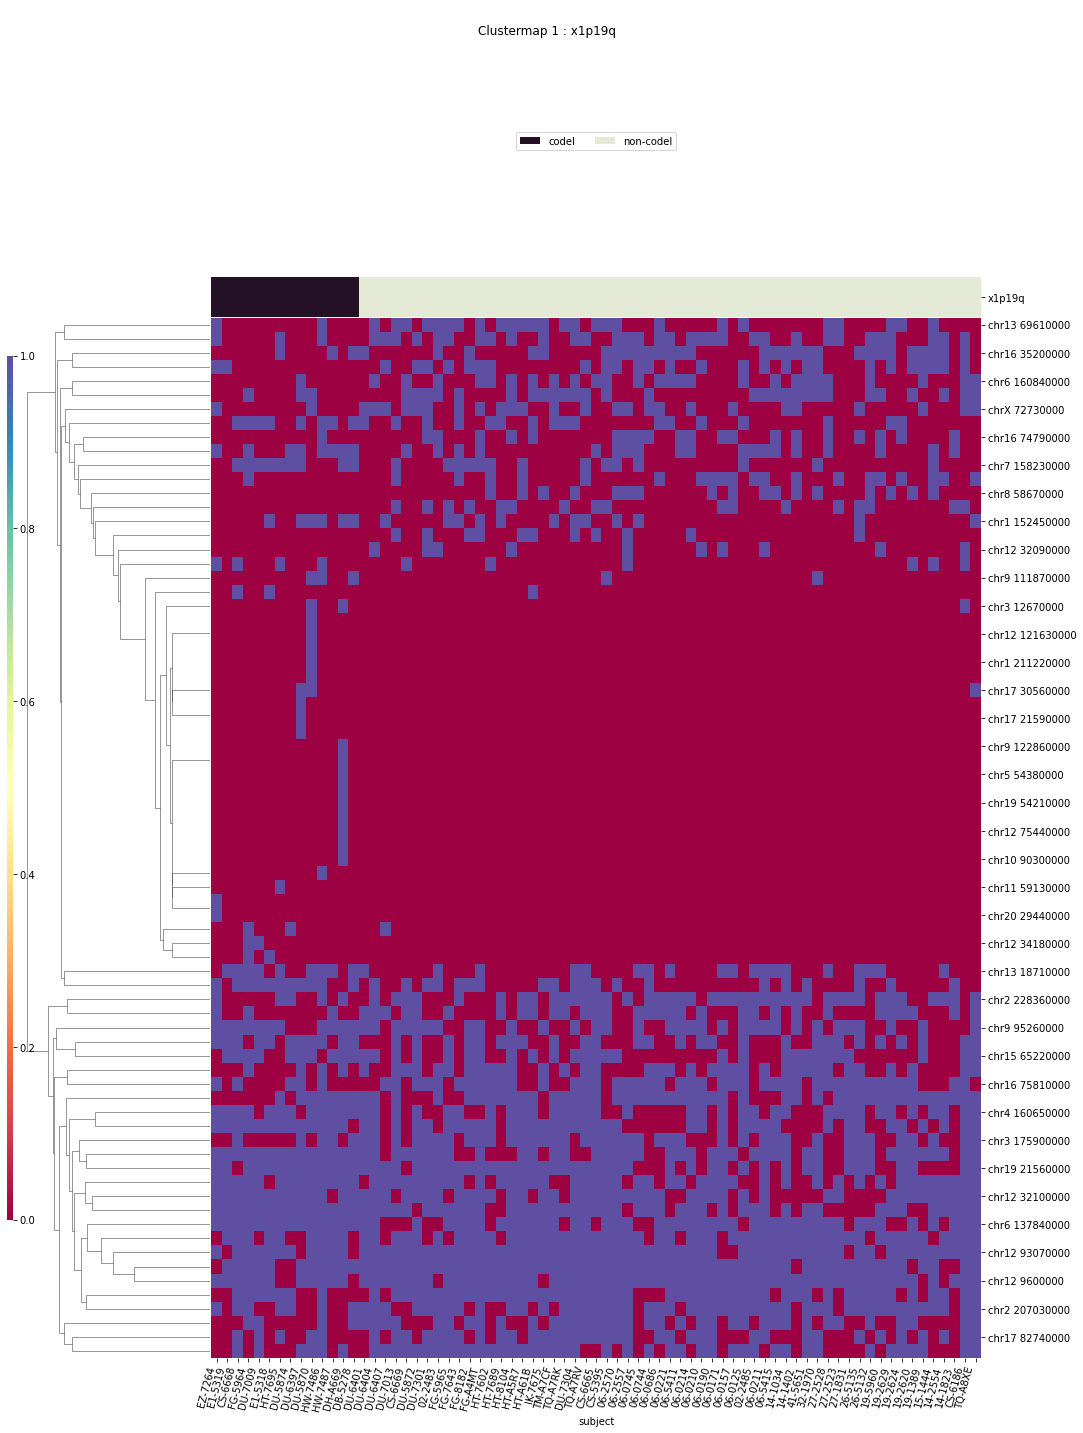

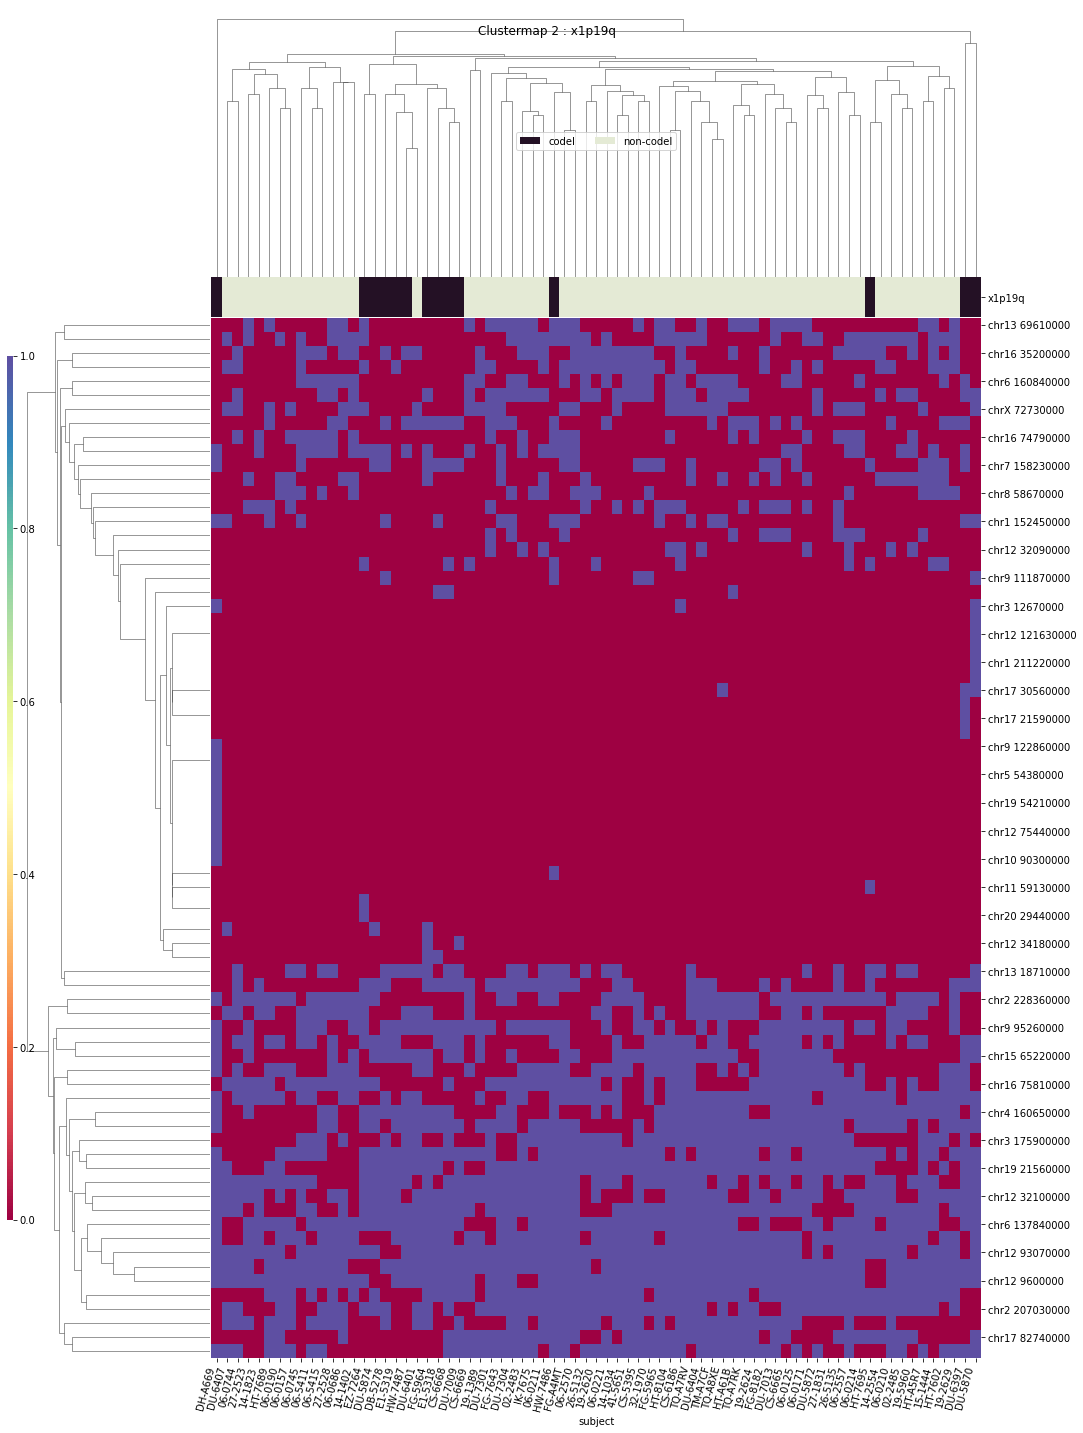

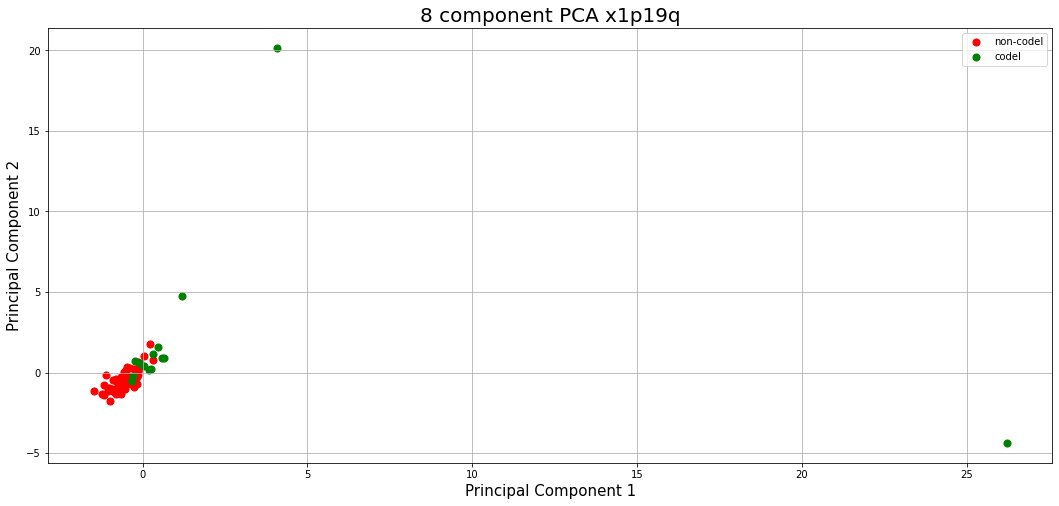

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 10020000' 'chr1 104130000' 'chr1 120420000' 'chr1 1400000'
 'chr1 1410000' 'chr1 147100000' 'chr1 147730000' 'chr1 150630000'
 'chr1 152450000' 'chr1 155620000' 'chr1 160650000' 'chr1 224330000'
 'chr1 46390000' 'chr1 52000000' 'chr1 65140000' 'chr1 75370000'
 'chr1 9000000' 'chr1 99830000' 'chr10 43330000' 'chr11 18900000'
 'chr11 24440000' 'chr11 62360000' 'chr11 62380000' 'chr11 62850000'
 'chr11 63520000' 'chr11 67470000' 'chr11 67860000' 'chr12 10570000'
 'chr12 123580000' 'chr12 42320000' 'chr12 59100000' 'chr12 6190000'
 'chr12 73000000' 'chr12 85460000' 'chr13 69610000' 'chr13 95260000'
 'chr14 106440000' 'chr14 77410000' 'chr14 77660000' 'chr15 28180000'
 'chr15 65730000' 'chr15 78220000' 'chr17 19500000' 'chr17 30700000'
 'chr17 46280000' 'chr17 5140000' 'chr18 46080000' 'chr19 20150000'
 'chr19 21560000' 'chr19 27810000' 'chr19 28130000' 'chr19 36330000'
 'chr19 37320000' 'chr19 37530000' 'chr19 37620000' 'chr19 3947000

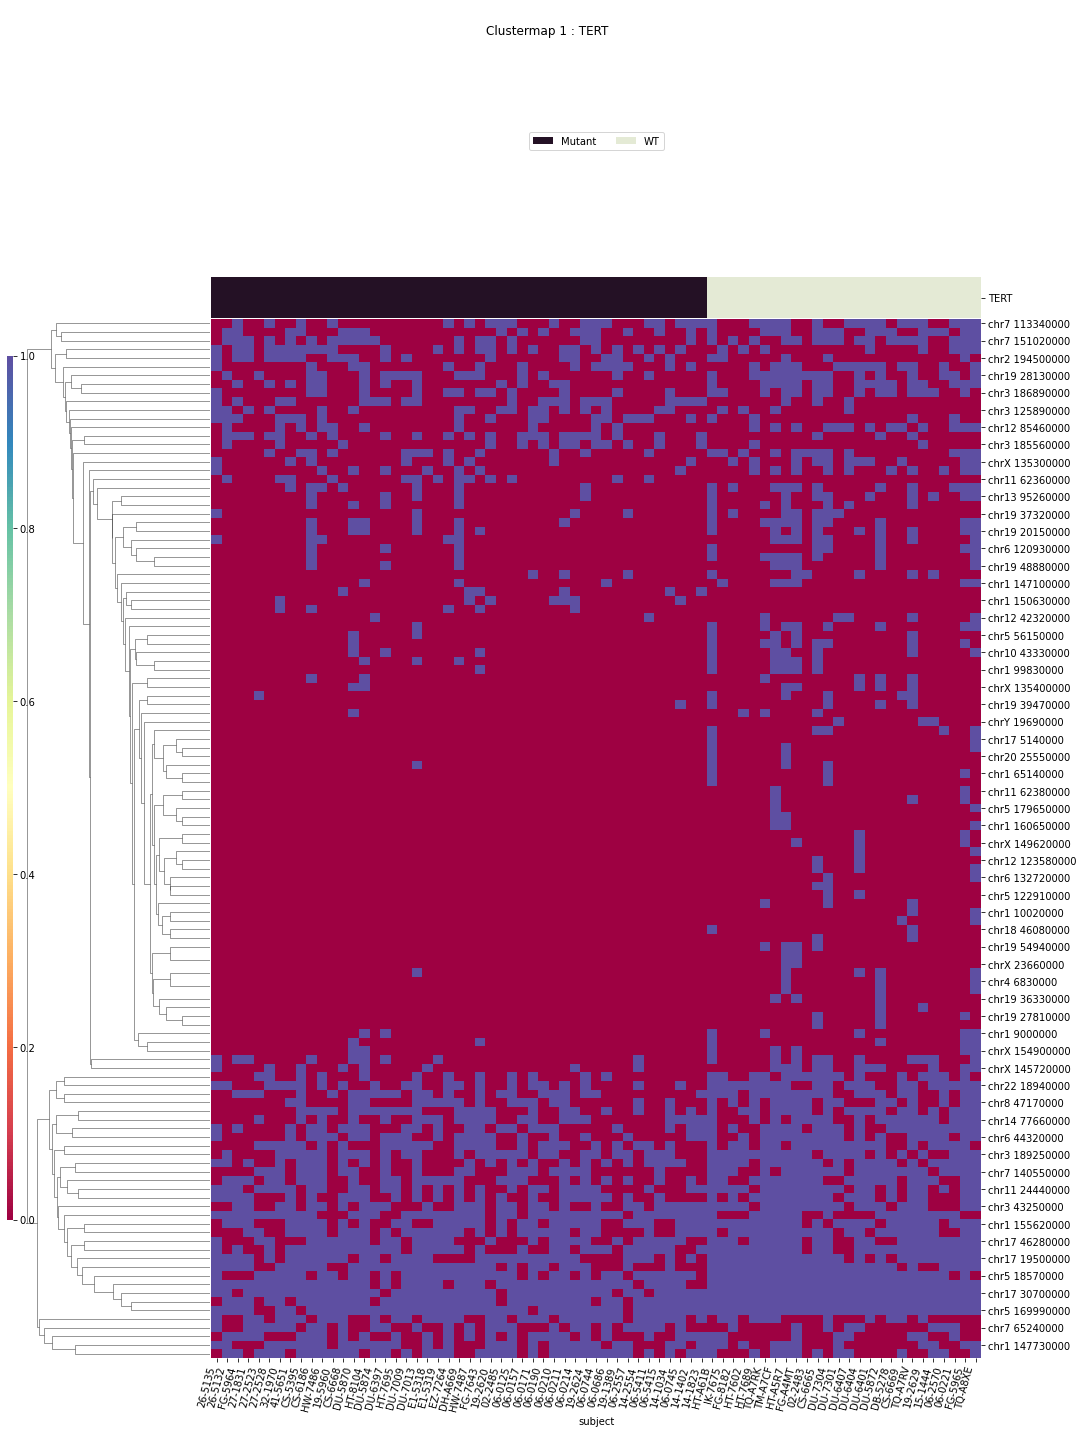

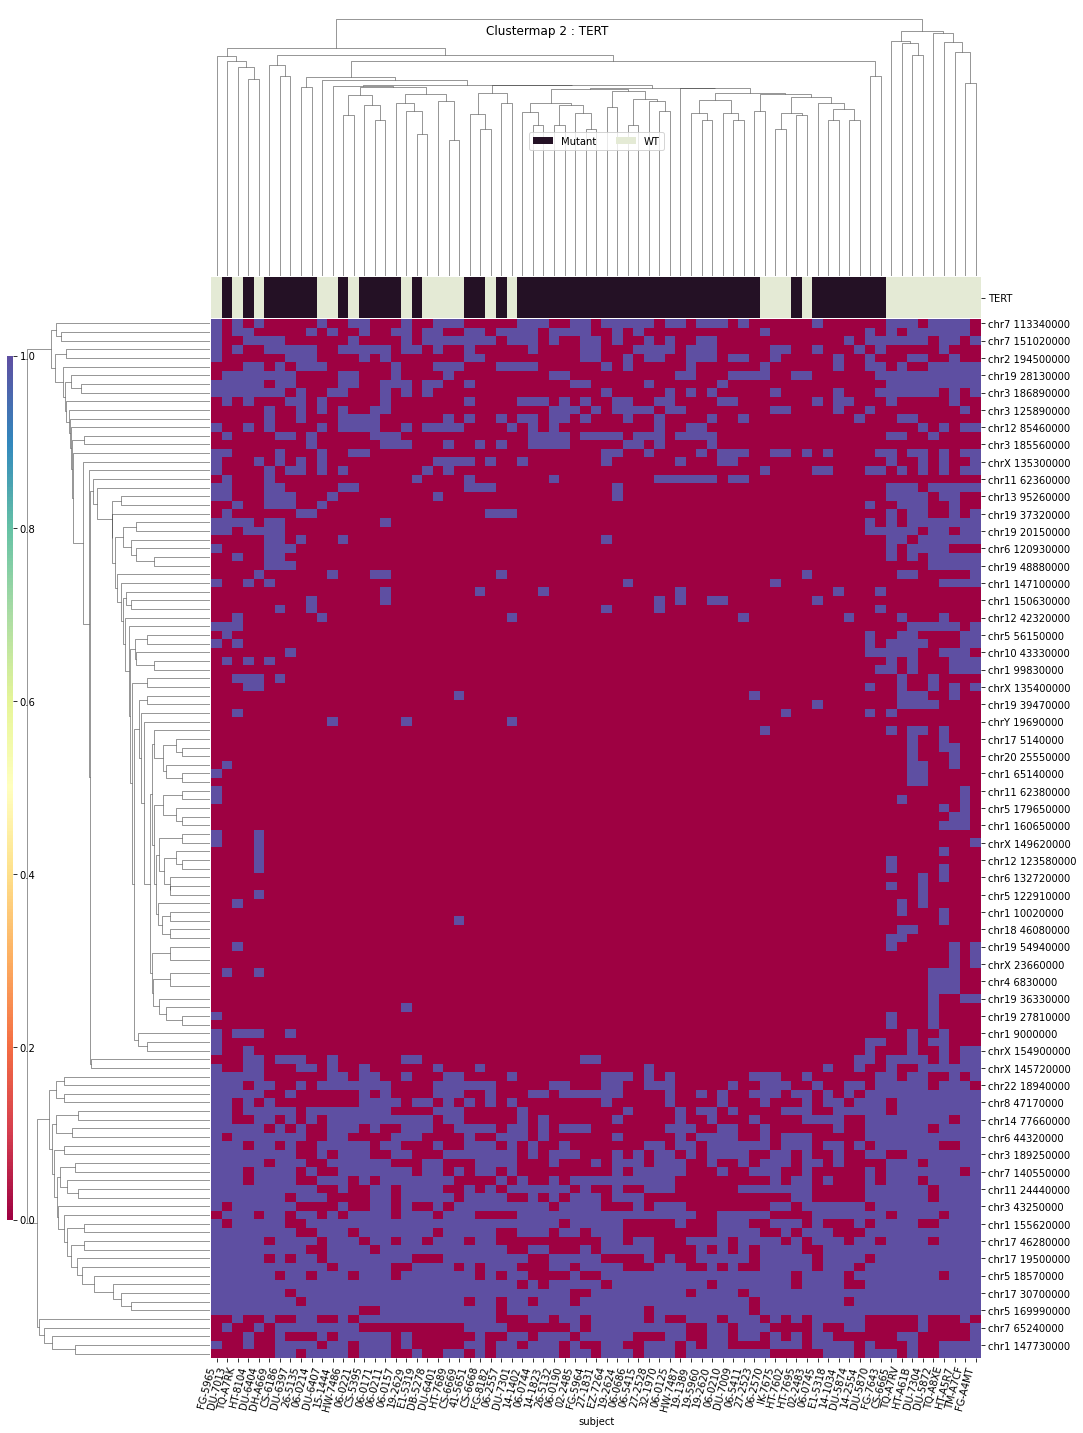

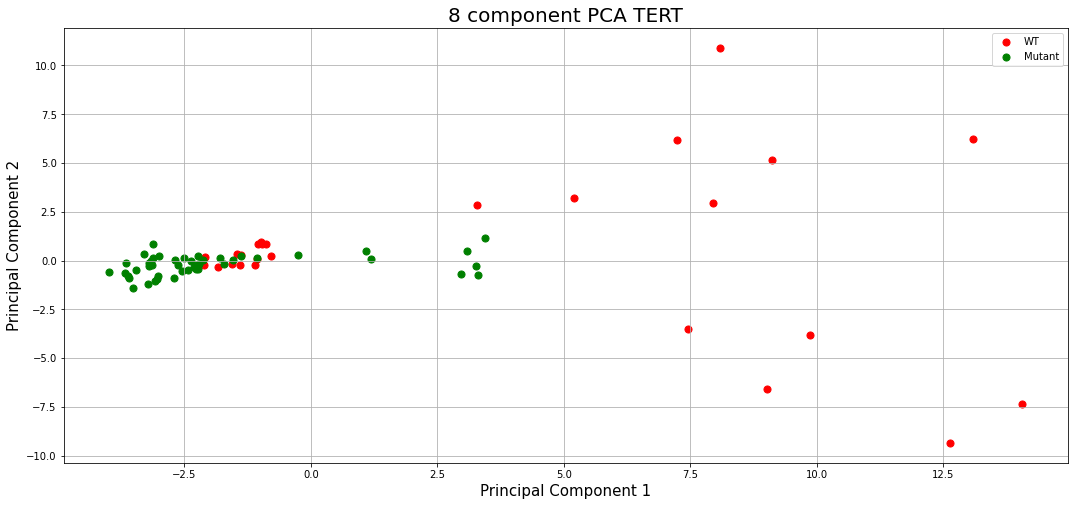

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104130000' 'chr1 1400000' 'chr1 1410000' 'chr1 145930000'
 'chr1 146940000' 'chr1 147100000' 'chr1 150630000' 'chr1 152450000'
 'chr1 155620000' 'chr1 156170000' 'chr1 161010000' 'chr1 209140000'
 'chr1 224330000' 'chr1 246080000' 'chr1 25580000' 'chr1 29330000'
 'chr1 29350000' 'chr1 33060000' 'chr1 46320000' 'chr1 52000000'
 'chr1 66590000' 'chr1 70460000' 'chr1 75370000' 'chr1 89060000'
 'chr1 9000000' 'chr1 99830000' 'chr10 102450000' 'chr10 43330000'
 'chr10 65410000' 'chr10 97410000' 'chr11 101690000' 'chr11 118720000'
 'chr11 60710000' 'chr11 61650000' 'chr11 62850000' 'chr11 67860000'
 'chr12 10570000' 'chr12 123490000' 'chr12 32100000' 'chr12 42320000'
 'chr12 4720000' 'chr12 58330000' 'chr12 73000000' 'chr12 73340000'
 'chr12 8460000' 'chr13 49590000' 'chr13 90090000' 'chr13 95260000'
 'chr14 100310000' 'chr14 77790000' 'chr15 101860000' 'chr15 63080000'
 'chr15 65220000' 'chr15 65730000' 'chr16 14630000' 'chr16 2122000

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


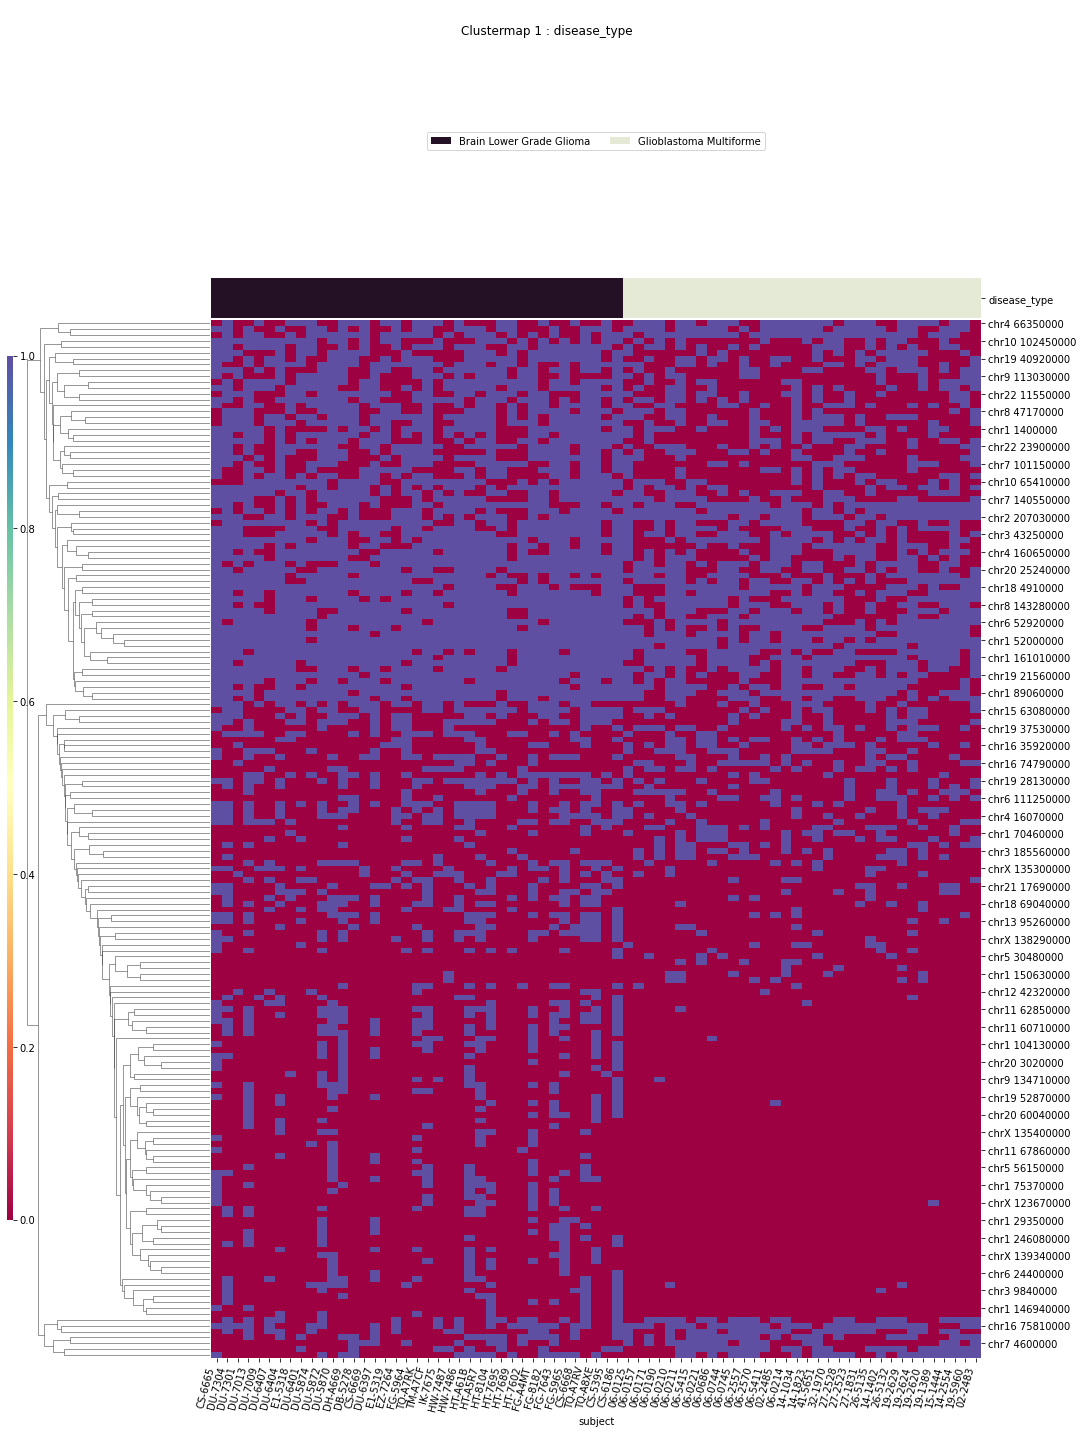

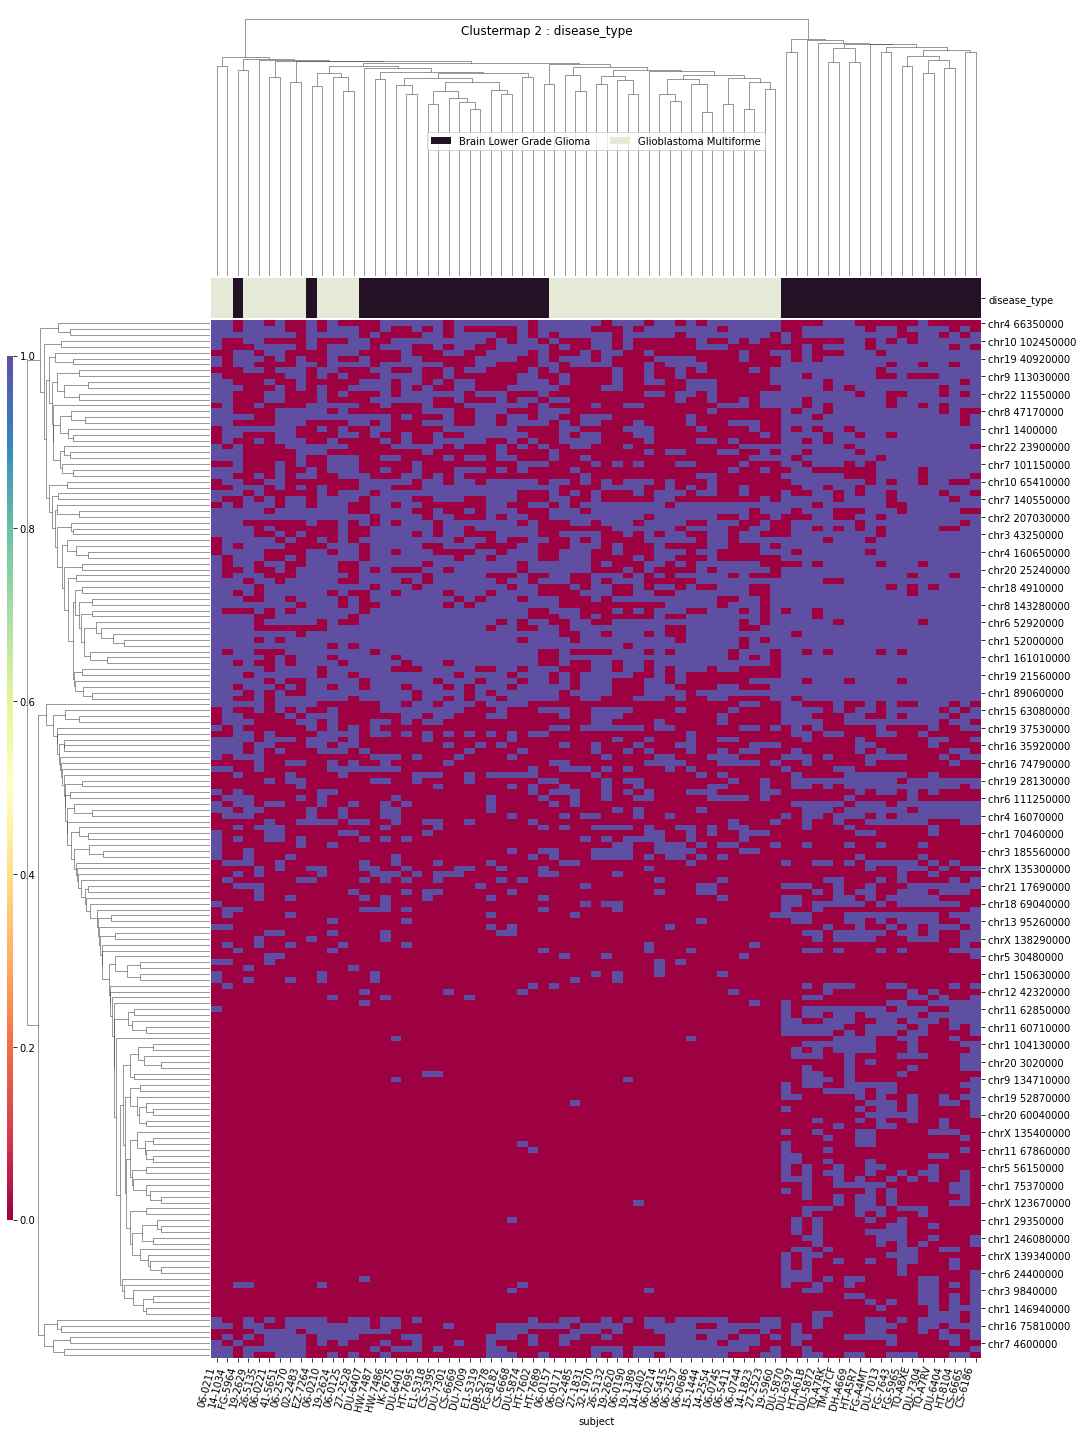

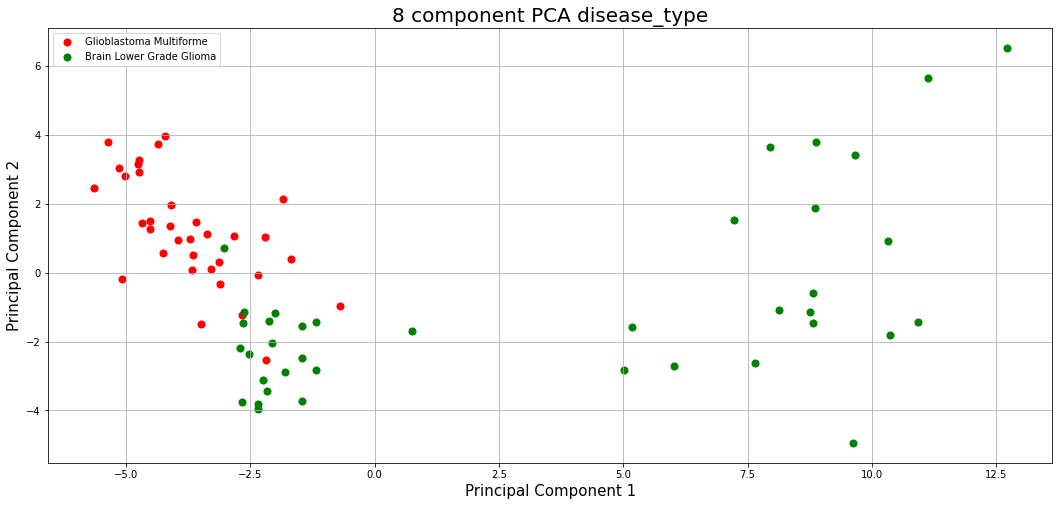

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 10020000' 'chr1 104130000' 'chr1 108510000'
 'chr1 111360000' 'chr1 120420000' 'chr1 1400000' 'chr1 1410000'
 'chr1 147100000' 'chr1 150630000' 'chr1 15130000' 'chr1 152450000'
 'chr1 156170000' 'chr1 1580000' 'chr1 160650000' 'chr1 209140000'
 'chr1 224330000' 'chr1 227600000' 'chr1 247010000' 'chr1 29350000'
 'chr1 46320000' 'chr1 52000000' 'chr1 65140000' 'chr1 75370000'
 'chr1 77980000' 'chr1 99830000' 'chr10 121920000' 'chr10 43330000'
 'chr10 6160000' 'chr10 65410000' 'chr11 101690000' 'chr11 18900000'
 'chr11 60710000' 'chr11 62360000' 'chr11 62380000' 'chr11 62850000'
 'chr11 63520000' 'chr11 67470000' 'chr11 67860000' 'chr12 32090000'
 'chr12 32100000' 'chr12 34180000' 'chr12 42320000' 'chr12 59100000'
 'chr12 6190000' 'chr12 8460000' 'chr12 85460000' 'chr12 93070000'
 'chr13 18710000' 'chr13 69610000' 'chr13 95260000' 'chr14 100310000'
 'chr14 106440000' 'chr14 77410000' 'chr15 63080000' 'chr15 65220000'
 'chr15 65730000' '

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


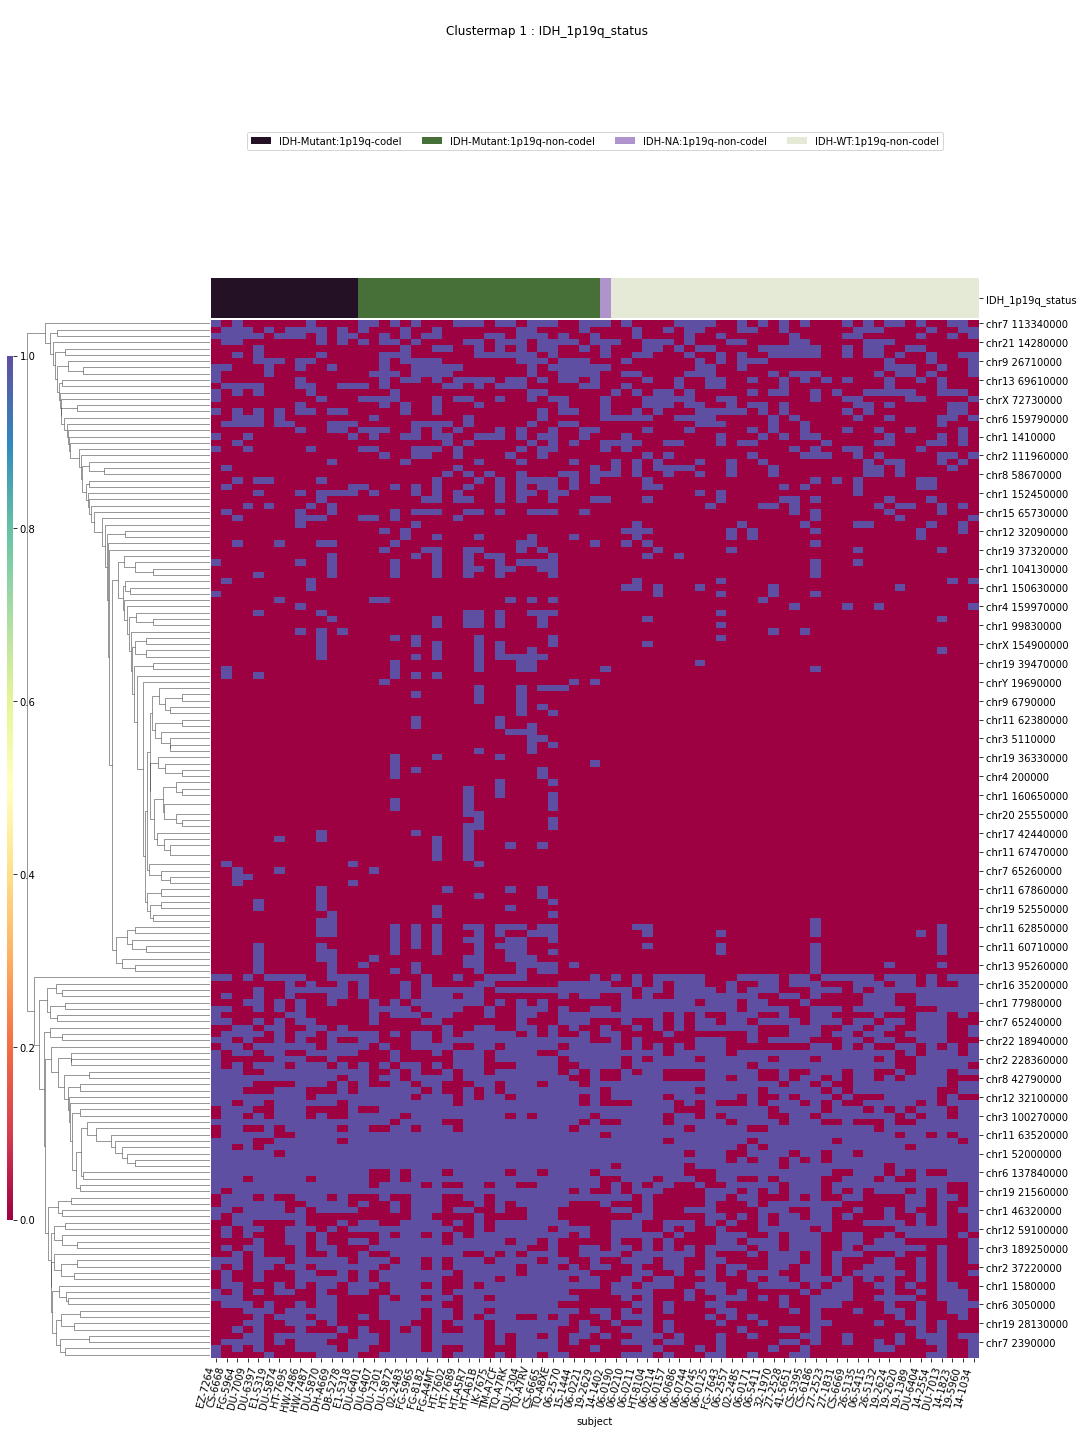

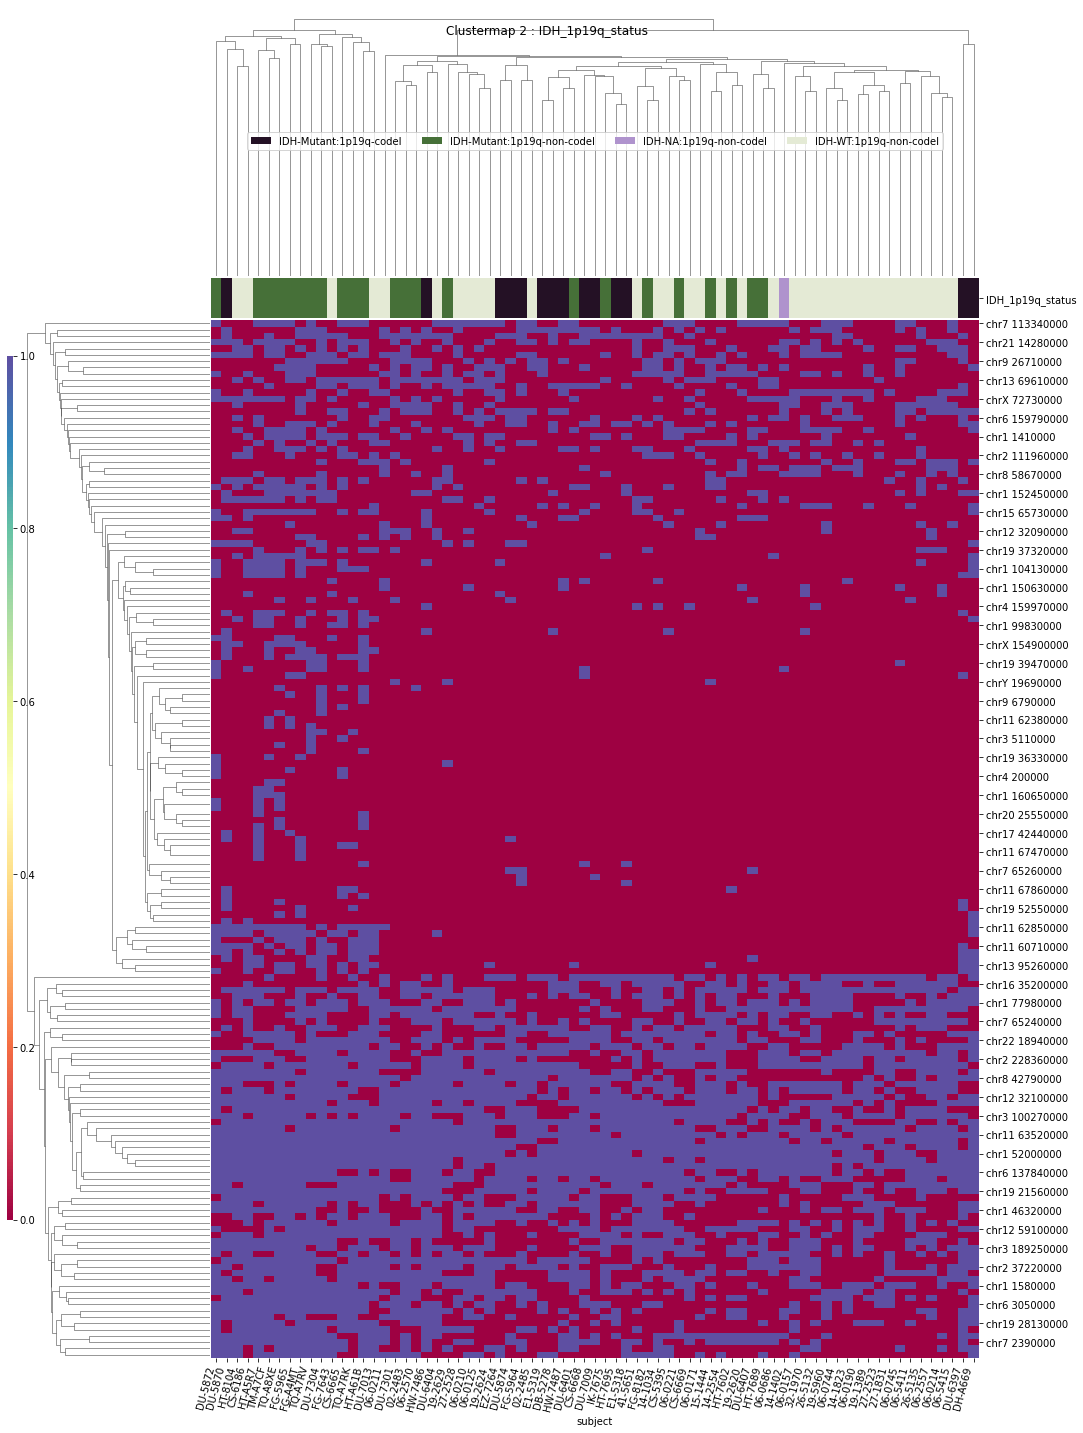

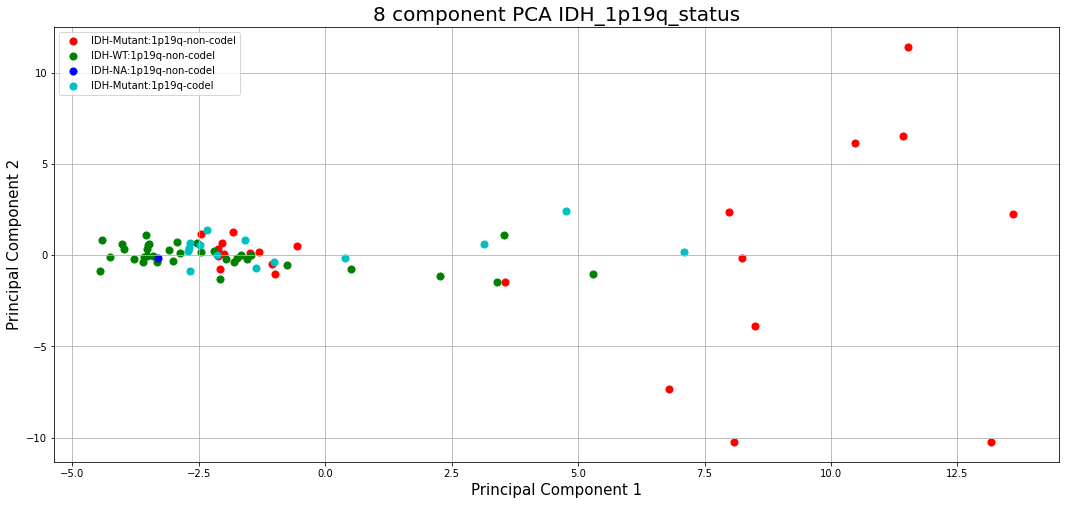

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104130000' 'chr1 10420000' 'chr1 108510000'
 'chr1 111360000' 'chr1 111520000' 'chr1 114050000' 'chr1 120420000'
 'chr1 13350000' 'chr1 1400000' 'chr1 1410000' 'chr1 144450000'
 'chr1 145410000' 'chr1 145930000' 'chr1 146940000' 'chr1 147100000'
 'chr1 147240000' 'chr1 148130000' 'chr1 149090000' 'chr1 15130000'
 'chr1 152450000' 'chr1 15370000' 'chr1 155600000' 'chr1 155620000'
 'chr1 155630000' 'chr1 156170000' 'chr1 156180000' 'chr1 156320000'
 'chr1 1580000' 'chr1 159760000' 'chr1 160650000' 'chr1 160690000'
 'chr1 160940000' 'chr1 161010000' 'chr1 166600000' 'chr1 198120000'
 'chr1 209140000' 'chr1 224330000' 'chr1 224340000' 'chr1 246080000'
 'chr1 247010000' 'chr1 247580000' 'chr1 29350000' 'chr1 29360000'
 'chr1 33060000' 'chr1 45510000' 'chr1 46320000' 'chr1 46390000'
 'chr1 48170000' 'chr1 54630000' 'chr1 65140000' 'chr1 66590000'
 'chr1 70460000' 'chr1 73130000' 'chr1 75370000' 'chr1 76110000'
 'chr1 7798000

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


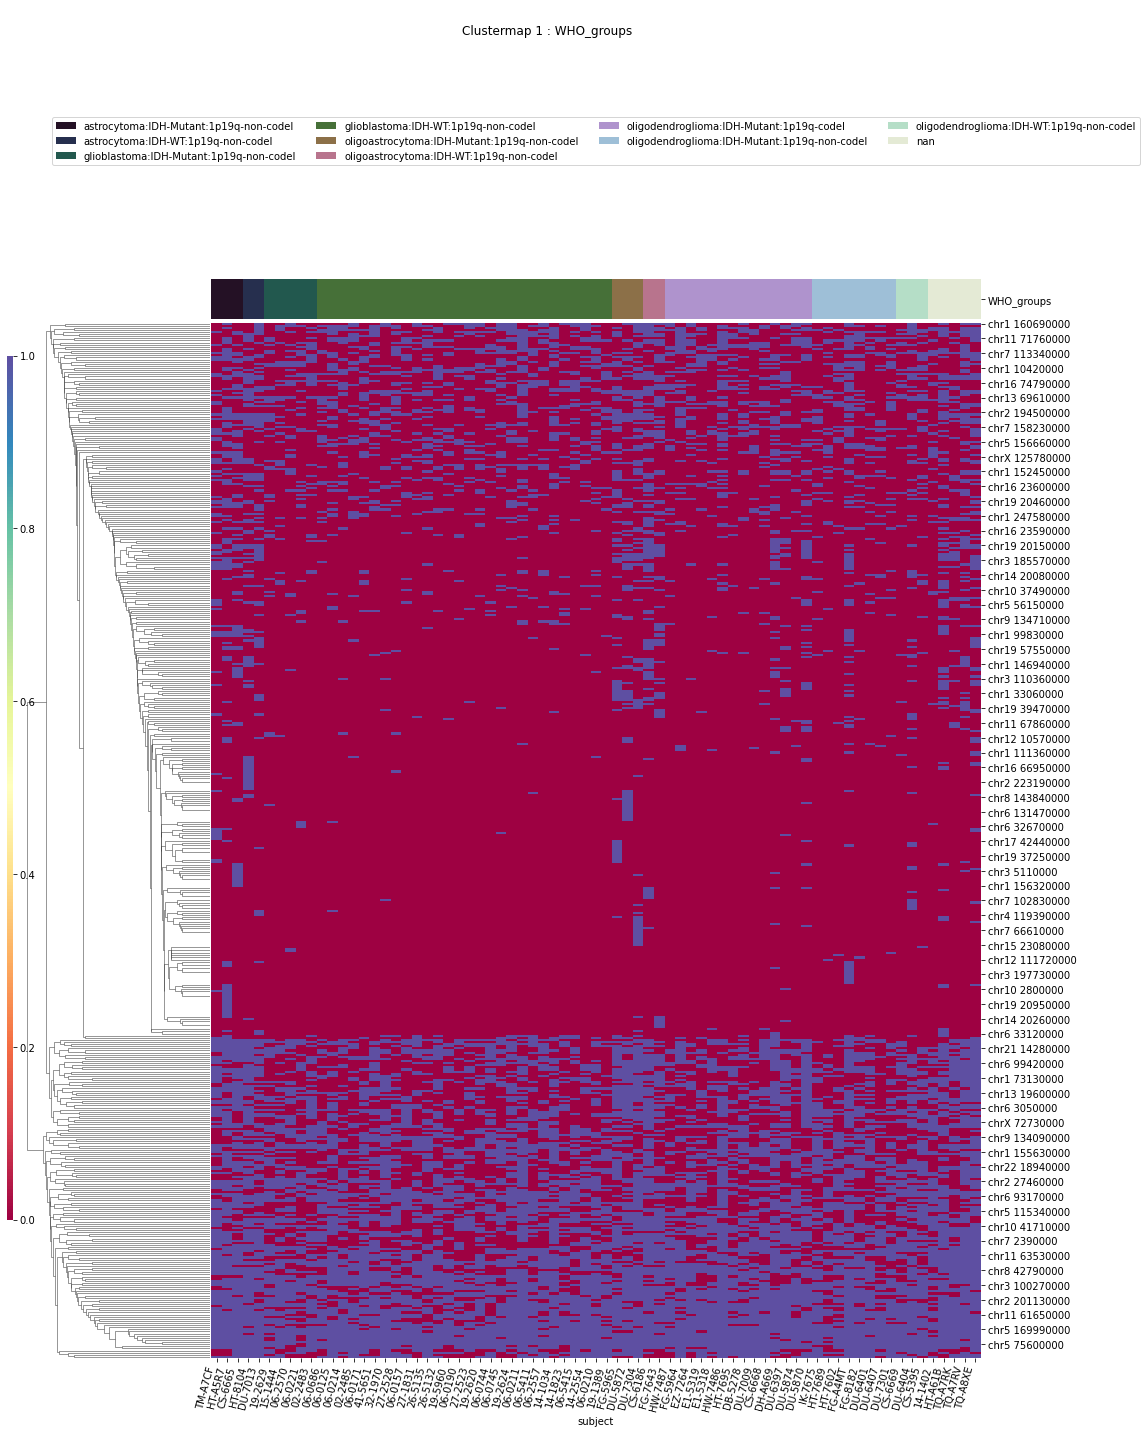

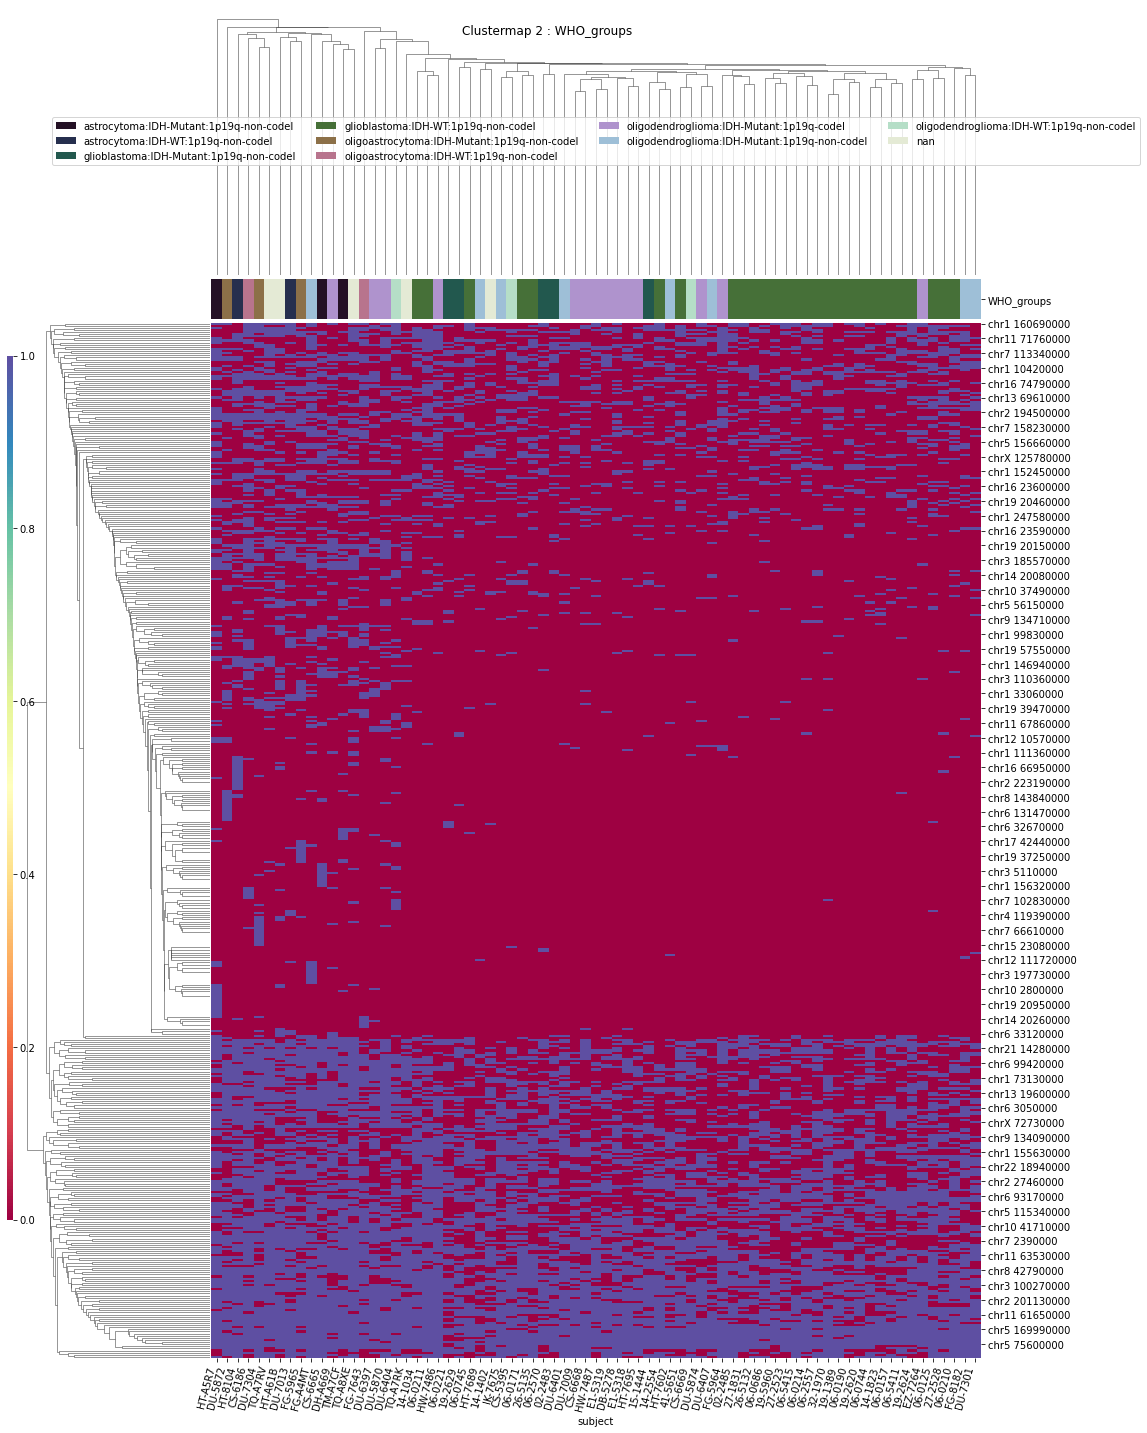

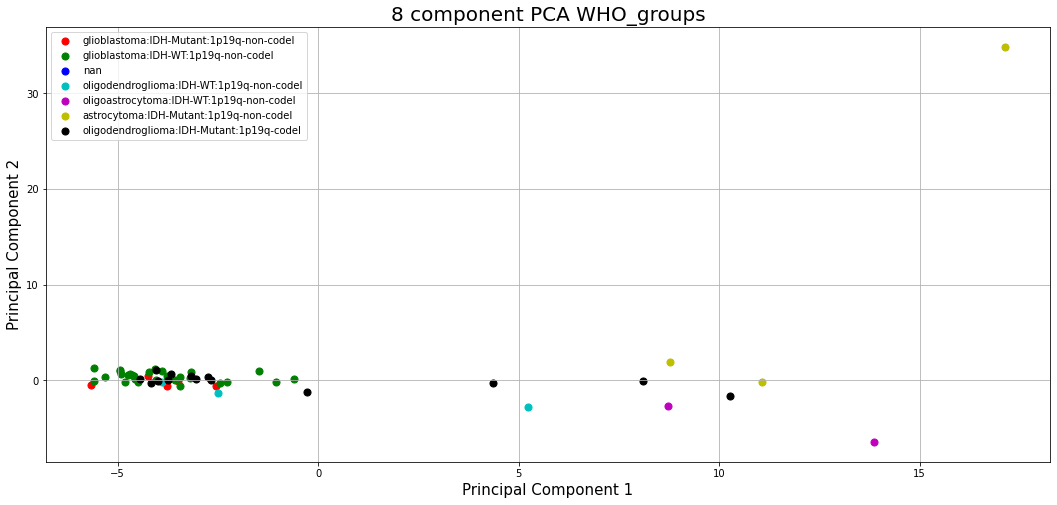

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 10020000' 'chr1 104130000' 'chr1 108510000'
 'chr1 111360000' 'chr1 120420000' 'chr1 1400000' 'chr1 1410000'
 'chr1 147100000' 'chr1 147730000' 'chr1 150630000' 'chr1 15130000'
 'chr1 152450000' 'chr1 155620000' 'chr1 155630000' 'chr1 156170000'
 'chr1 160650000' 'chr1 209140000' 'chr1 224330000' 'chr1 227600000'
 'chr1 247010000' 'chr1 29330000' 'chr1 29350000' 'chr1 45510000'
 'chr1 46320000' 'chr1 46390000' 'chr1 52000000' 'chr1 65140000'
 'chr1 73120000' 'chr1 75370000' 'chr1 9000000' 'chr1 99830000'
 'chr10 102450000' 'chr10 121920000' 'chr10 41710000' 'chr10 43330000'
 'chr10 6160000' 'chr10 65410000' 'chr10 99250000' 'chr11 101690000'
 'chr11 18900000' 'chr11 60710000' 'chr11 62360000' 'chr11 62380000'
 'chr11 62850000' 'chr11 63520000' 'chr11 67470000' 'chr11 67860000'
 'chr11 71760000' 'chr12 105470000' 'chr12 10570000' 'chr12 118100000'
 'chr12 123580000' 'chr12 32090000' 'chr12 32100000' 'chr12 34180000'
 'chr12 42320000' 'chr

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


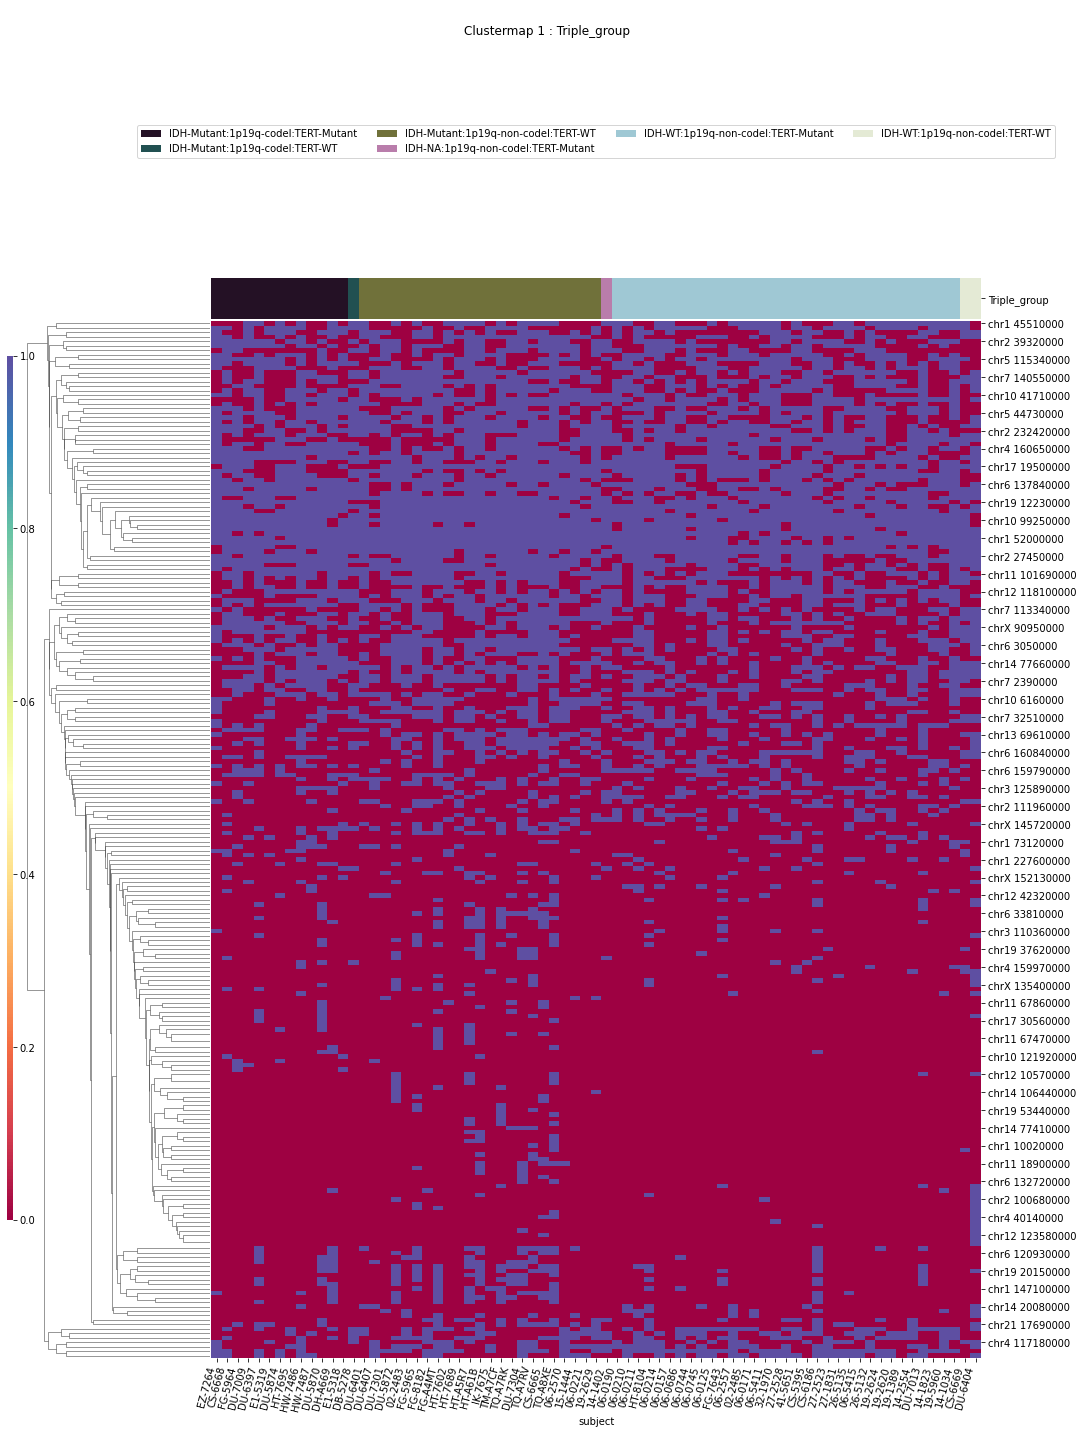

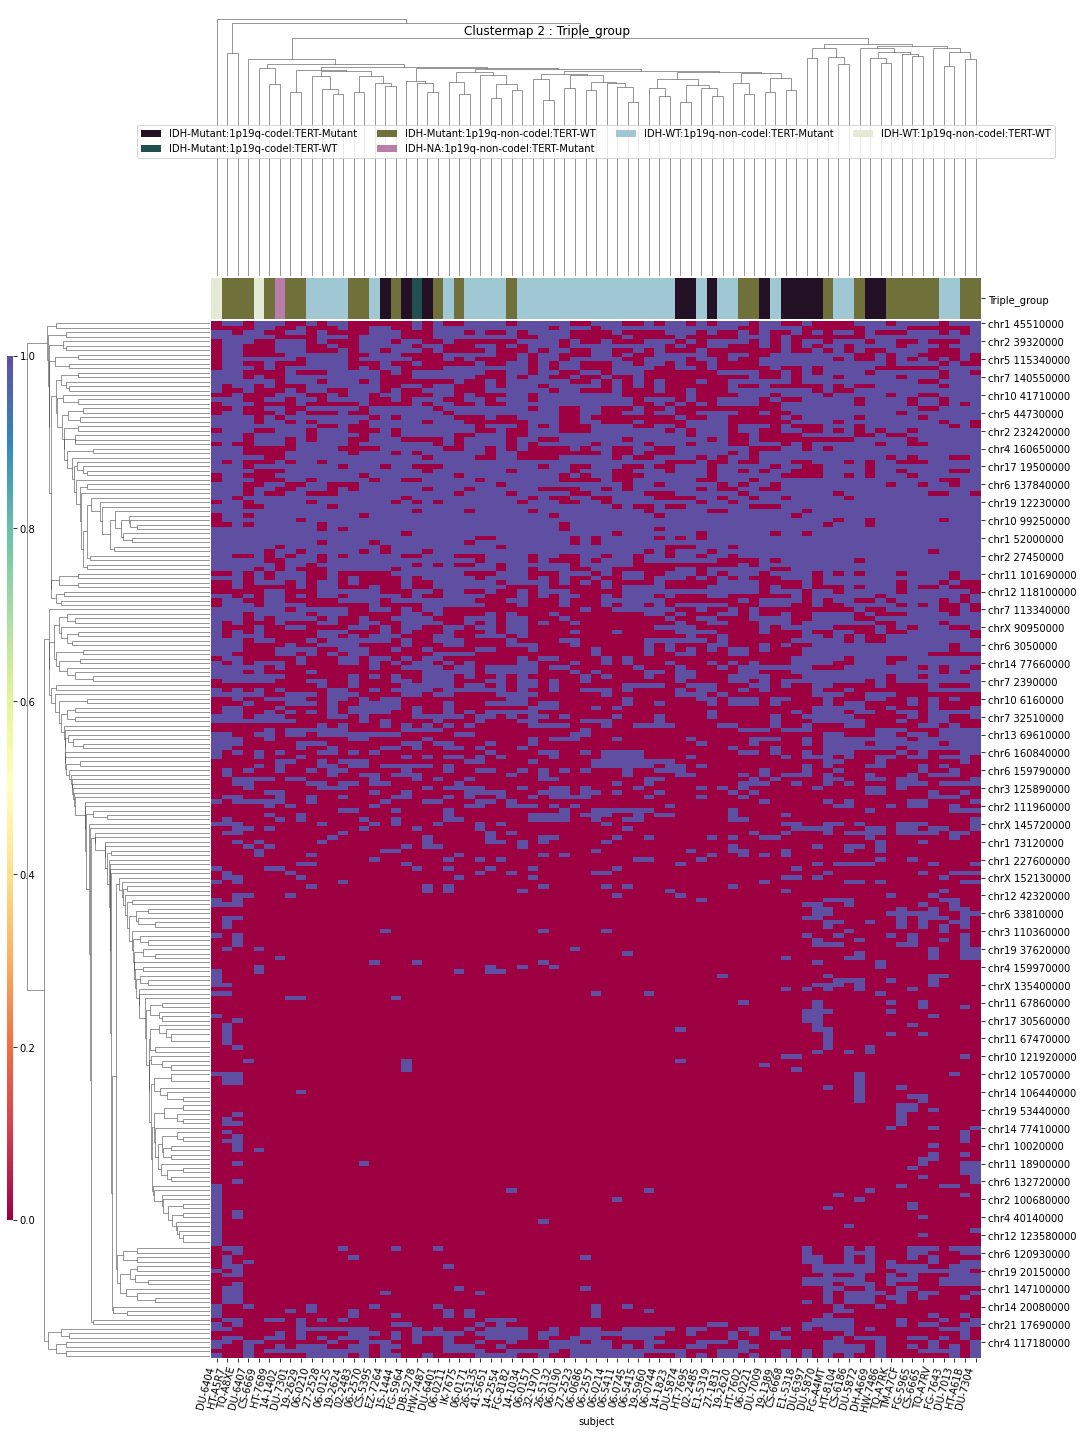

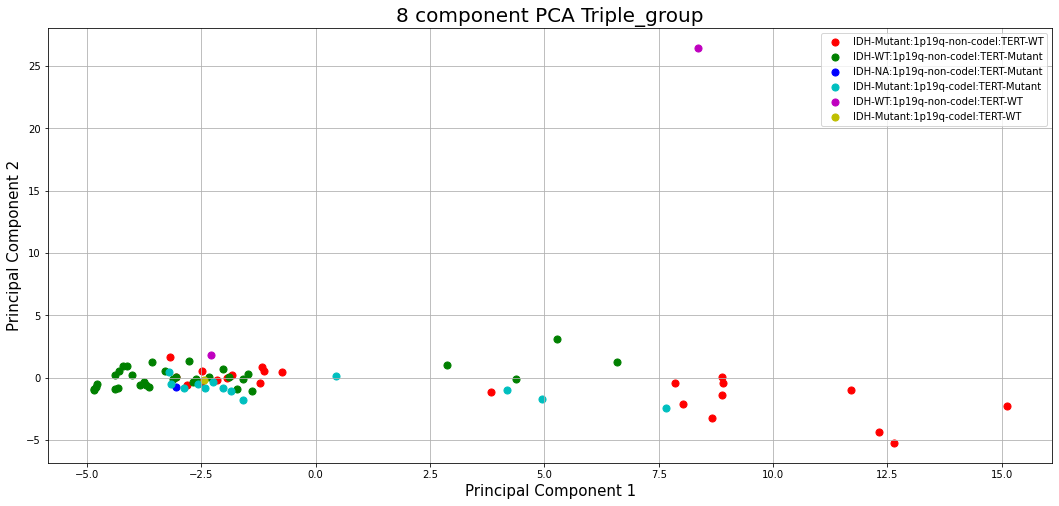

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 111250000' 'chr1 146940000' 'chr1 152450000'
 'chr1 155600000' 'chr1 160690000' 'chr1 227600000' 'chr1 29360000'
 'chr1 54630000' 'chr1 93270000' 'chr10 43330000' 'chr10 99250000'
 'chr11 101690000' 'chr11 24440000' 'chr12 32090000' 'chr12 59100000'
 'chr14 20080000' 'chr15 101860000' 'chr16 35200000' 'chr17 30700000'
 'chr17 68600000' 'chr17 82740000' 'chr18 50400000' 'chr19 20960000'
 'chr19 21560000' 'chr19 21650000' 'chr19 27630000' 'chr19 37530000'
 'chr2 105250000' 'chr2 129960000' 'chr2 201130000' 'chr20 35260000'
 'chr20 7950000' 'chr3 118530000' 'chr3 45750000' 'chr3 47250000'
 'chr4 3920000' 'chr5 59460000' 'chr6 137840000' 'chr6 3050000'
 'chr6 33810000' 'chr6 44320000' 'chr6 88380000' 'chr6 93170000'
 'chr7 102830000' 'chr7 158230000' 'chr7 2390000' 'chr7 27740000'
 'chr7 65240000' 'chr8 119910000' 'chr8 47170000' 'chrX 138290000'
 'chrX 55990000' 'chrX 87970000' 'chrX 90950000' 'chrY 6740000' 'subject']


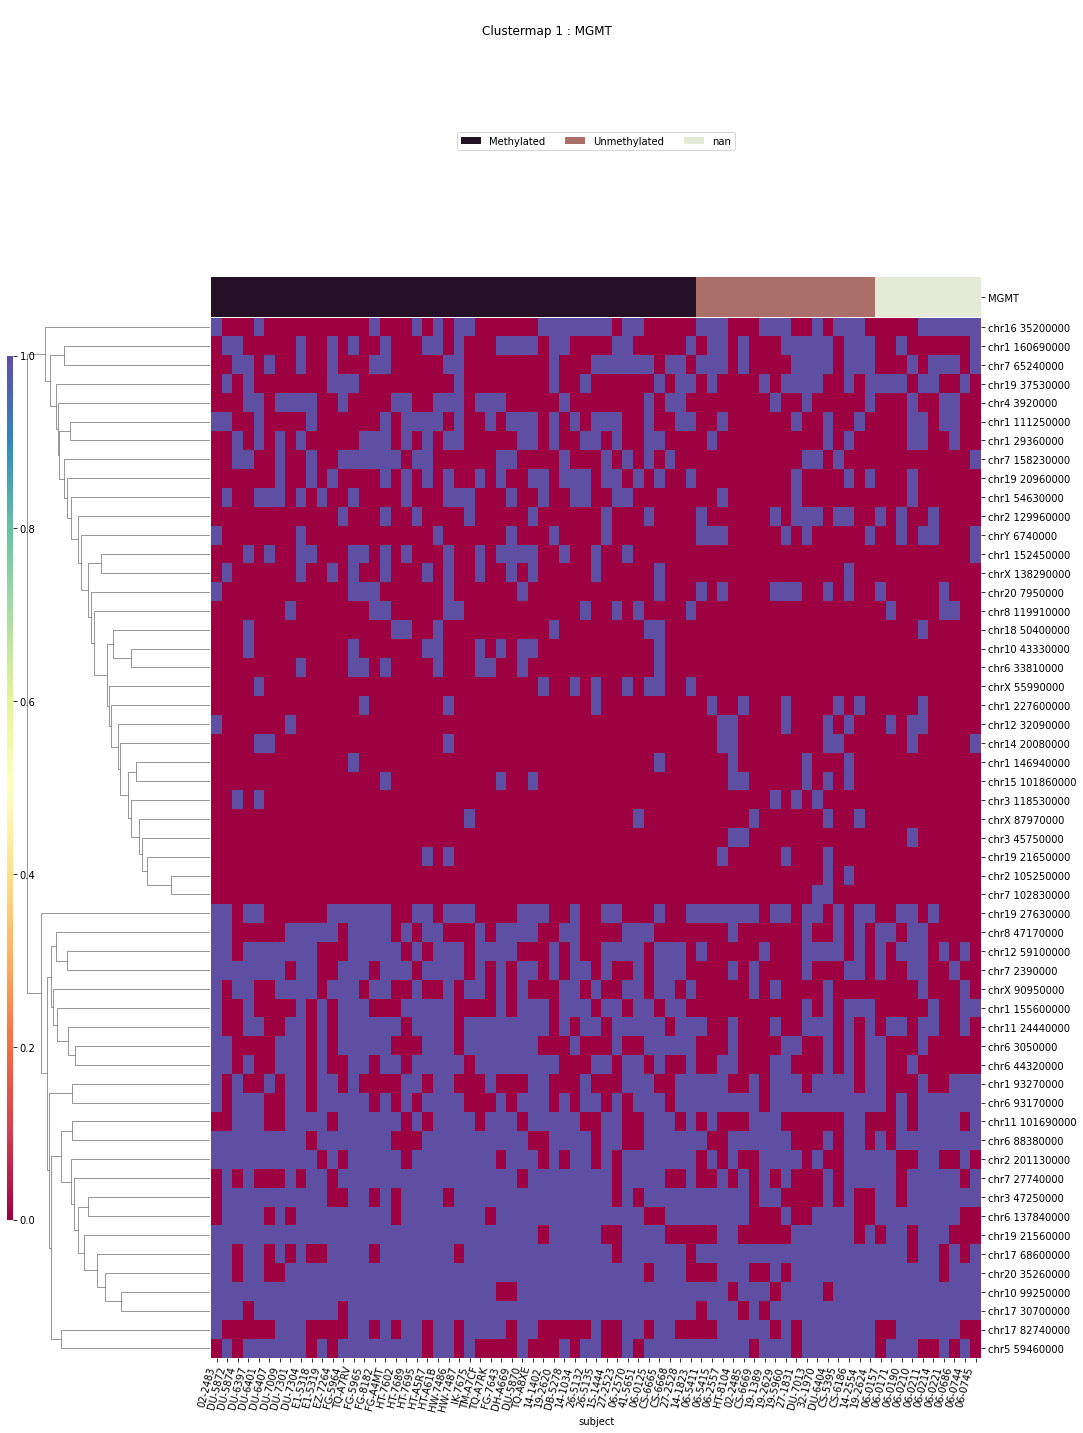

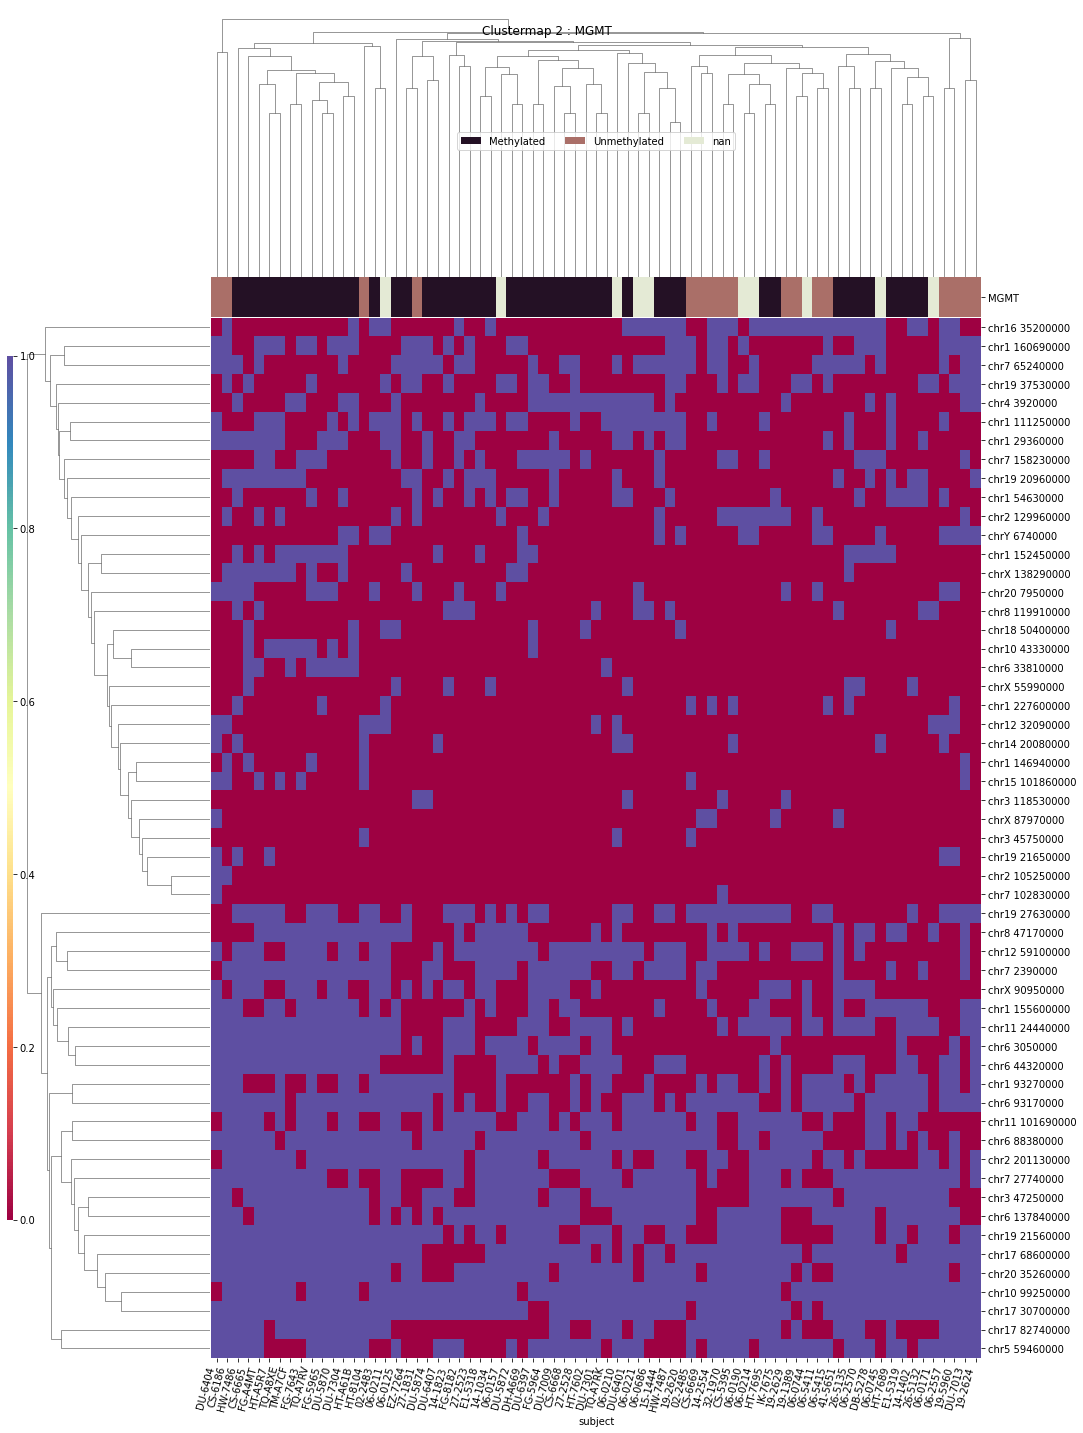

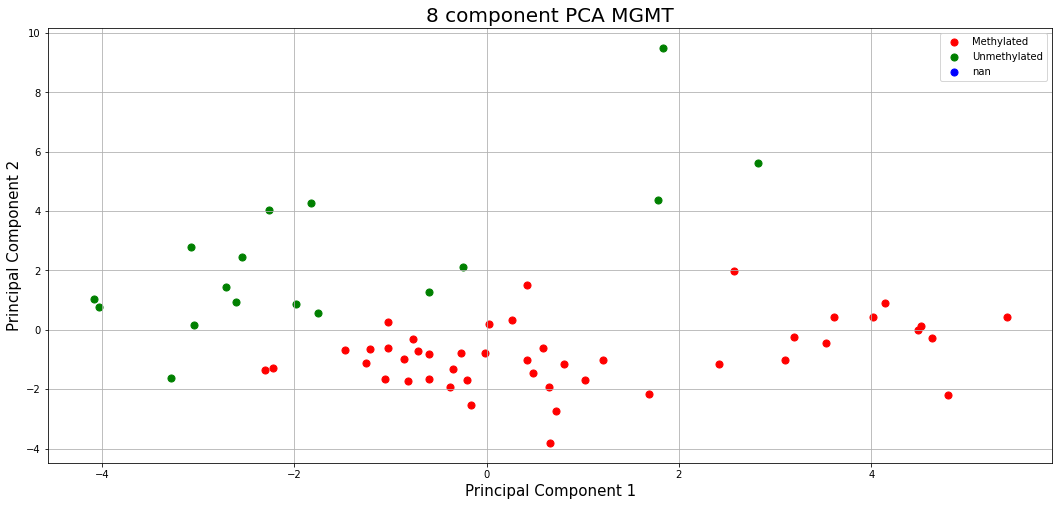

In [110]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [111]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 18:00:12'

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 10020000' 'chr1 104130000' 'chr1 108150000' 'chr1 111360000'
 'chr1 120420000' 'chr1 1410000' 'chr1 144450000' 'chr1 145410000'
 'chr1 145930000' 'chr1 146940000' 'chr1 147100000' 'chr1 147240000'
 'chr1 148130000' 'chr1 149090000' 'chr1 152450000' 'chr1 156170000'
 'chr1 156320000' 'chr1 160650000' 'chr1 166600000' 'chr1 224330000'
 'chr1 246080000' 'chr1 29350000' 'chr1 33060000' 'chr1 48170000'
 'chr1 65140000' 'chr1 73130000' 'chr1 75370000' 'chr1 76110000'
 'chr1 77980000' 'chr1 86890000' 'chr1 9000000' 'chr1 99830000'
 'chr10 107800000' 'chr10 121920000' 'chr10 130620000' 'chr10 133540000'
 'chr10 26890000' 'chr10 2800000' 'chr10 3060000' 'chr10 43330000'
 'chr10 65400000' 'chr10 90300000' 'chr10 99250000' 'chr11 18900000'
 'chr11 60710000' 'chr11 62320000' 'chr11 62380000' 'chr11 62850000'
 'chr11 67470000' 'chr11 67860000' 'chr11 71760000' 'chr12 10570000'
 'chr12 123490000' 'chr12 123580000' 'chr12 42320000' 'chr12 

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


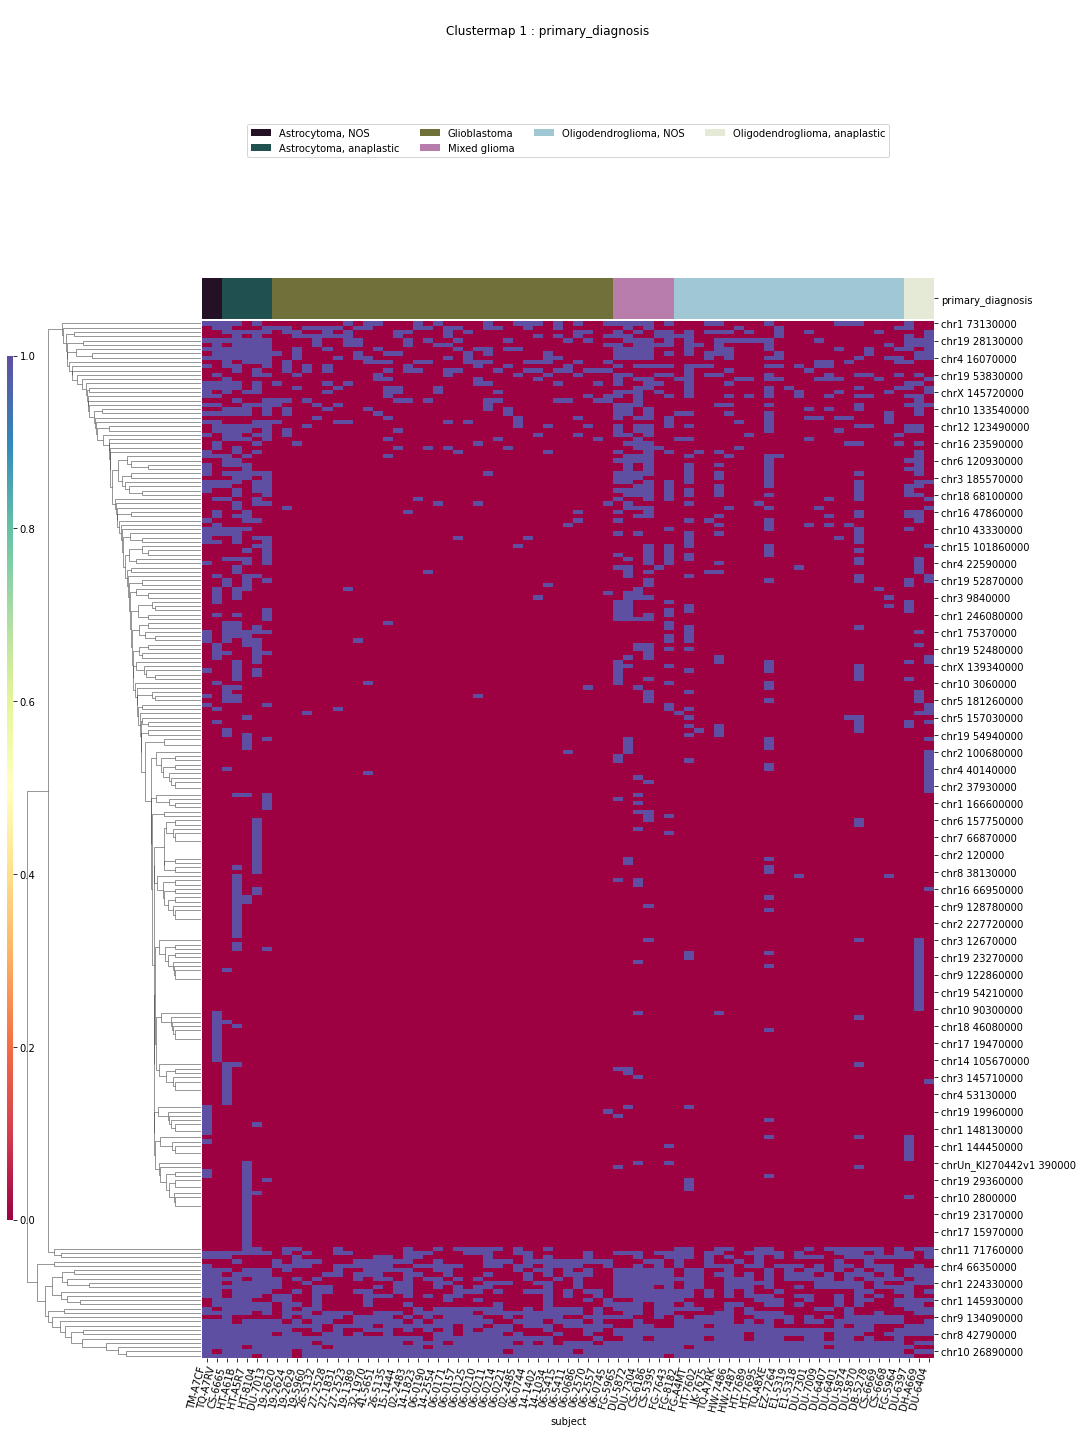

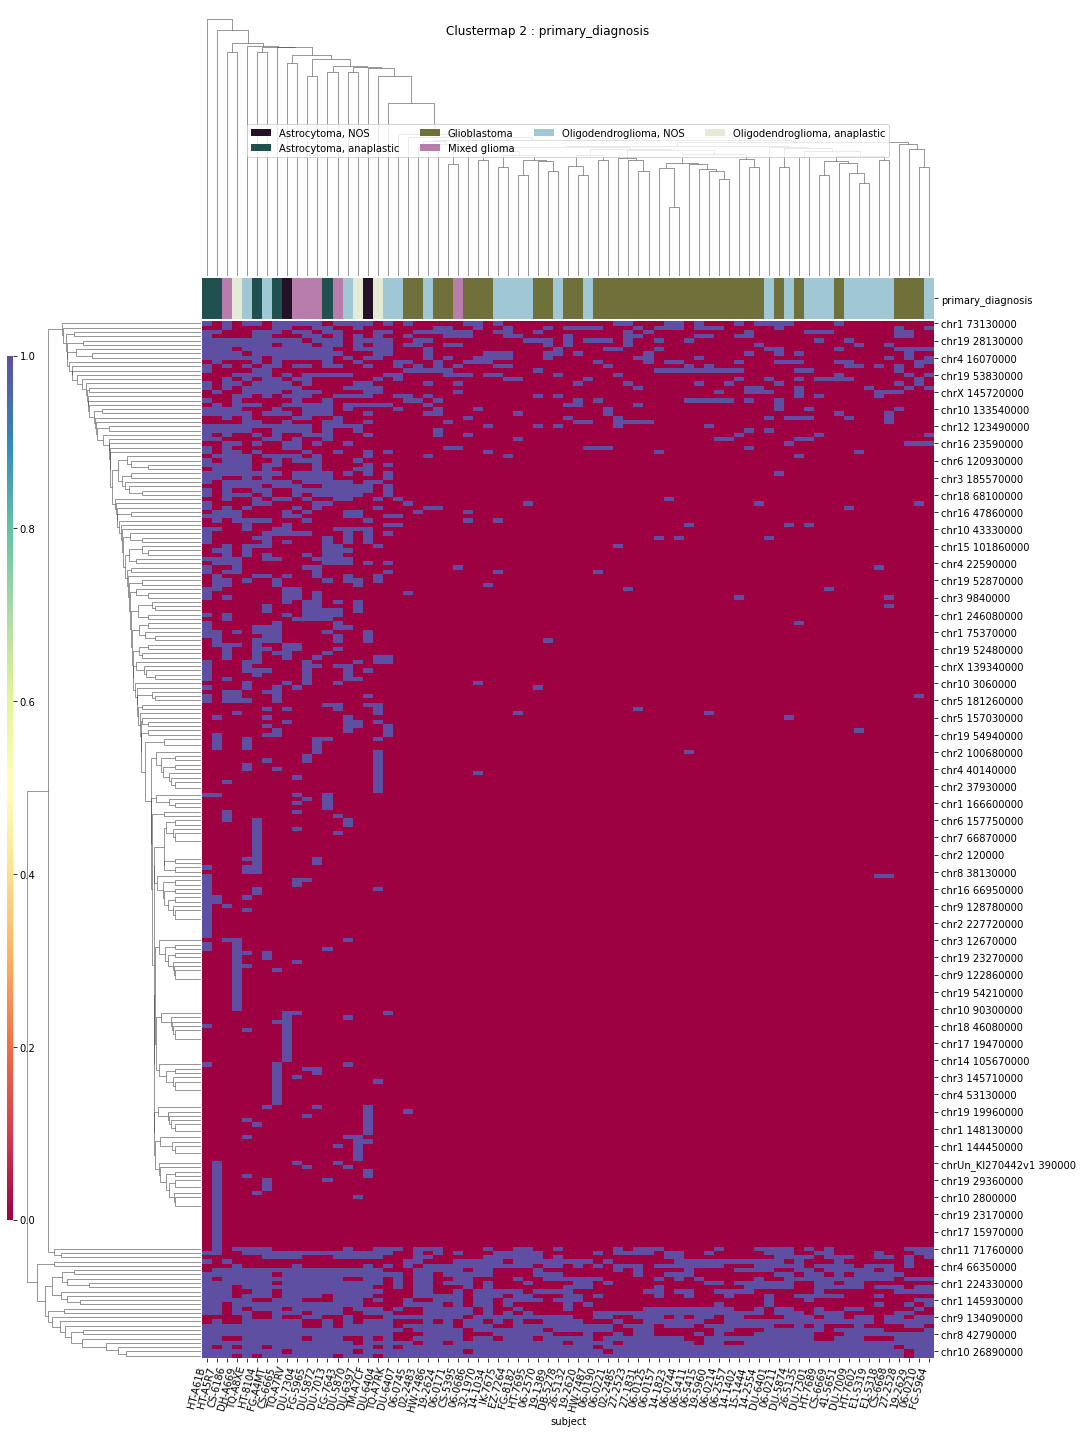

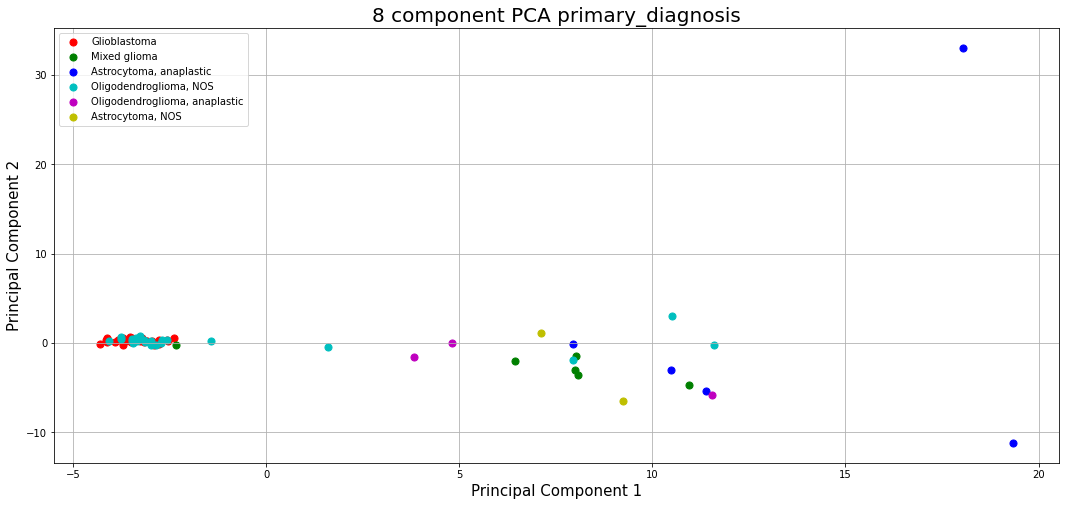

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 104130000' 'chr1 152450000' 'chr15 65730000' 'chr19 21560000'
 'chr19 37530000' 'chr3 185560000' 'chr6 33810000' 'chr6 44320000'
 'chr7 158230000' 'chr7 6900000' 'chr8 42790000' 'chrX 138290000'
 'chrX 90950000' 'subject']


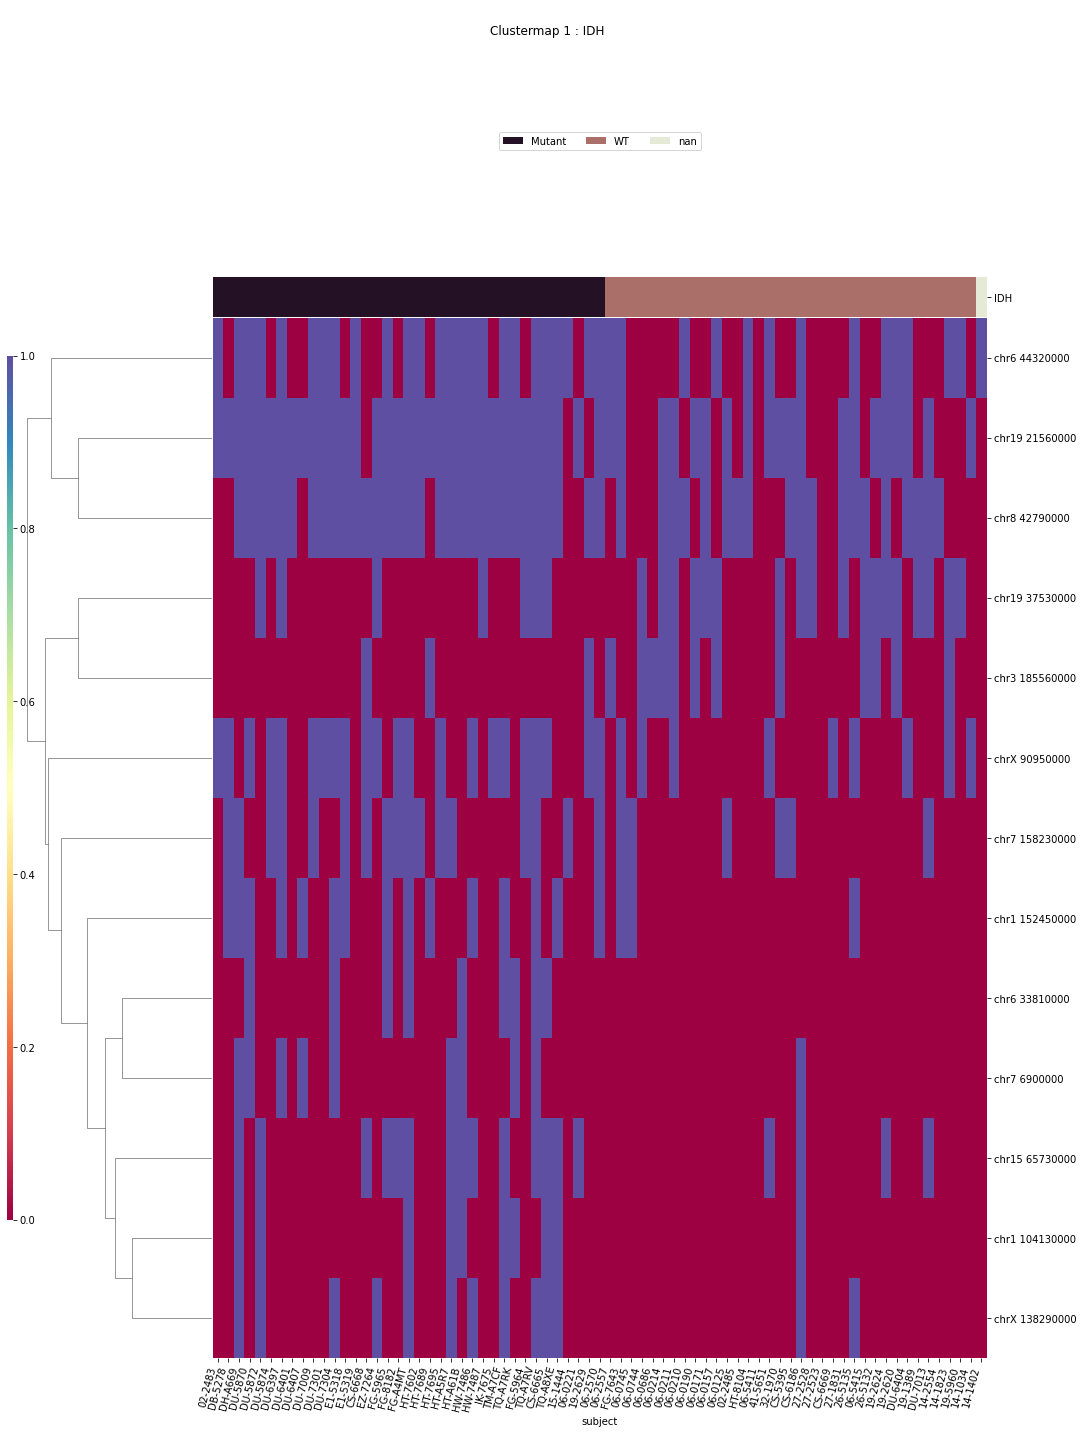

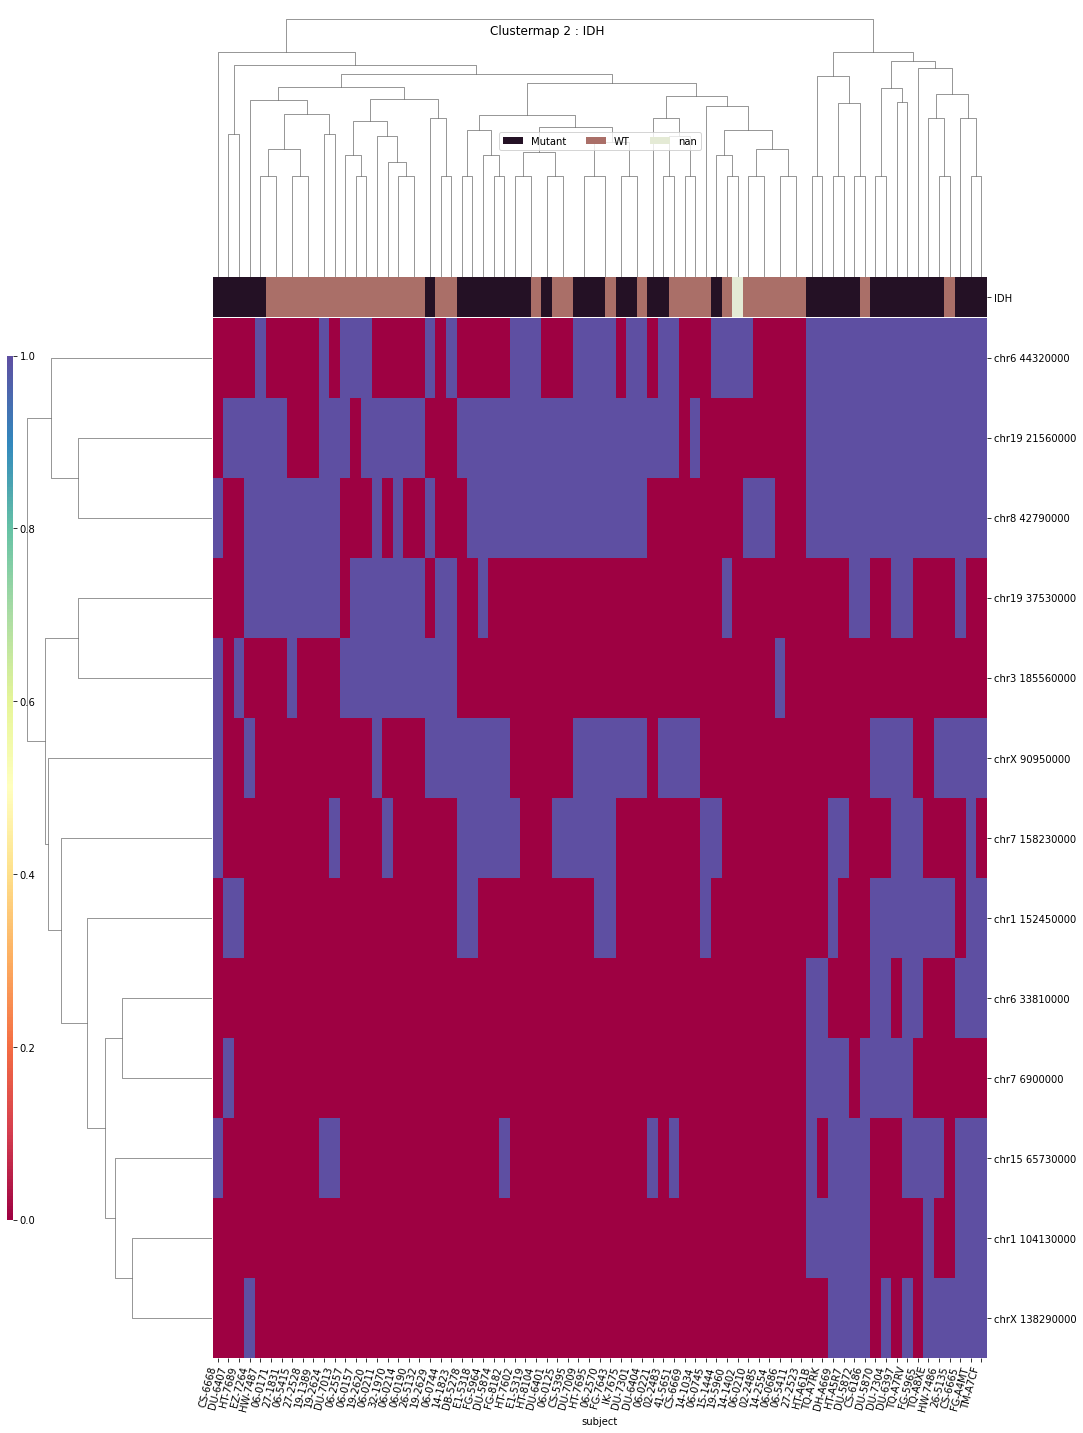

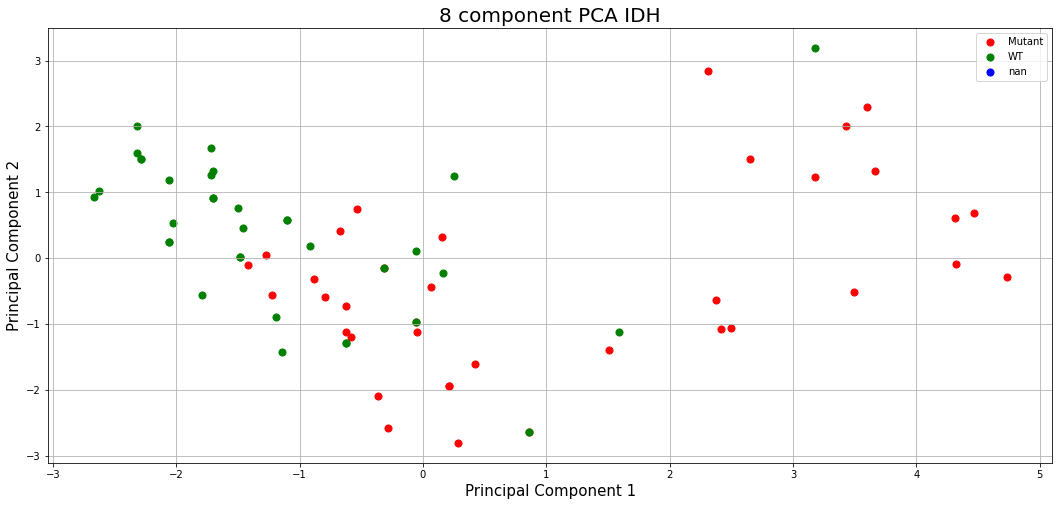

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr12 34180000' 'chr19 20280000' 'chr6 160840000' 'chr7 158230000'
 'chrX 90950000' 'subject' 'x1p19q']


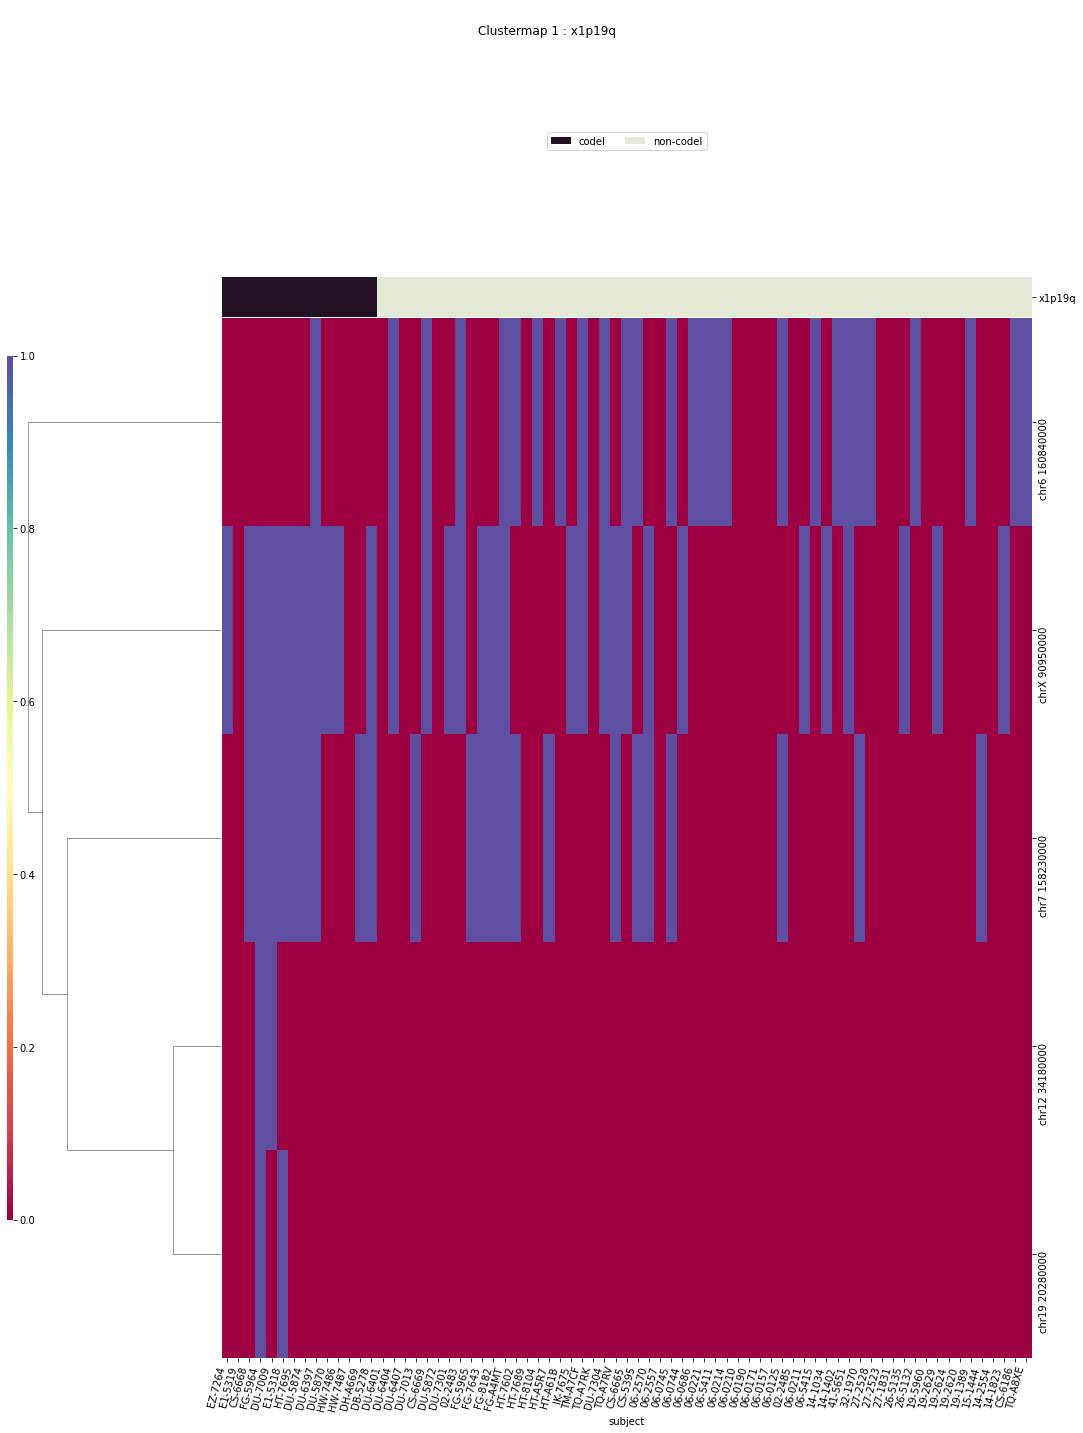

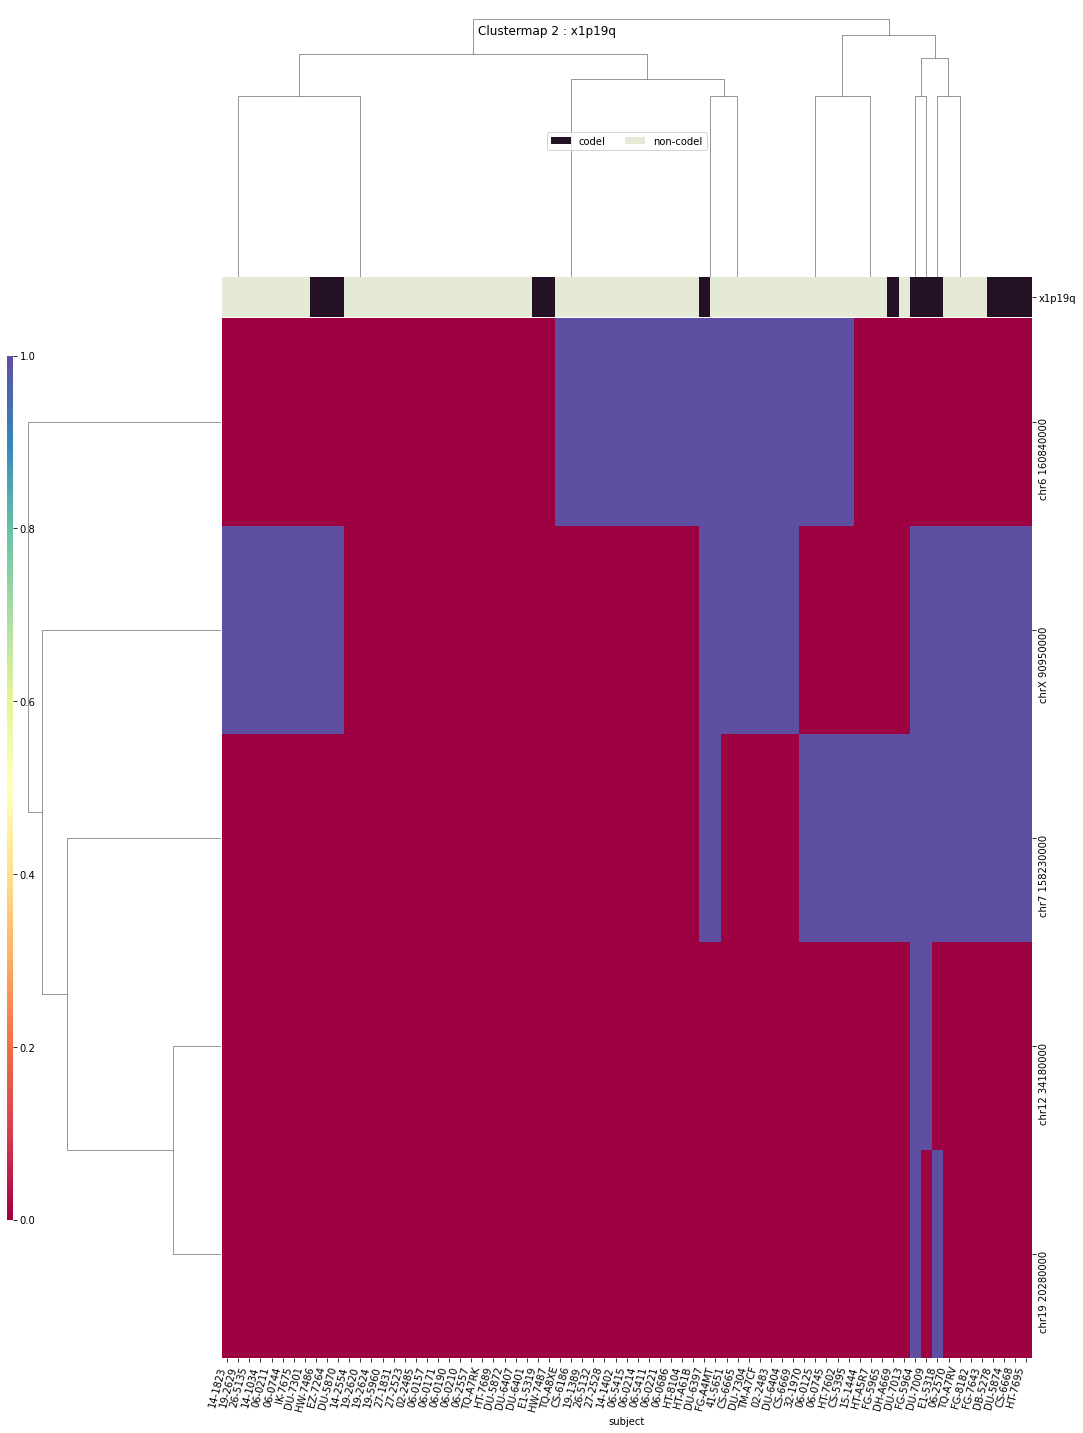

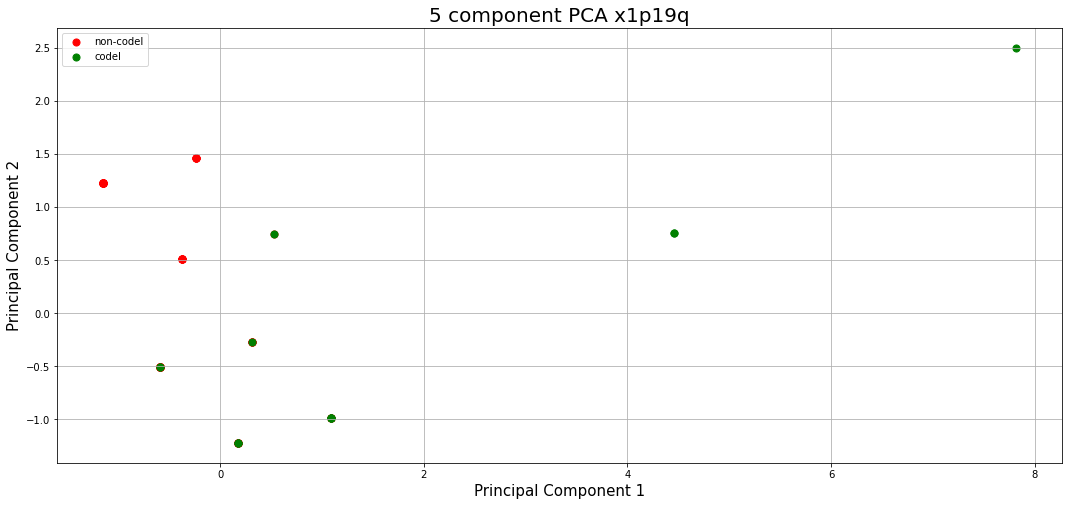

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 104130000' 'chr11 18900000' 'chr11 62360000'
 'chr13 69610000' 'chr15 65730000' 'chr19 37530000' 'chr19 52690000'
 'chr19 54940000' 'chr22 18940000' 'chr3 175900000' 'chr3 185570000'
 'chr4 66350000' 'chr6 159790000' 'chr6 33810000' 'chr7 140550000'
 'subject']


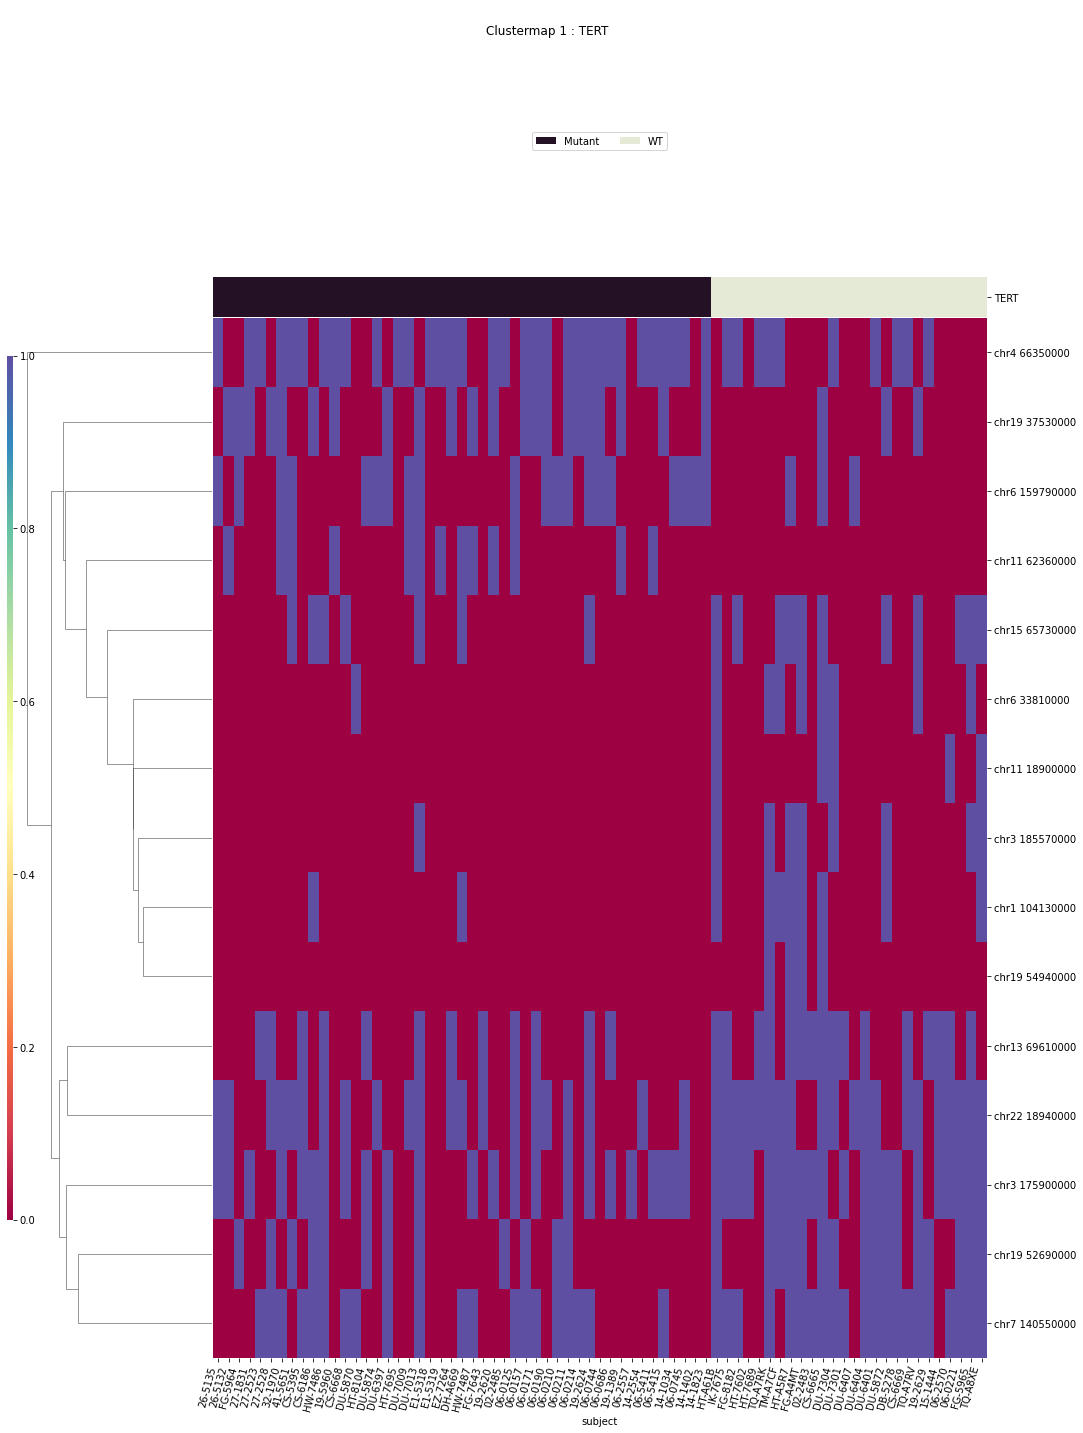

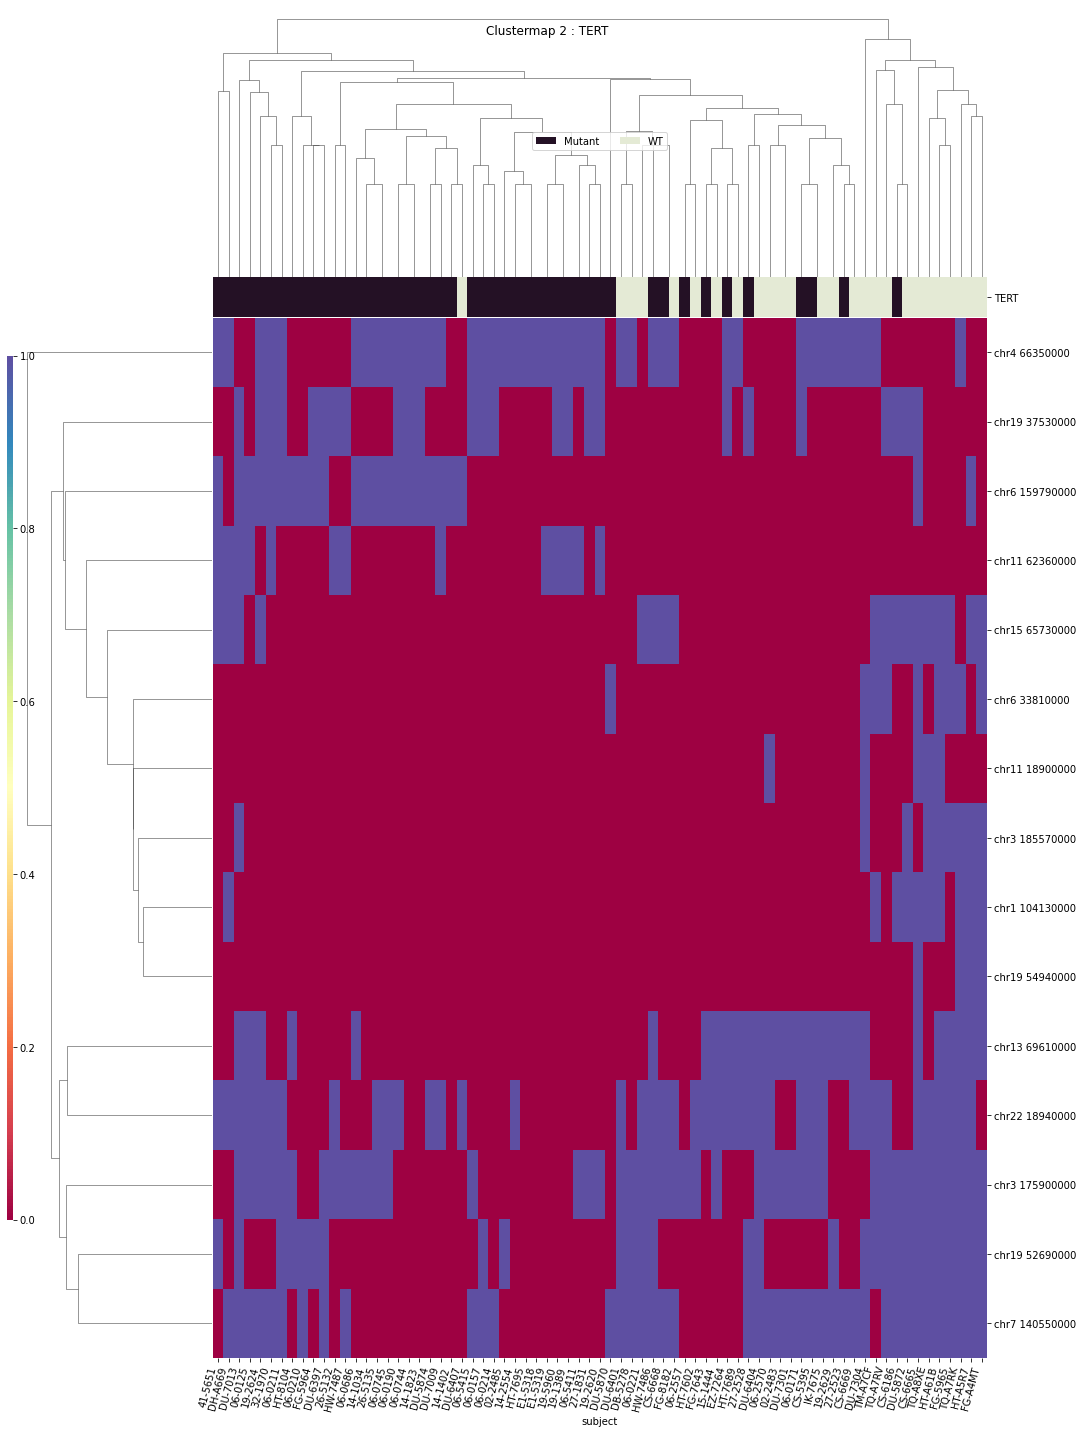

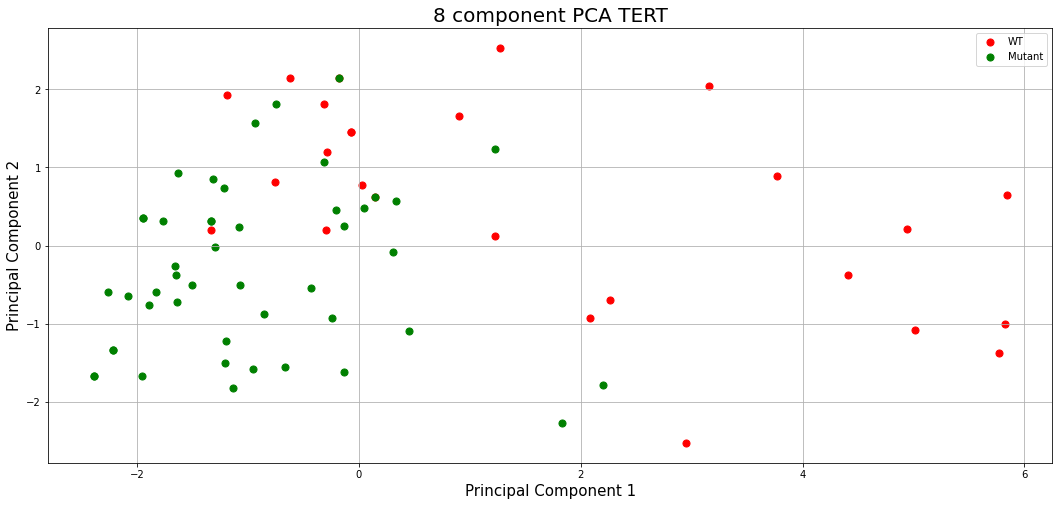

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104130000' 'chr1 152450000' 'chr1 156170000' 'chr1 209140000'
 'chr1 224330000' 'chr1 246080000' 'chr1 70460000' 'chr1 75370000'
 'chr1 9000000' 'chr10 102450000' 'chr10 43330000' 'chr10 65410000'
 'chr11 60710000' 'chr11 62850000' 'chr12 123490000' 'chr13 95260000'
 'chr14 100310000' 'chr14 77790000' 'chr15 65220000' 'chr15 65730000'
 'chr16 14630000' 'chr16 35200000' 'chr16 5750000' 'chr16 74790000'
 'chr18 68100000' 'chr18 69040000' 'chr19 20150000' 'chr19 21560000'
 'chr19 28130000' 'chr19 48880000' 'chr19 52870000' 'chr20 25240000'
 'chr21 17930000' 'chr22 23900000' 'chr3 185560000' 'chr3 185570000'
 'chr3 50510000' 'chr4 22590000' 'chr5 150450000' 'chr6 120930000'
 'chr6 151450000' 'chr6 3050000' 'chr6 33810000' 'chr7 158230000'
 'chr7 2390000' 'chr7 6900000' 'chr8 143060000' 'chr8 143280000'
 'chr8 42790000' 'chr8 43740000' 'chr8 58670000' 'chrX 135300000'
 'chrX 135400000' 'chrX 138290000' 'chrX 154900000' 'chrX 90950000'

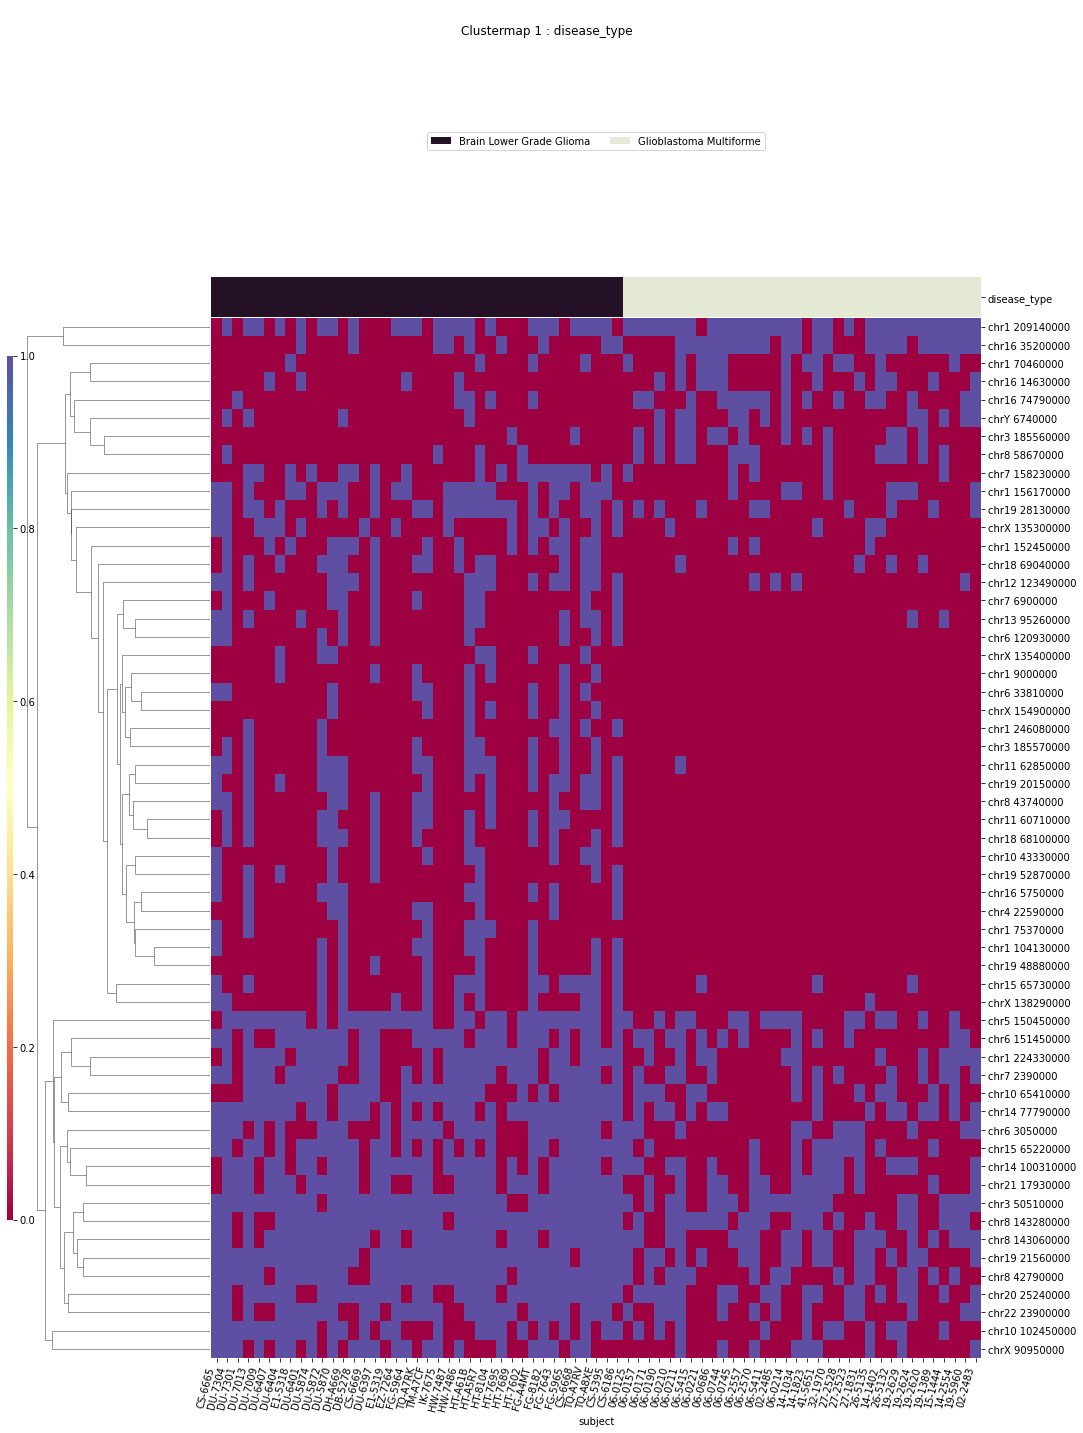

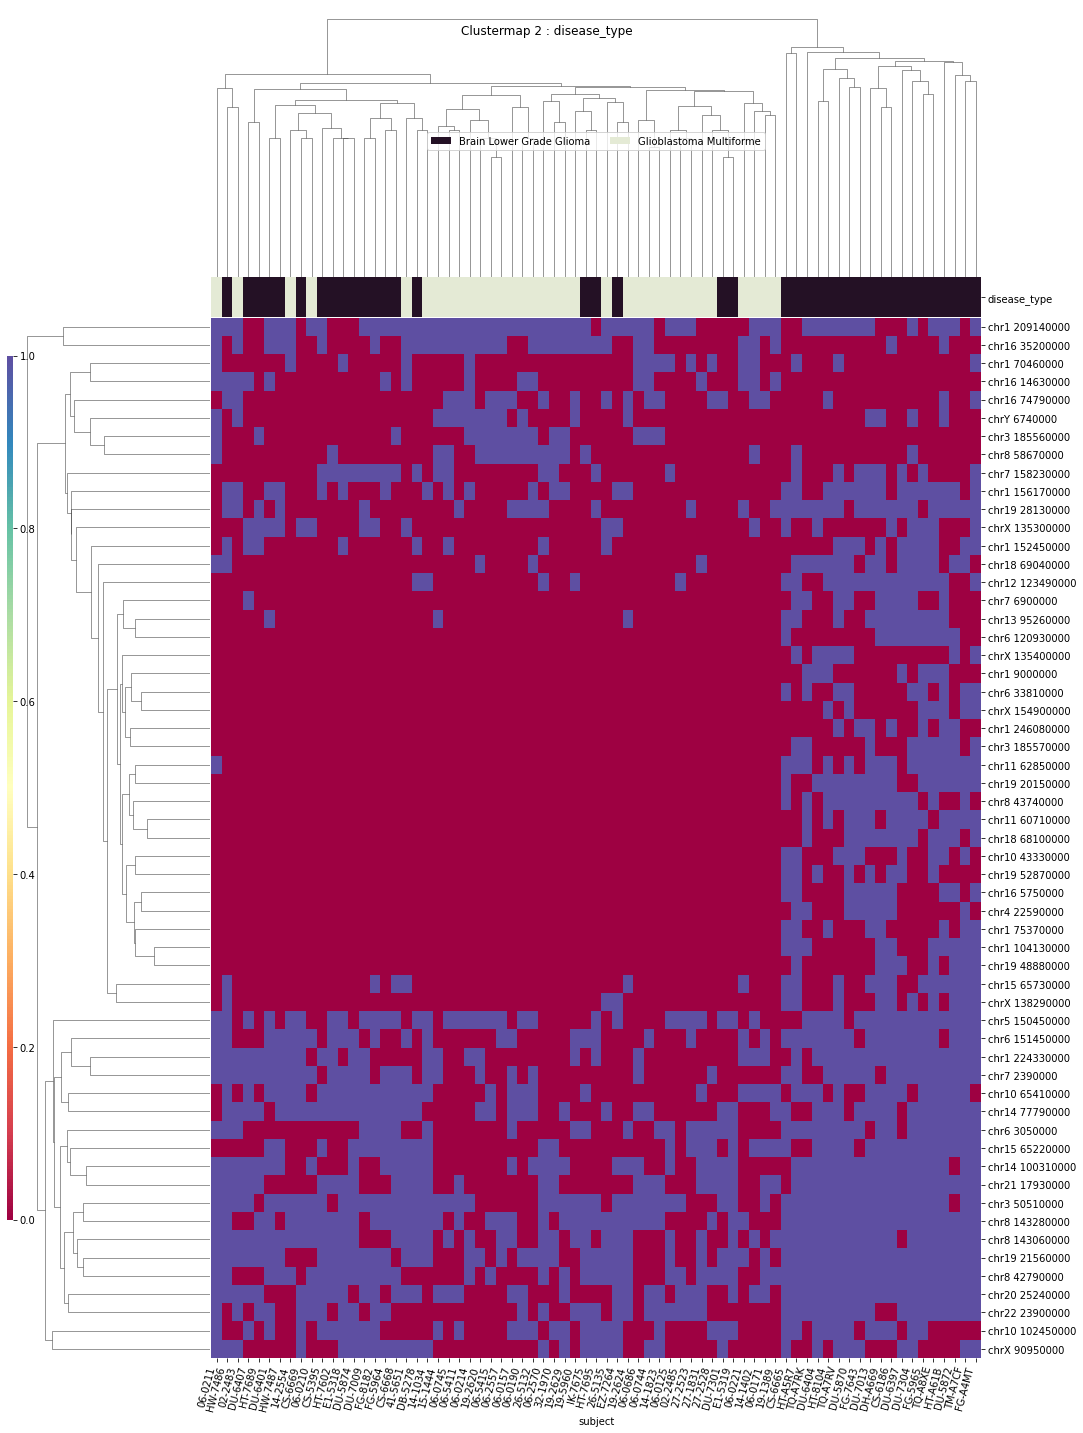

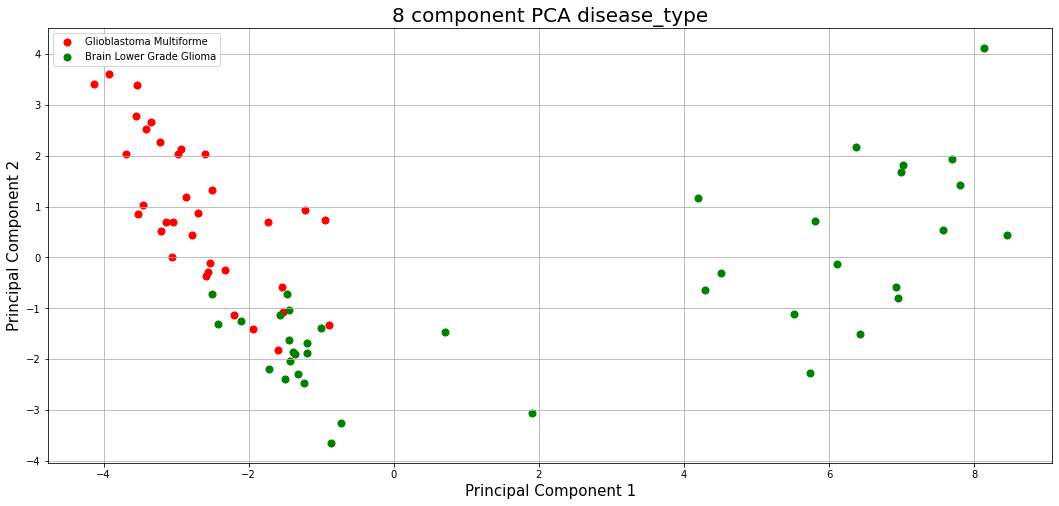

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 104130000' 'chr1 152450000' 'chr10 43330000'
 'chr11 18900000' 'chr11 62360000' 'chr11 62850000' 'chr13 69610000'
 'chr13 95260000' 'chr15 65730000' 'chr16 75810000' 'chr17 19500000'
 'chr19 21560000' 'chr19 37530000' 'chr19 54940000' 'chr2 201130000'
 'chr2 228360000' 'chr3 175900000' 'chr3 185570000' 'chr4 66350000'
 'chr6 120930000' 'chr6 160840000' 'chr6 33810000' 'chr6 44320000'
 'chr7 158230000' 'chr7 6900000' 'chr8 42790000' 'chrX 138290000'
 'chrX 90950000' 'subject']


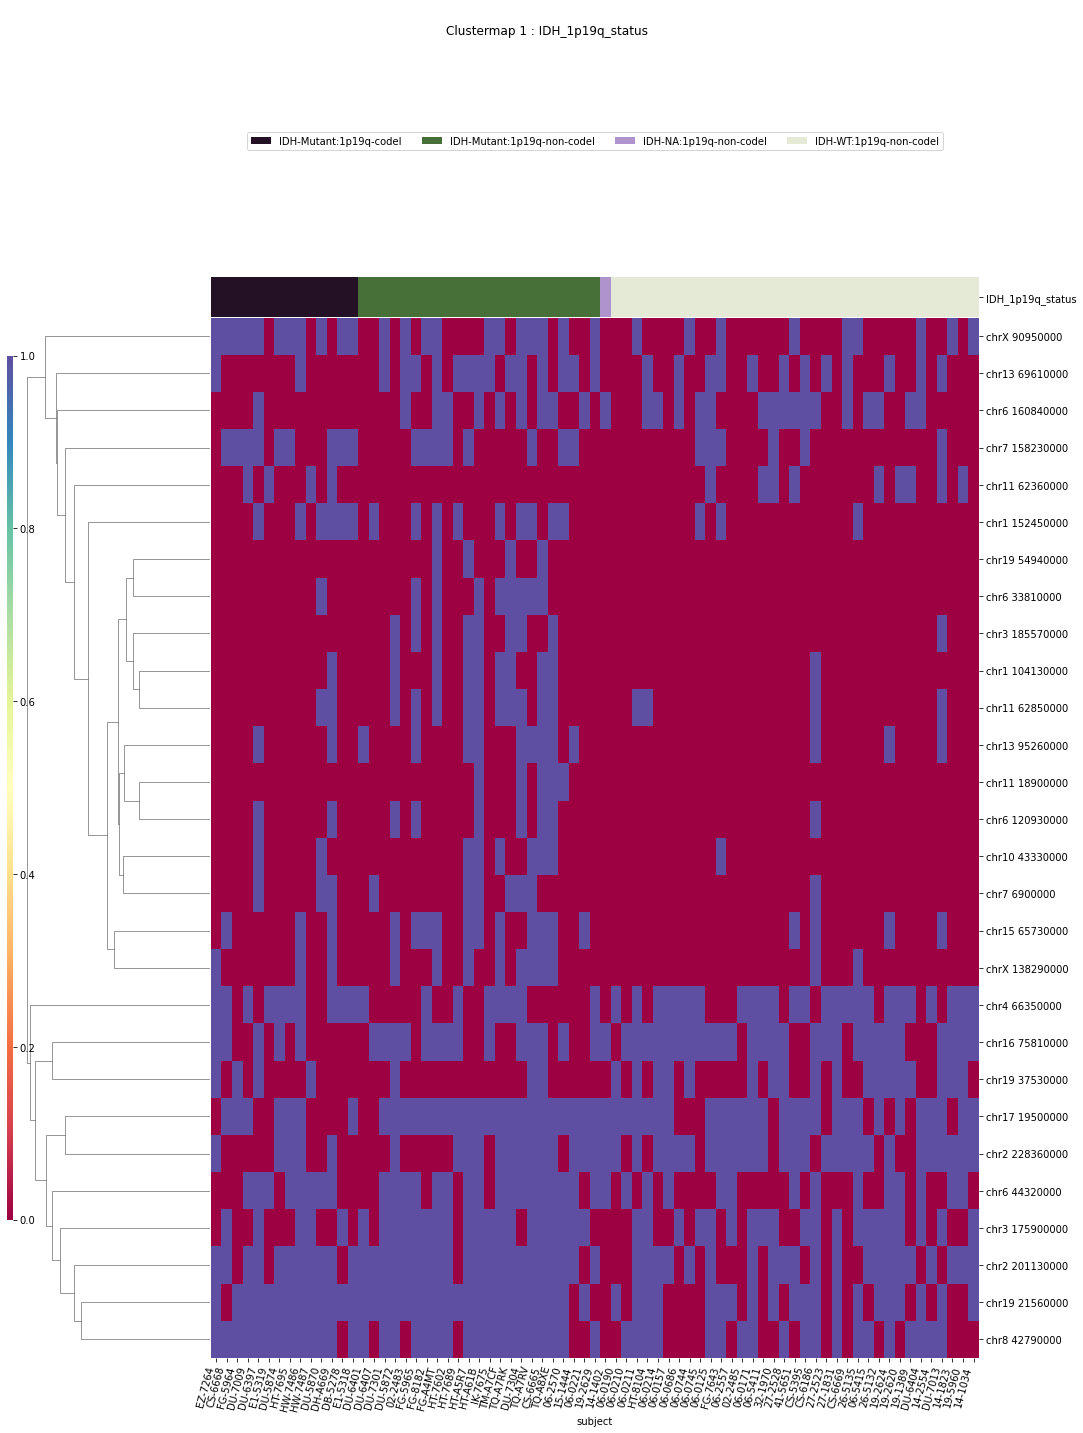

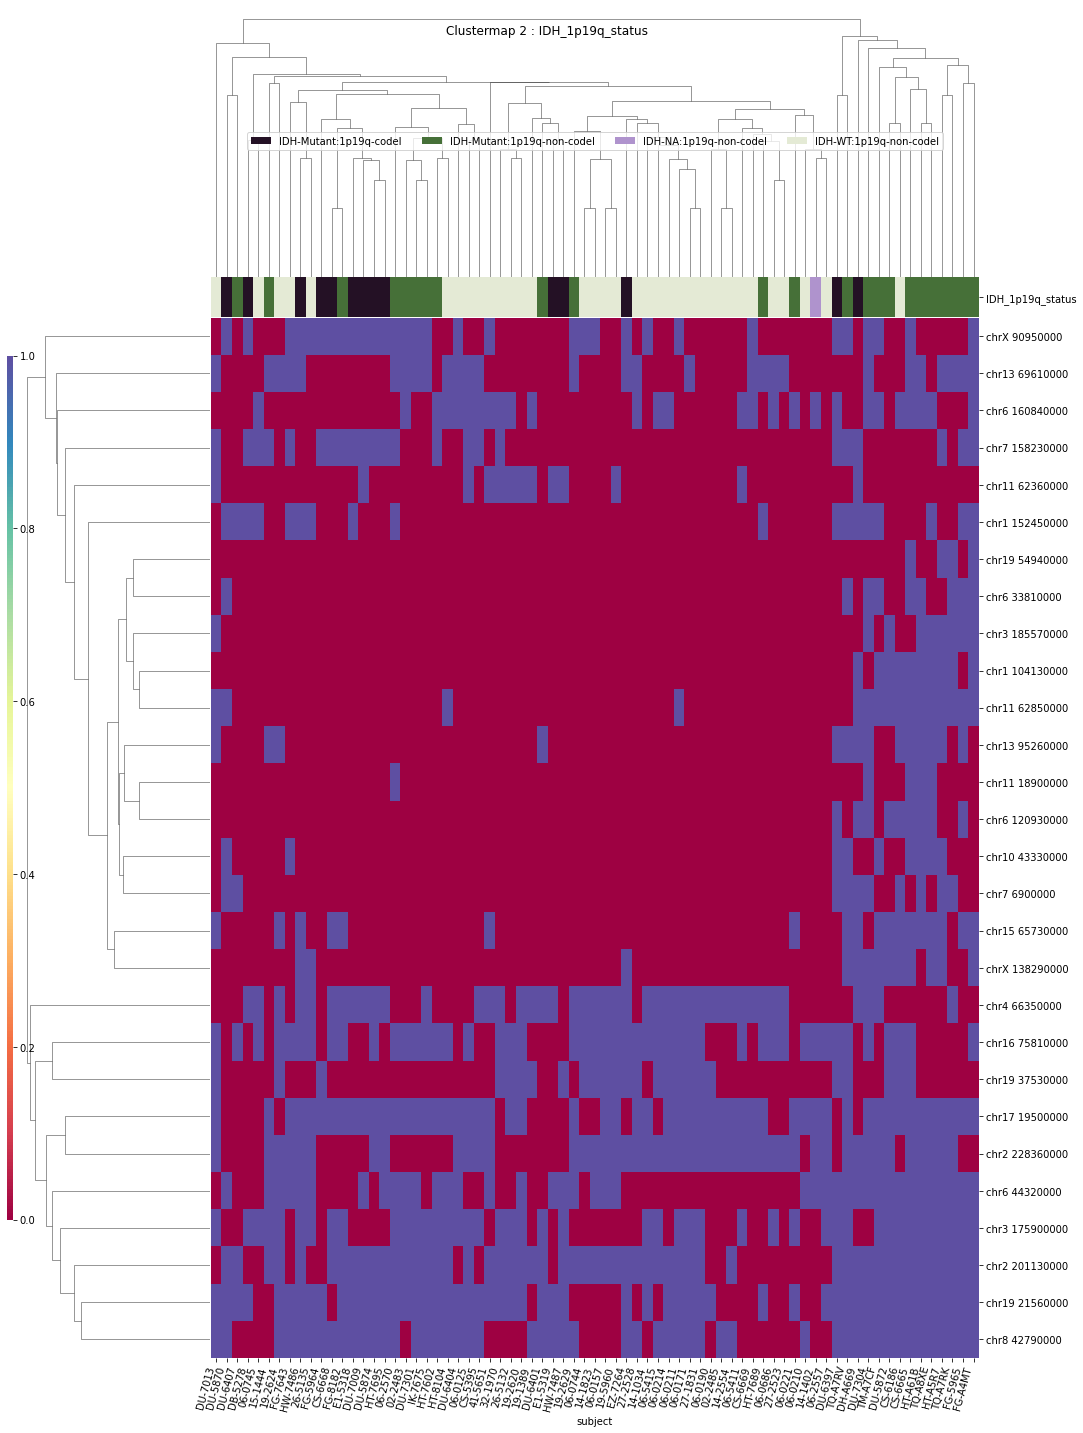

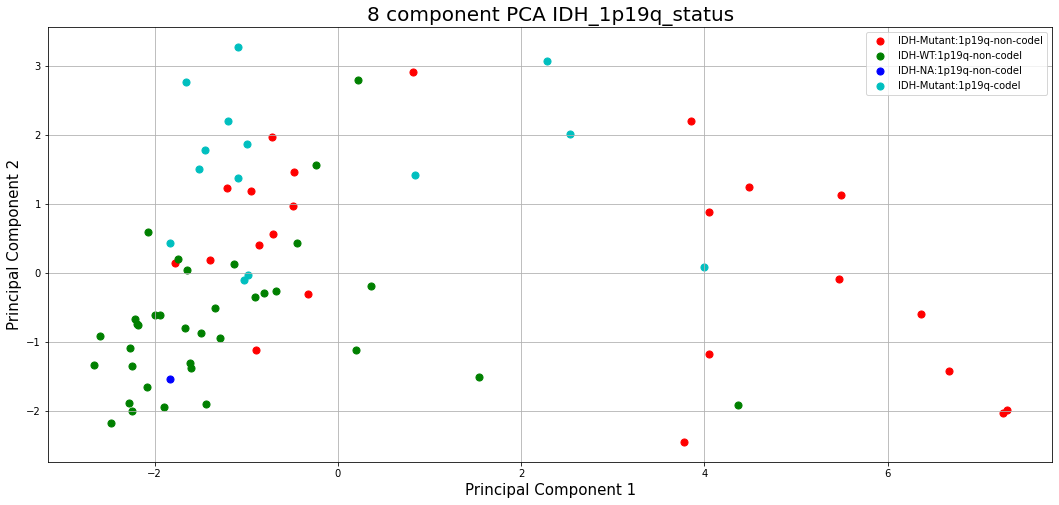

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104130000' 'chr1 111520000' 'chr1 120420000'
 'chr1 1410000' 'chr1 144450000' 'chr1 145410000' 'chr1 146940000'
 'chr1 147100000' 'chr1 148130000' 'chr1 149090000' 'chr1 15130000'
 'chr1 152450000' 'chr1 155620000' 'chr1 156170000' 'chr1 156320000'
 'chr1 160650000' 'chr1 166600000' 'chr1 198120000' 'chr1 209140000'
 'chr1 246080000' 'chr1 29350000' 'chr1 33060000' 'chr1 45510000'
 'chr1 46320000' 'chr1 46390000' 'chr1 48170000' 'chr1 65140000'
 'chr1 73130000' 'chr1 75370000' 'chr1 76110000' 'chr1 89060000'
 'chr1 9000000' 'chr1 99830000' 'chr10 130620000' 'chr10 26890000'
 'chr10 2800000' 'chr10 3060000' 'chr10 43330000' 'chr10 65400000'
 'chr10 99250000' 'chr11 118720000' 'chr11 18900000' 'chr11 60710000'
 'chr11 62320000' 'chr11 62380000' 'chr11 62850000' 'chr11 63530000'
 'chr11 67470000' 'chr11 67860000' 'chr12 10570000' 'chr12 123490000'
 'chr12 123580000' 'chr12 32090000' 'chr12 4720000' 'chr12 53120000'
 'chr1

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


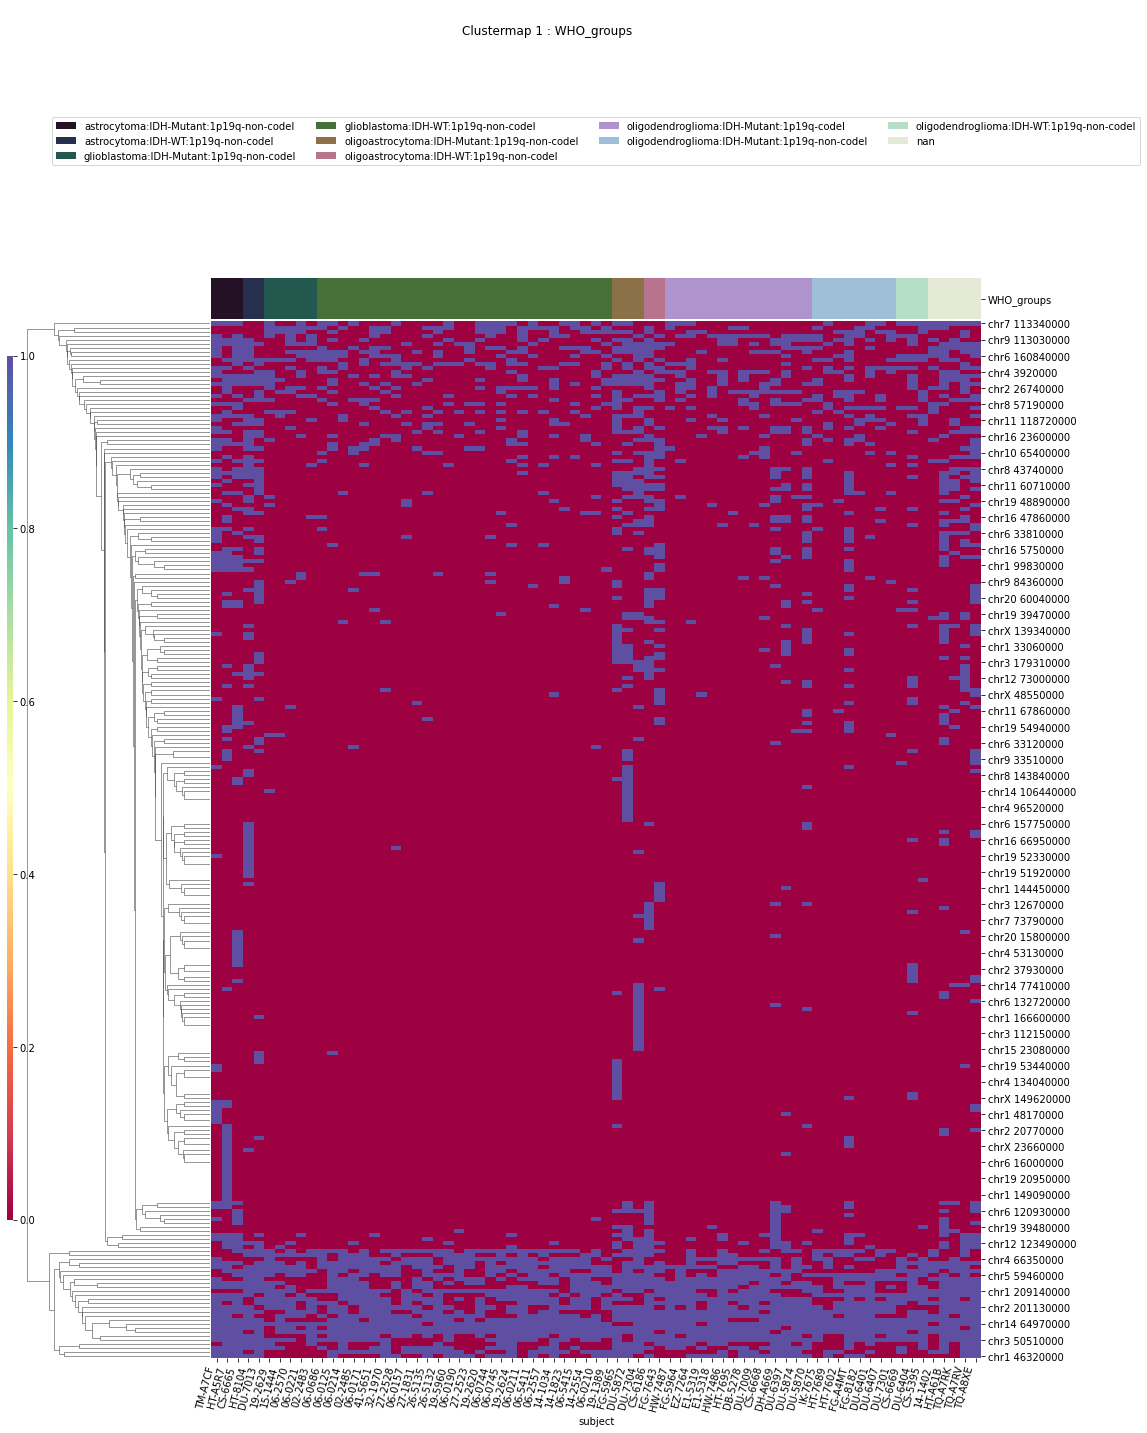

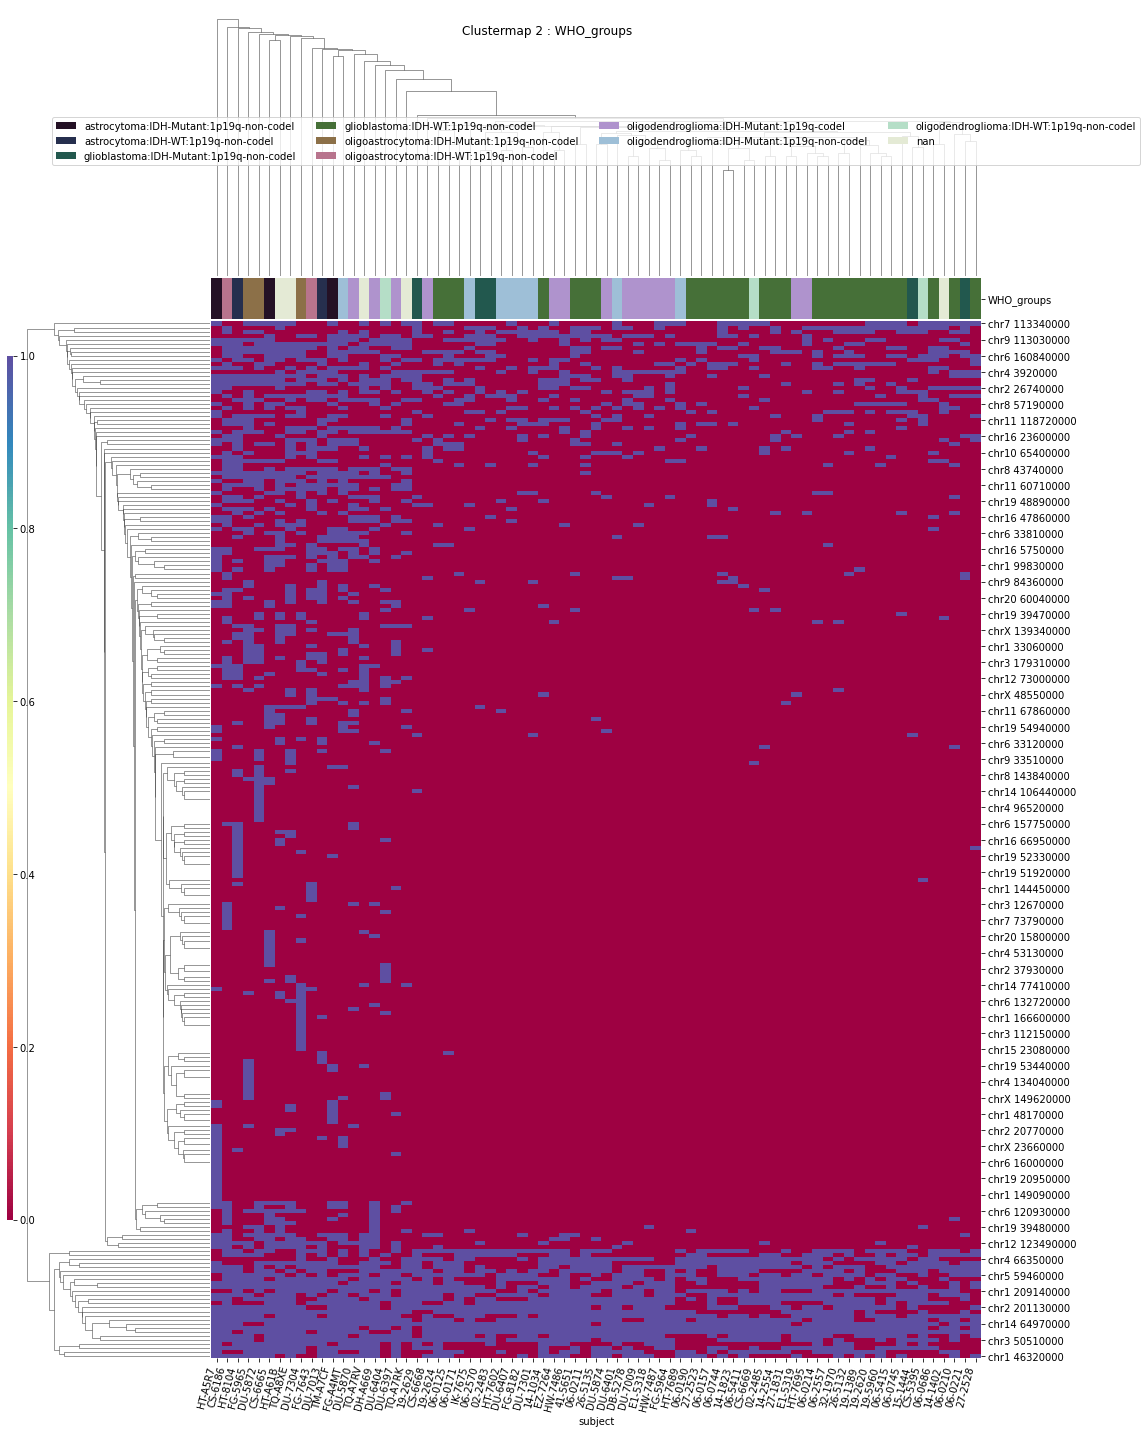

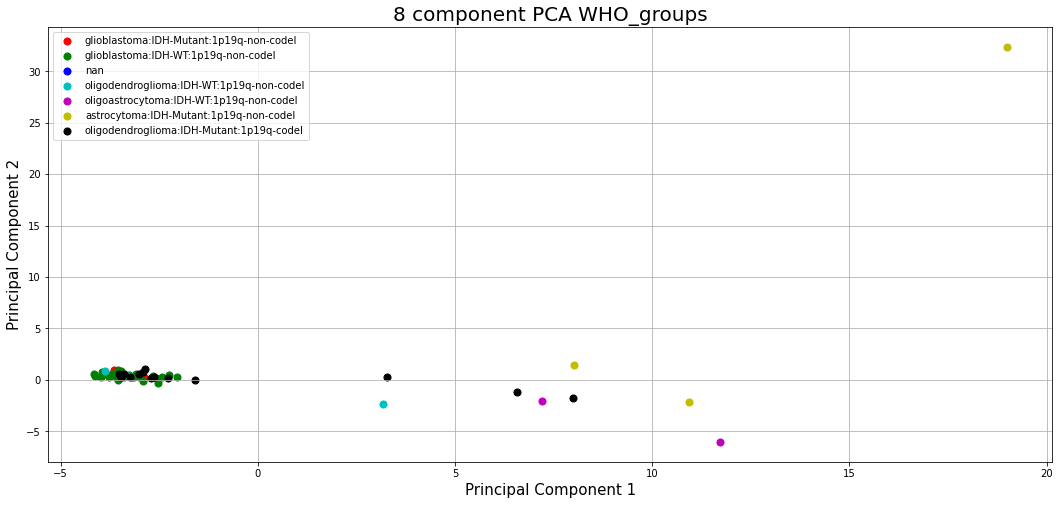

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 104130000' 'chr1 152450000' 'chr1 46390000'
 'chr1 9000000' 'chr10 43330000' 'chr11 18900000' 'chr11 62360000'
 'chr11 62850000' 'chr12 10570000' 'chr12 123580000' 'chr12 32090000'
 'chr12 6190000' 'chr12 73000000' 'chr13 69610000' 'chr13 95260000'
 'chr15 101860000' 'chr15 65730000' 'chr16 21220000' 'chr16 35200000'
 'chr16 66950000' 'chr16 75810000' 'chr17 19500000' 'chr19 12230000'
 'chr19 21560000' 'chr19 37530000' 'chr19 37620000' 'chr2 100680000'
 'chr2 105250000' 'chr2 201130000' 'chr2 207030000' 'chr2 208250000'
 'chr2 37930000' 'chr20 18490000' 'chr22 11320000' 'chr22 23530000'
 'chr3 130050000' 'chr3 175900000' 'chr3 185570000' 'chr3 23540000'
 'chr4 159970000' 'chr4 40140000' 'chr4 66350000' 'chr5 122910000'
 'chr6 120930000' 'chr6 137840000' 'chr6 160840000' 'chr6 33810000'
 'chr6 44320000' 'chr7 102830000' 'chr7 126160000' 'chr7 140550000'
 'chr7 158230000' 'chr7 6900000' 'chr8 42790000' 'chrX 135300000'
 'chrX 135400000' 'c

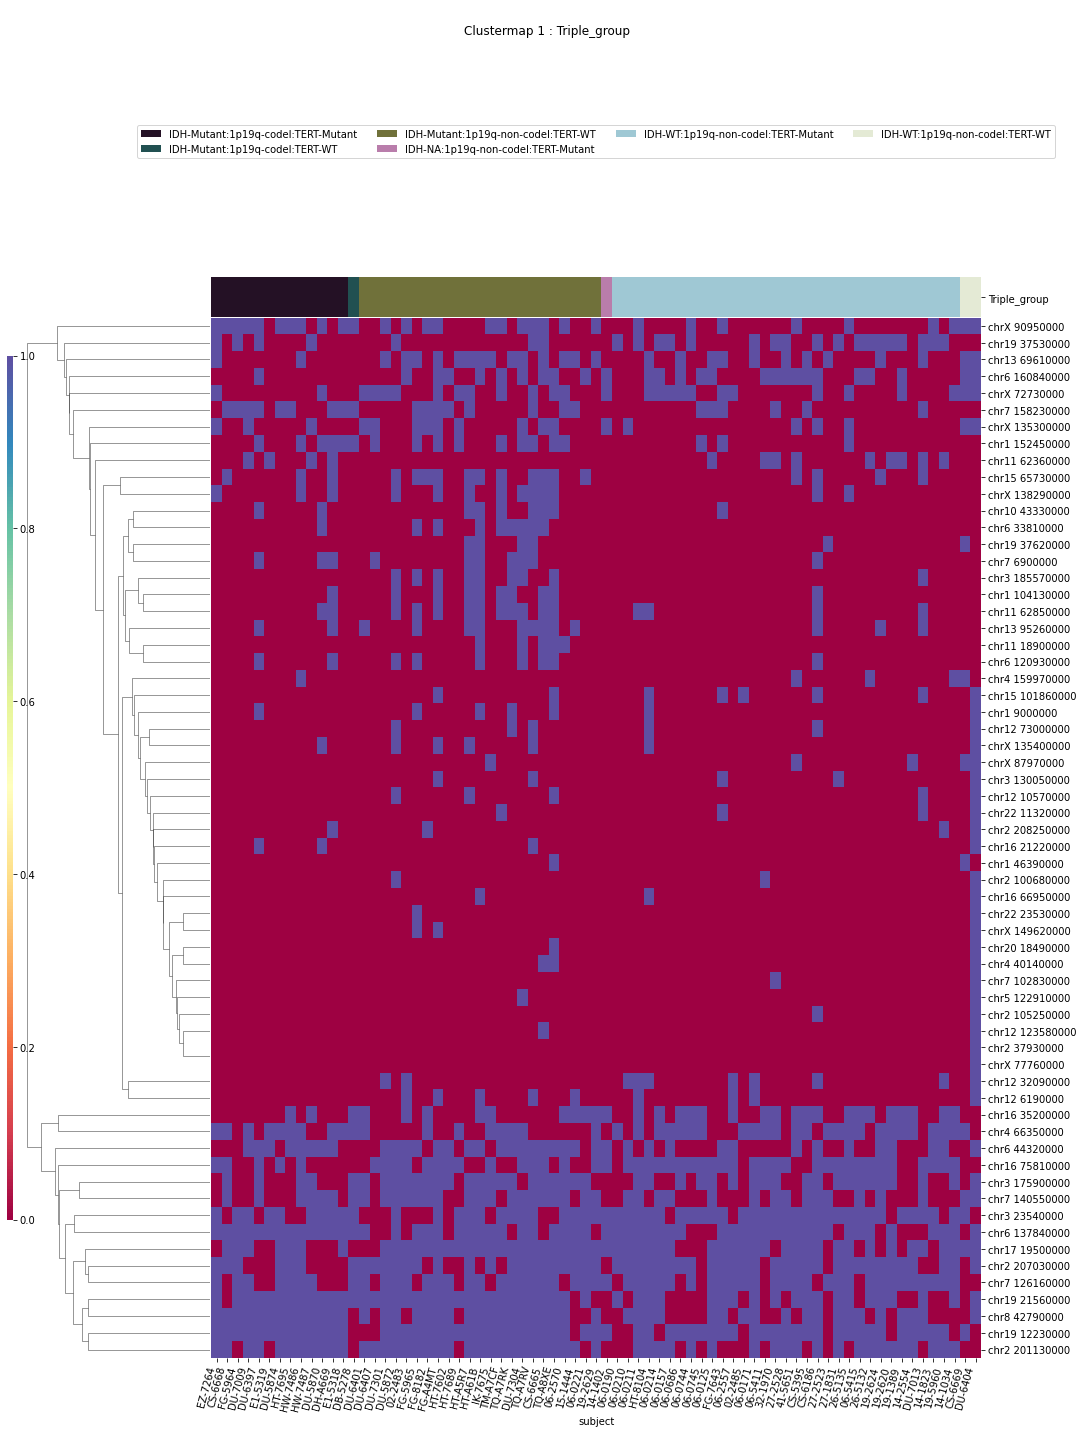

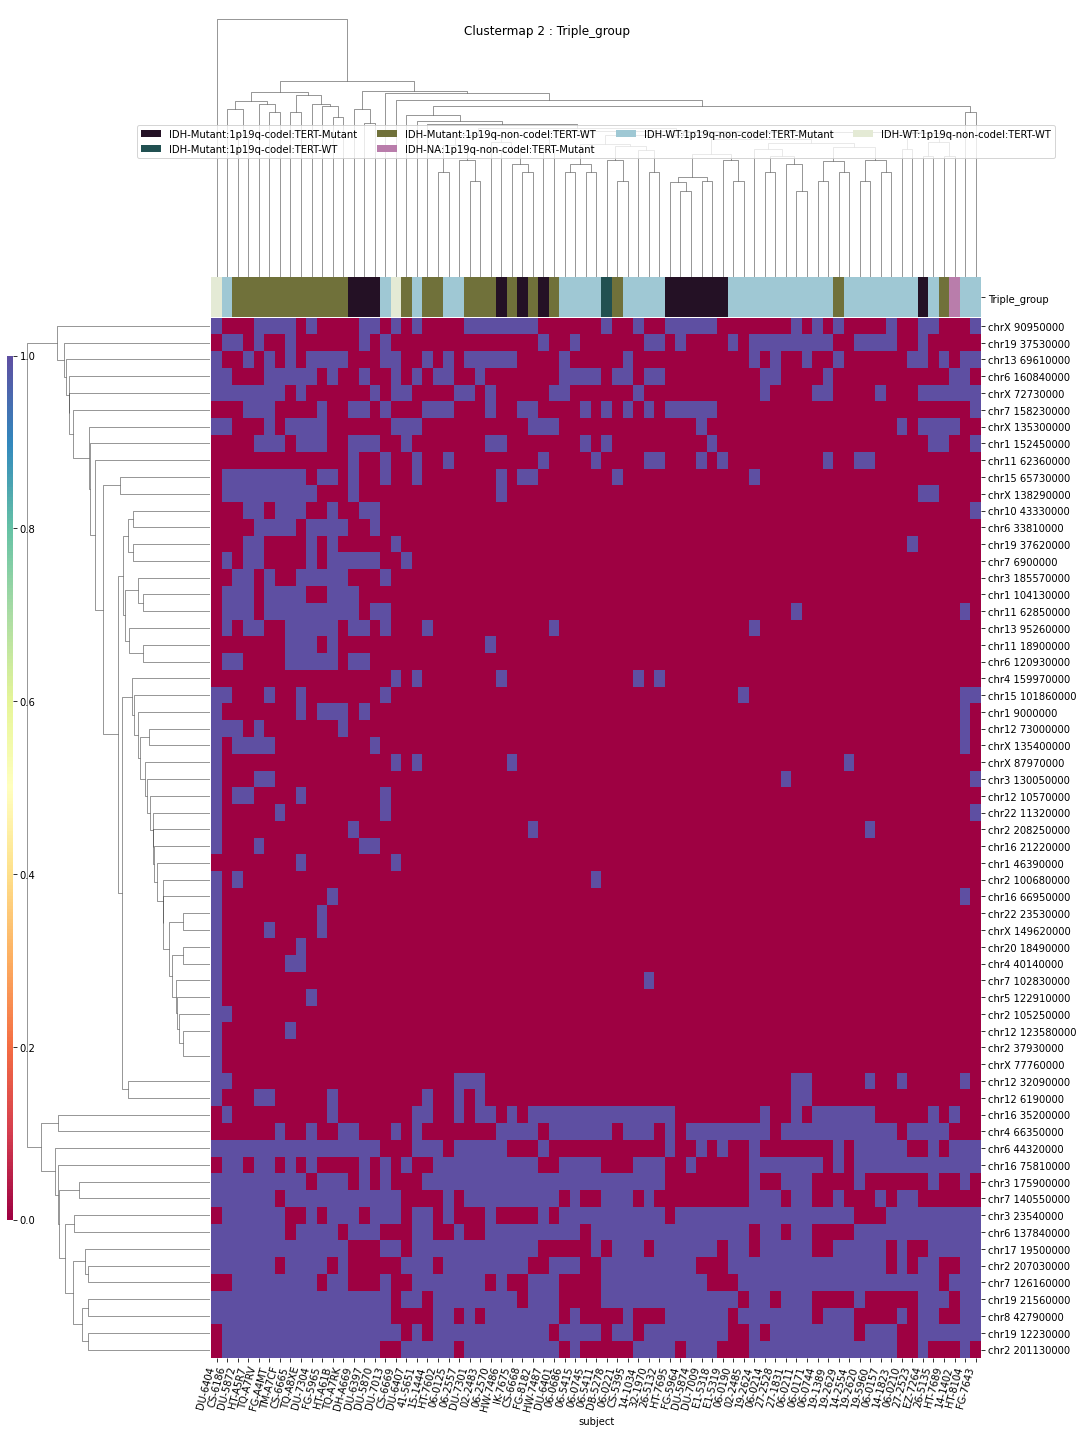

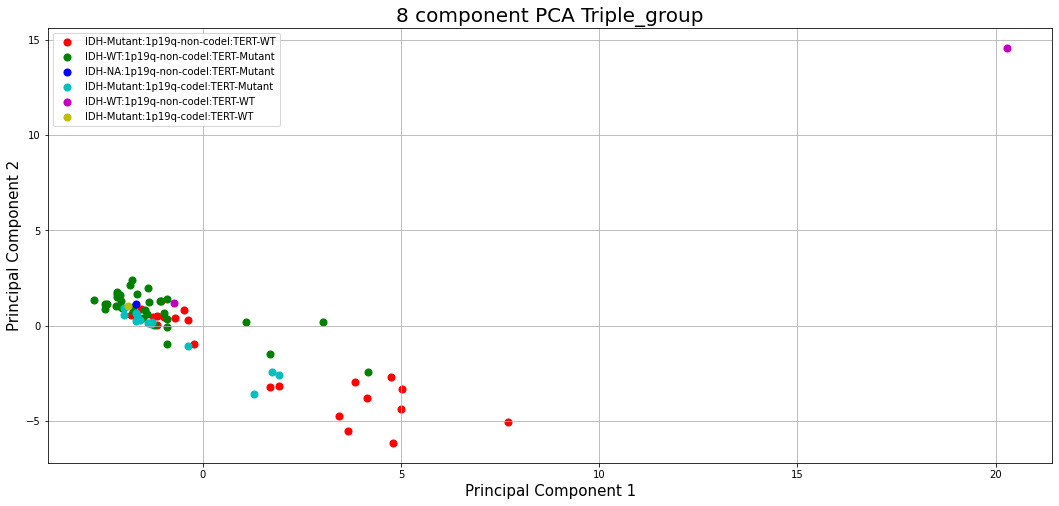

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 152450000' 'chr12 32090000' 'chr19 21560000' 'chr7 2390000'
 'chrX 90950000' 'subject']


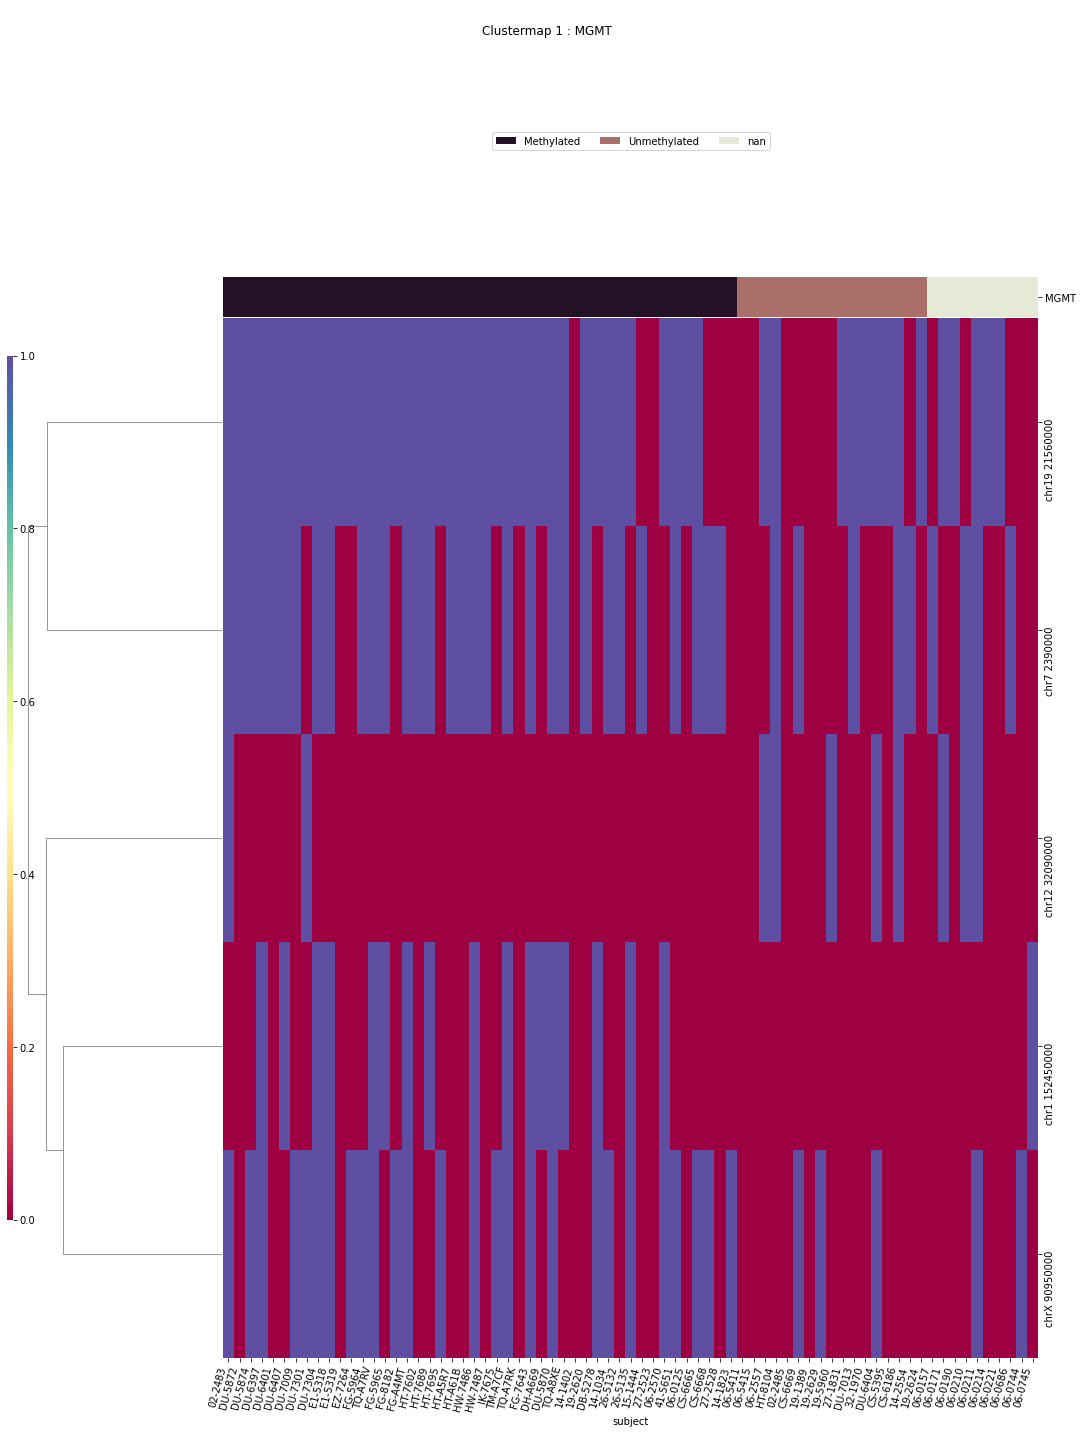

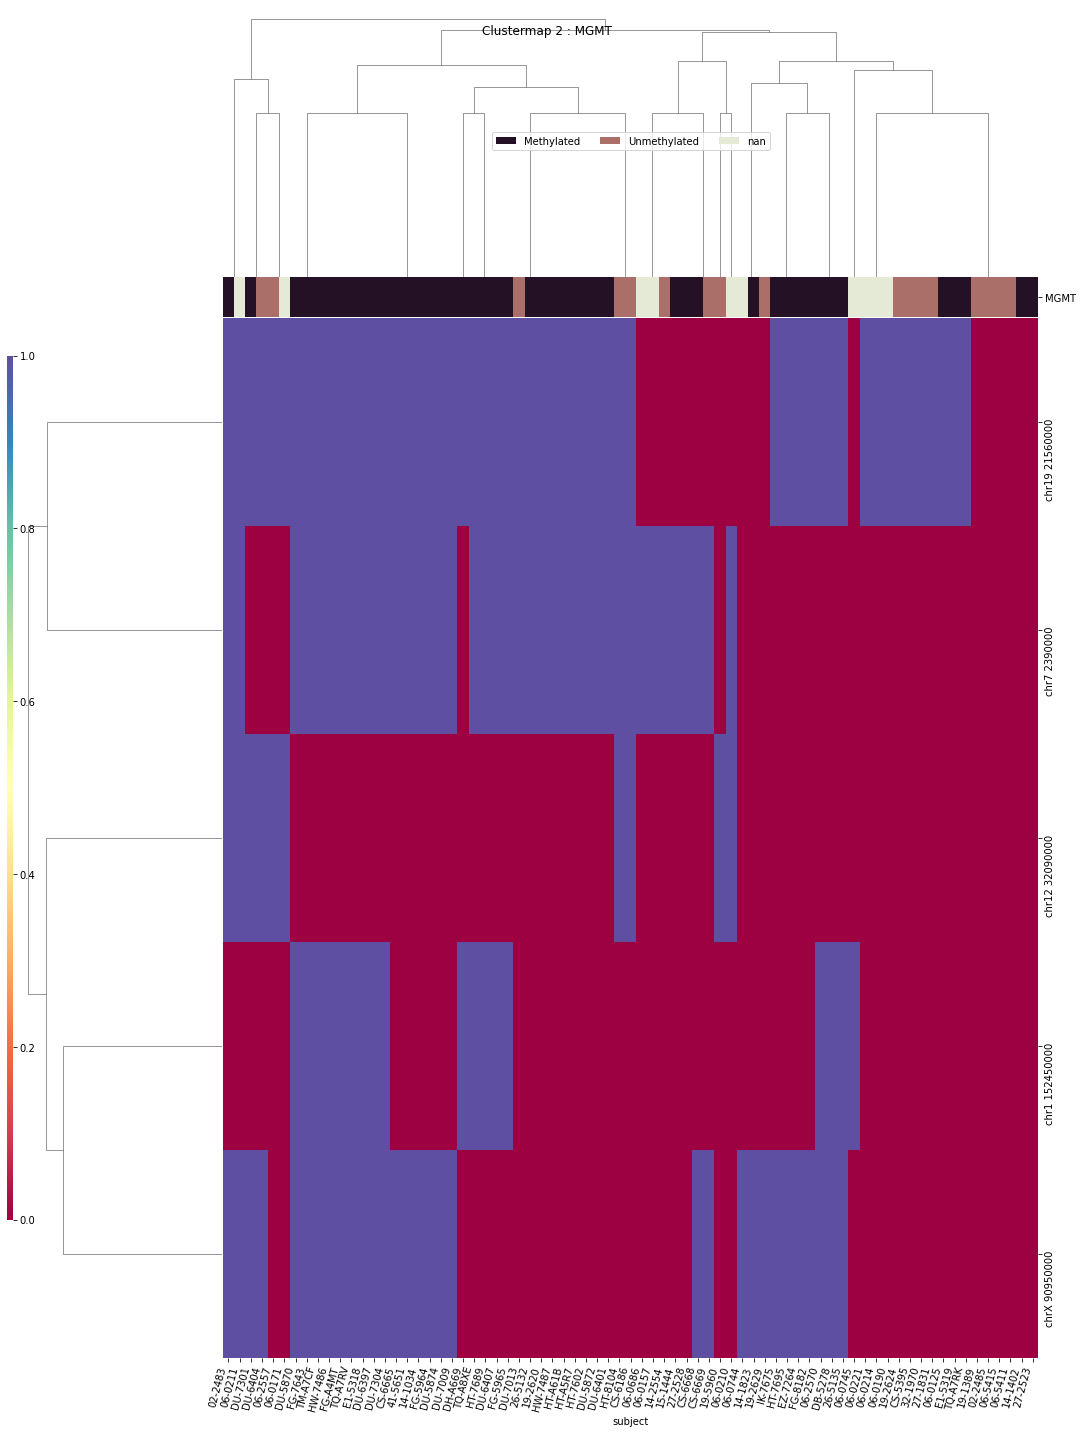

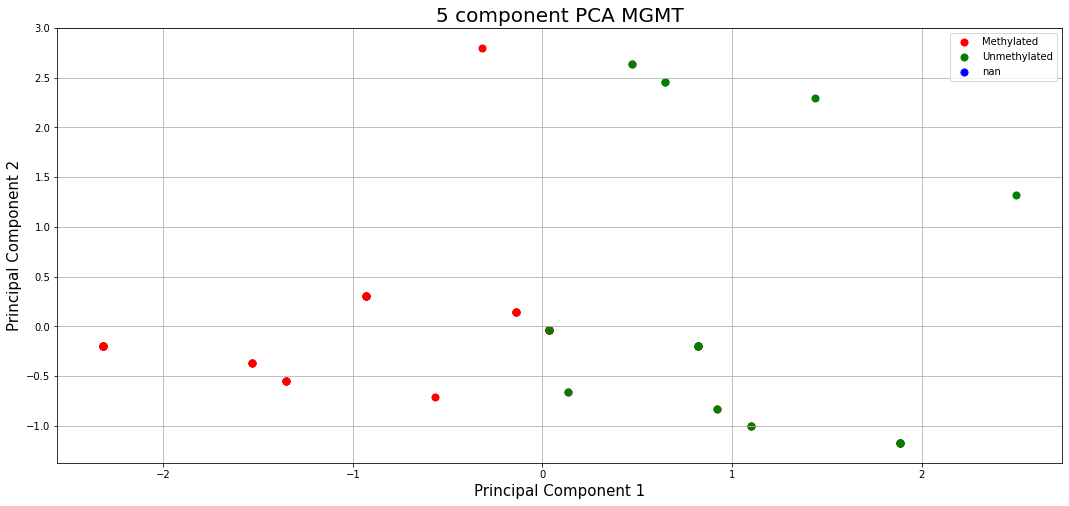

In [112]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)

In [113]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 18:32:20'

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 10020000' 'chr1 104130000' 'chr1 108150000' 'chr1 111360000'
 'chr1 120420000' 'chr1 144450000' 'chr1 146940000' 'chr1 147240000'
 'chr1 148130000' 'chr1 152450000' 'chr1 156170000' 'chr1 160650000'
 'chr1 246080000' 'chr1 29350000' 'chr1 33060000' 'chr1 48170000'
 'chr1 65140000' 'chr1 75370000' 'chr1 9000000' 'chr1 99830000'
 'chr10 107800000' 'chr10 130620000' 'chr10 133540000' 'chr10 26890000'
 'chr10 2800000' 'chr10 43330000' 'chr10 90300000' 'chr10 99250000'
 'chr11 60710000' 'chr11 62380000' 'chr11 62850000' 'chr12 10570000'
 'chr12 123490000' 'chr12 123580000' 'chr12 58330000' 'chr12 73000000'
 'chr12 73340000' 'chr12 75440000' 'chr13 95260000' 'chr14 105670000'
 'chr14 77410000' 'chr15 100770000' 'chr15 65730000' 'chr16 21220000'
 'chr16 2210000' 'chr16 4770000' 'chr16 47860000' 'chr16 57200000'
 'chr16 5750000' 'chr16 66950000' 'chr17 19470000' 'chr17 21590000'
 'chr17 30560000' 'chr18 26920000' 'chr18 41180000' 'c

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


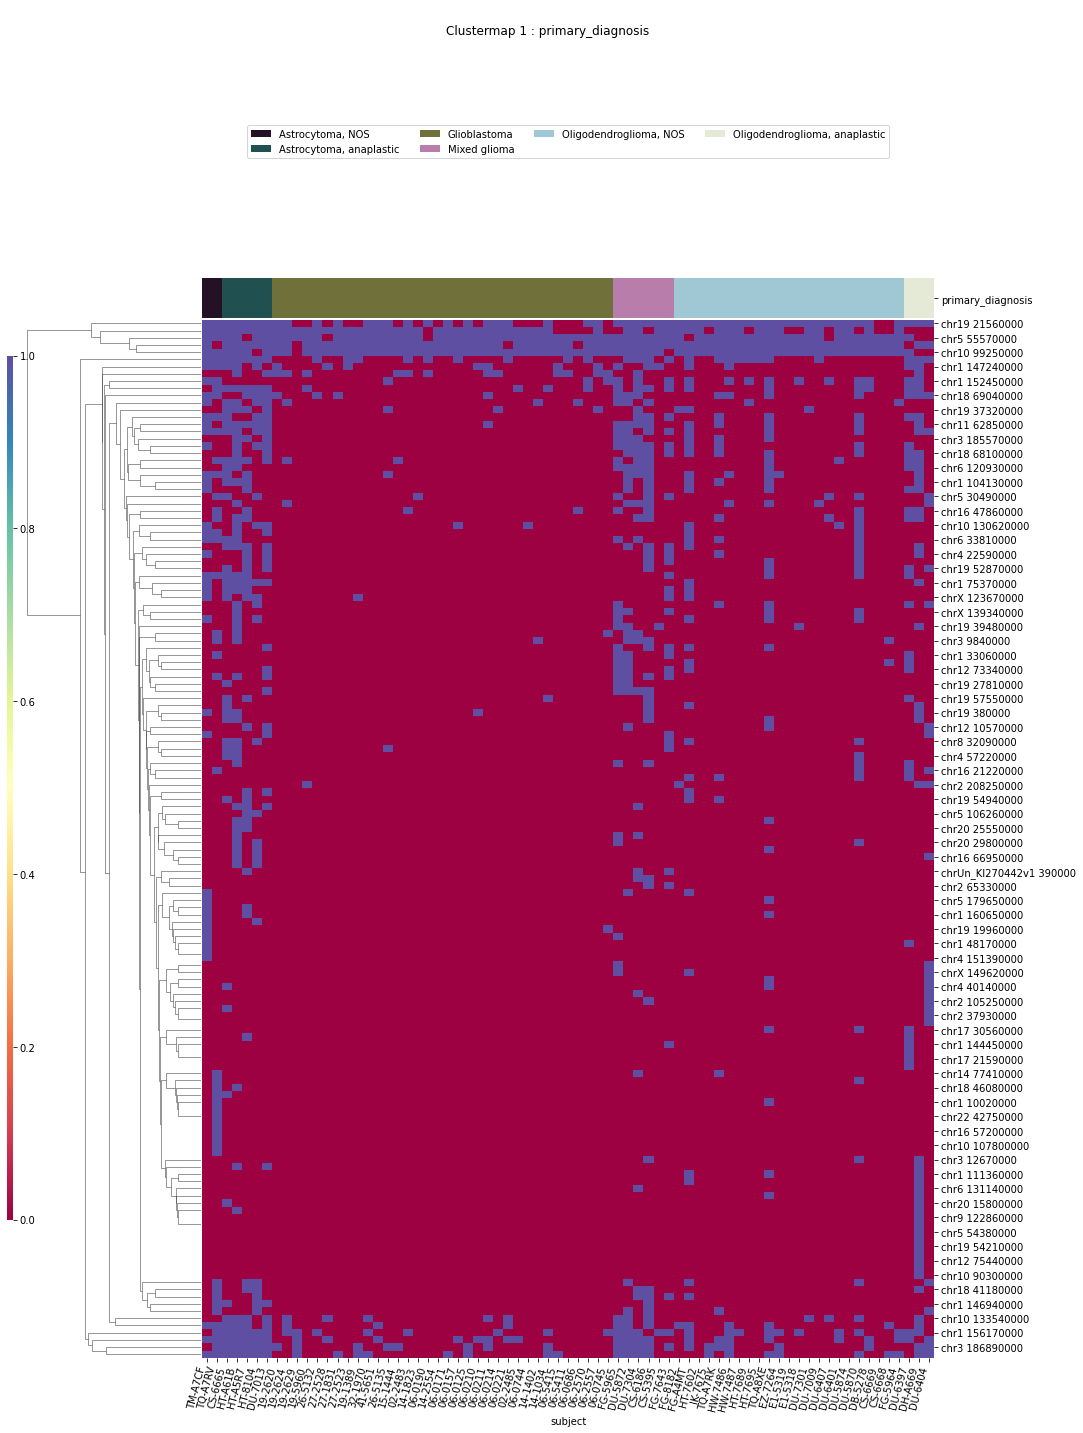

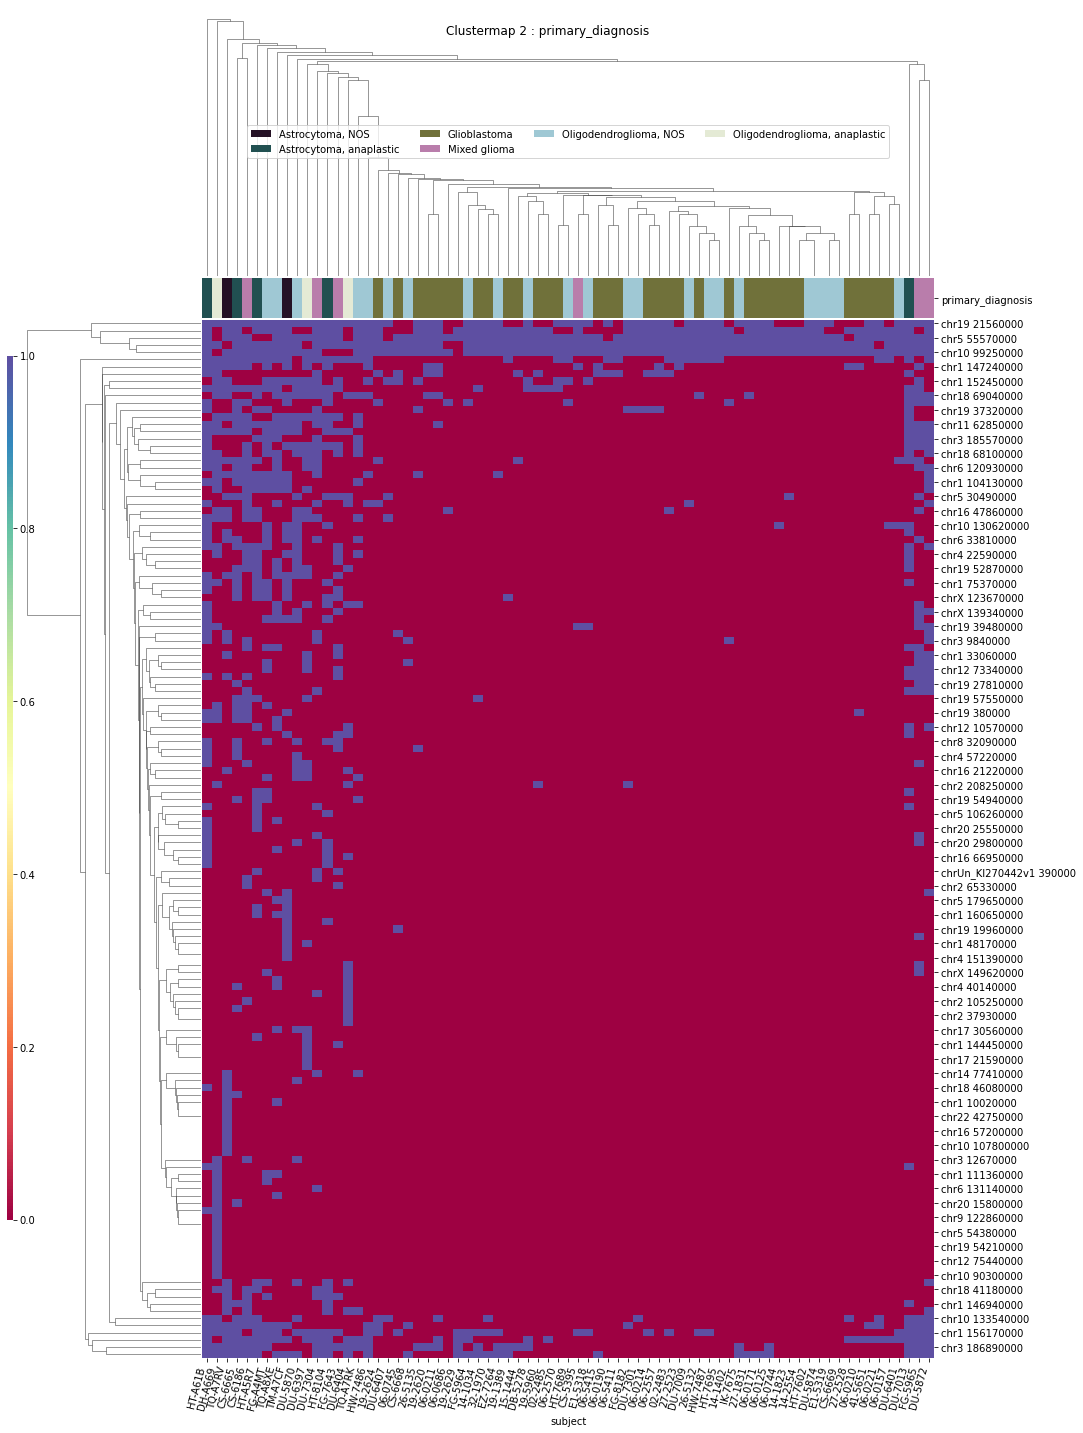

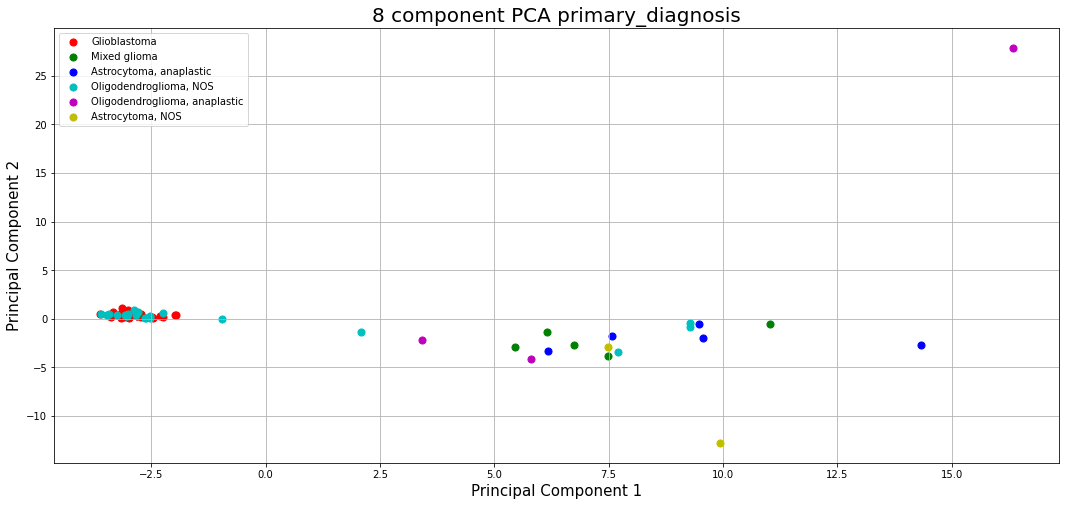

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr19 21560000' 'subject']
Not enough data to produce cluster maps
x1p19q
T-Testing
Boxplotting
Clustermapping
['subject' 'x1p19q']
Not enough data to produce cluster maps
TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr3 185570000' 'chr6 33810000' 'subject']


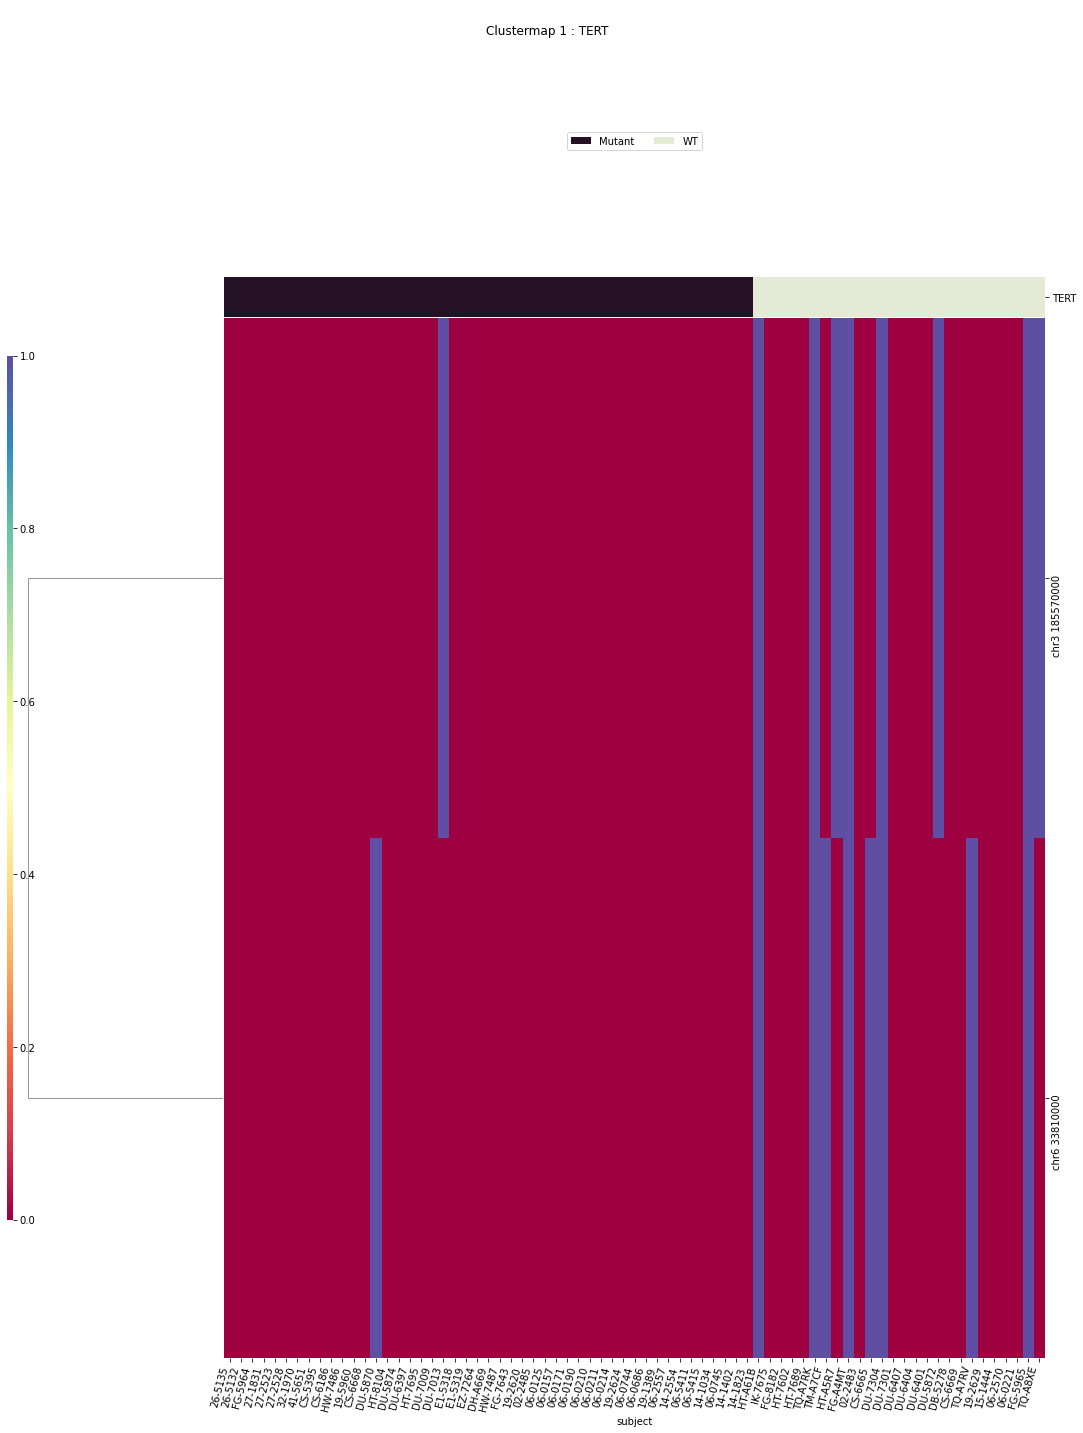

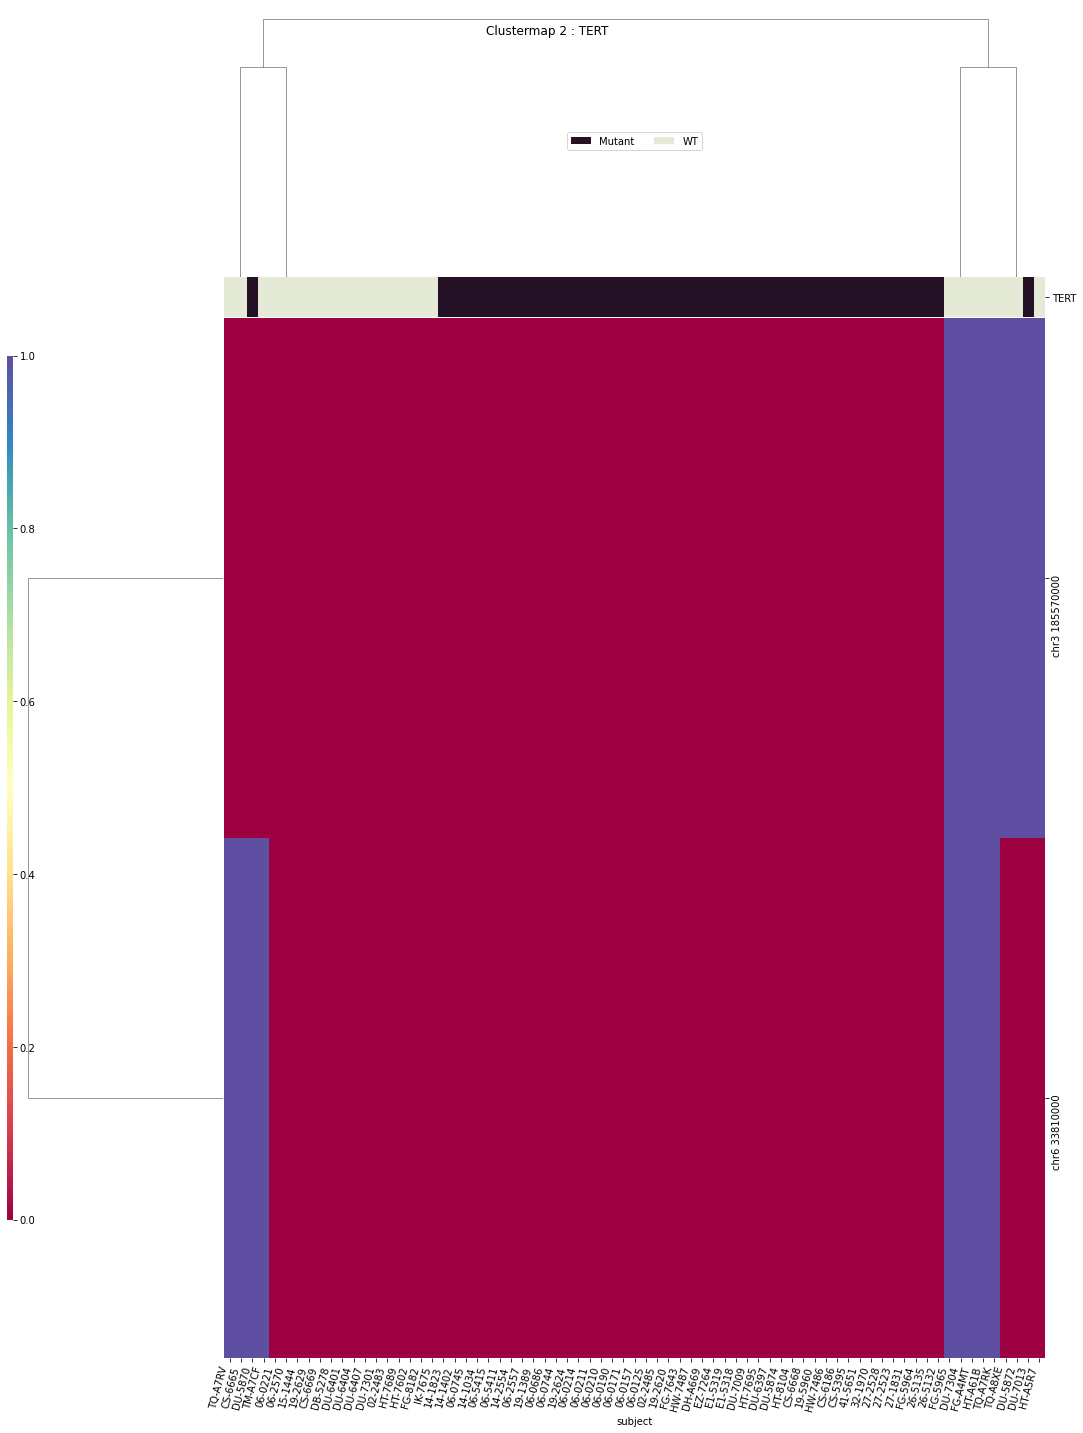

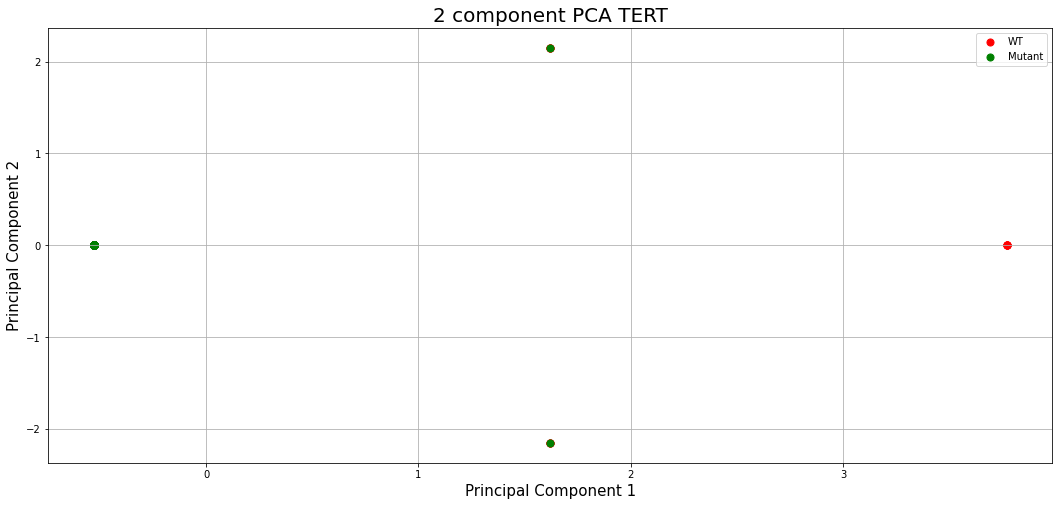

disease_type
T-Testing
Boxplotting
Clustermapping
['chr11 60710000' 'chr11 62850000' 'chr14 77790000' 'chr16 35200000'
 'chr18 68100000' 'chr19 20150000' 'chr19 21560000' 'chr3 185560000'
 'chr8 42790000' 'chr8 43740000' 'disease_type' 'subject']


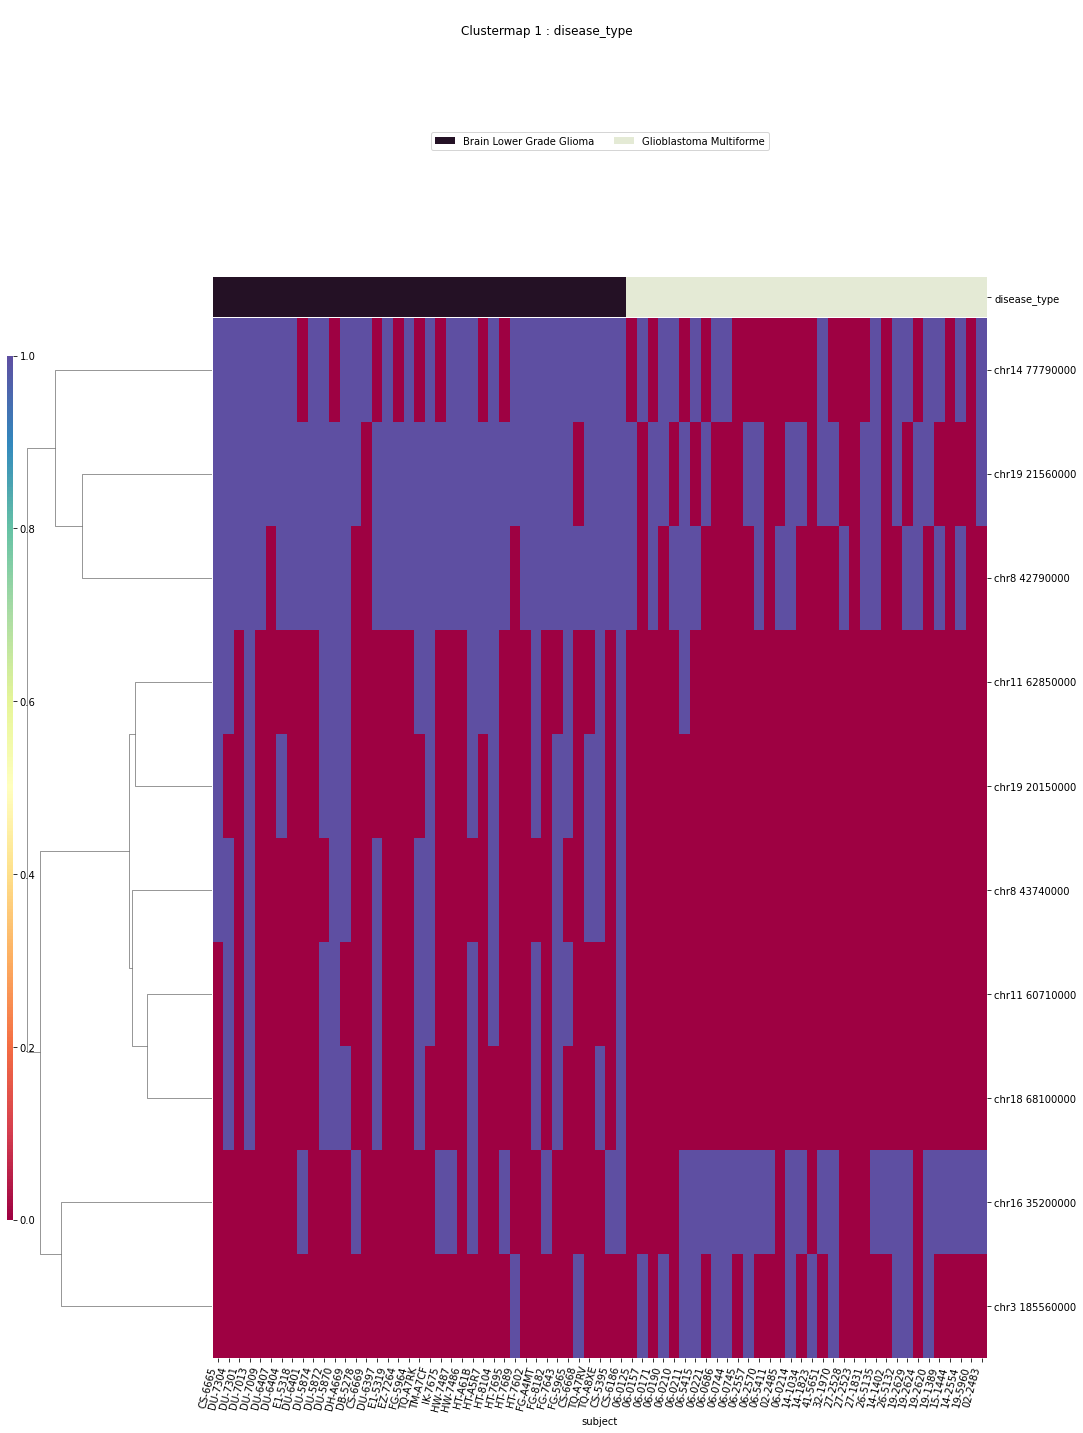

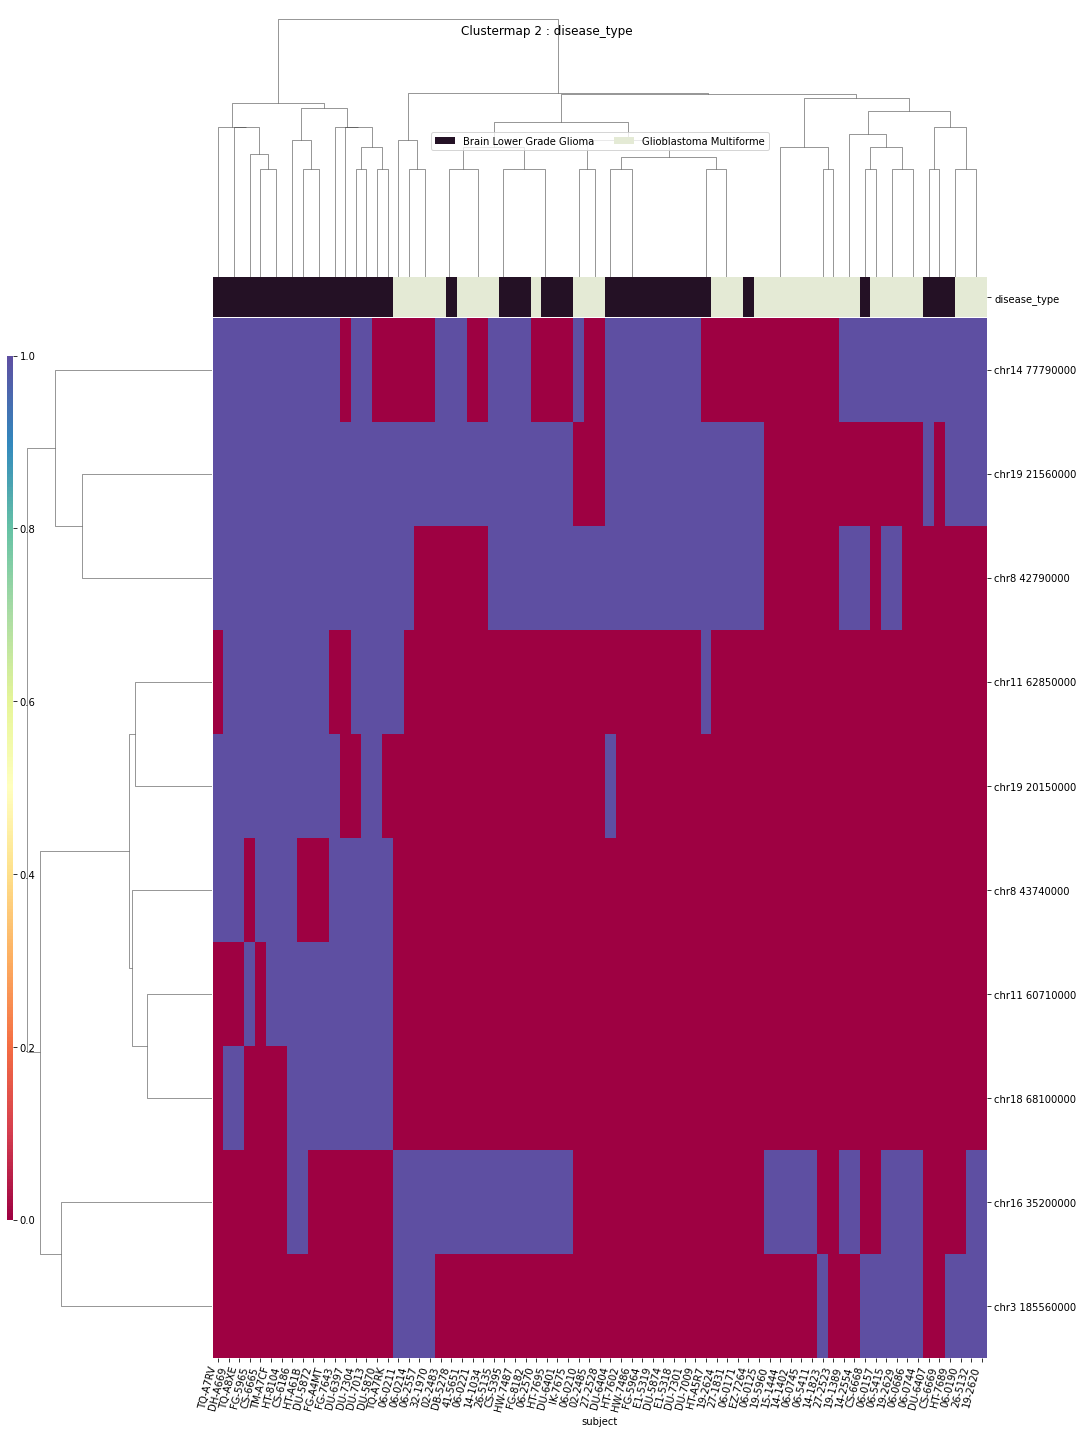

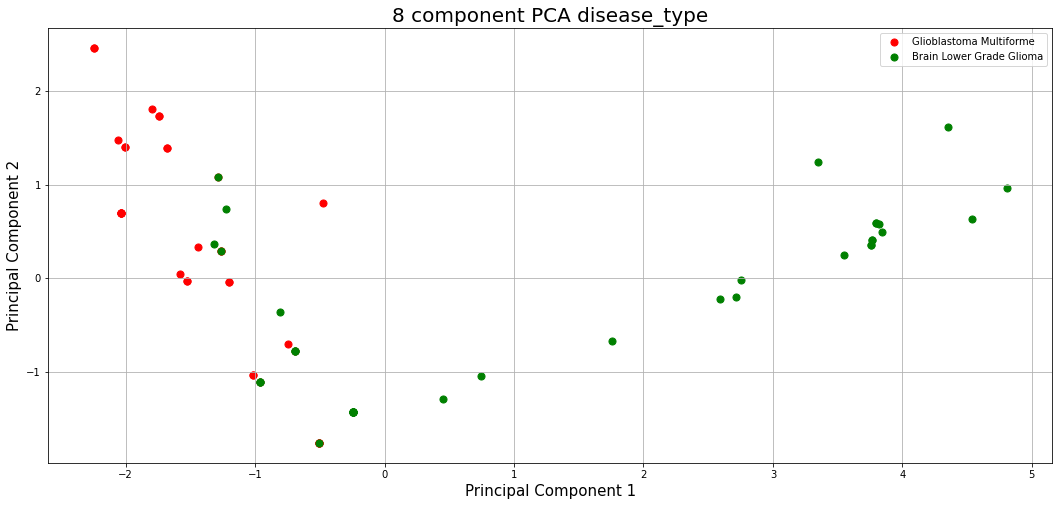

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 104130000' 'chr3 185570000' 'chr6 33810000'
 'chr7 158230000' 'chrX 90950000' 'subject']


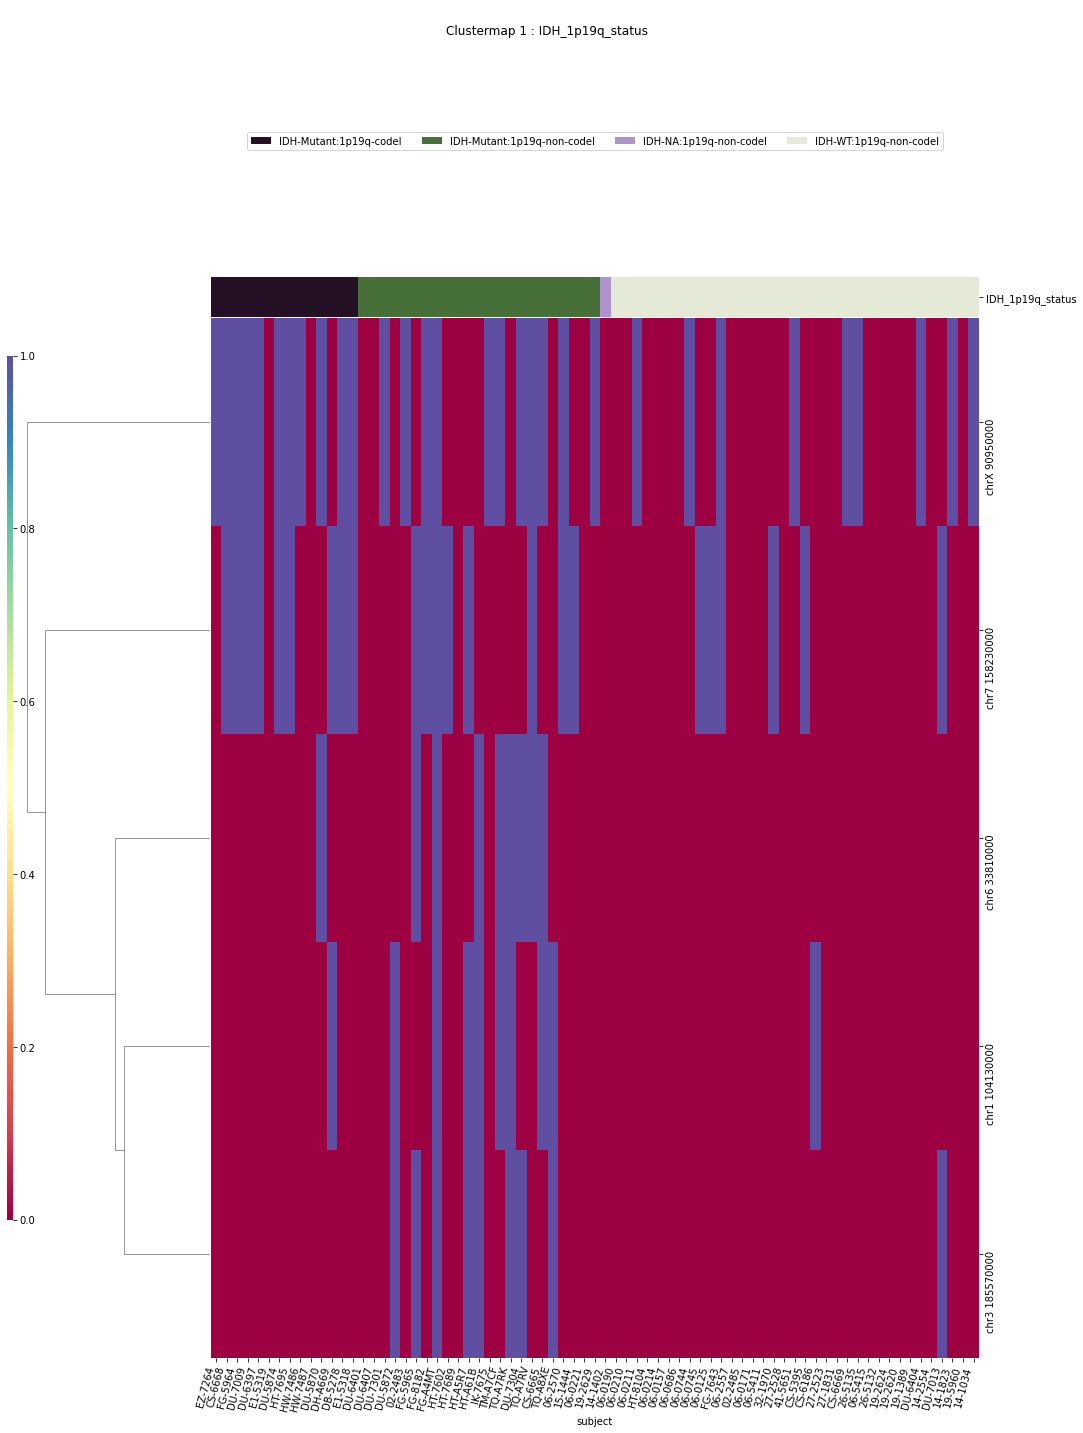

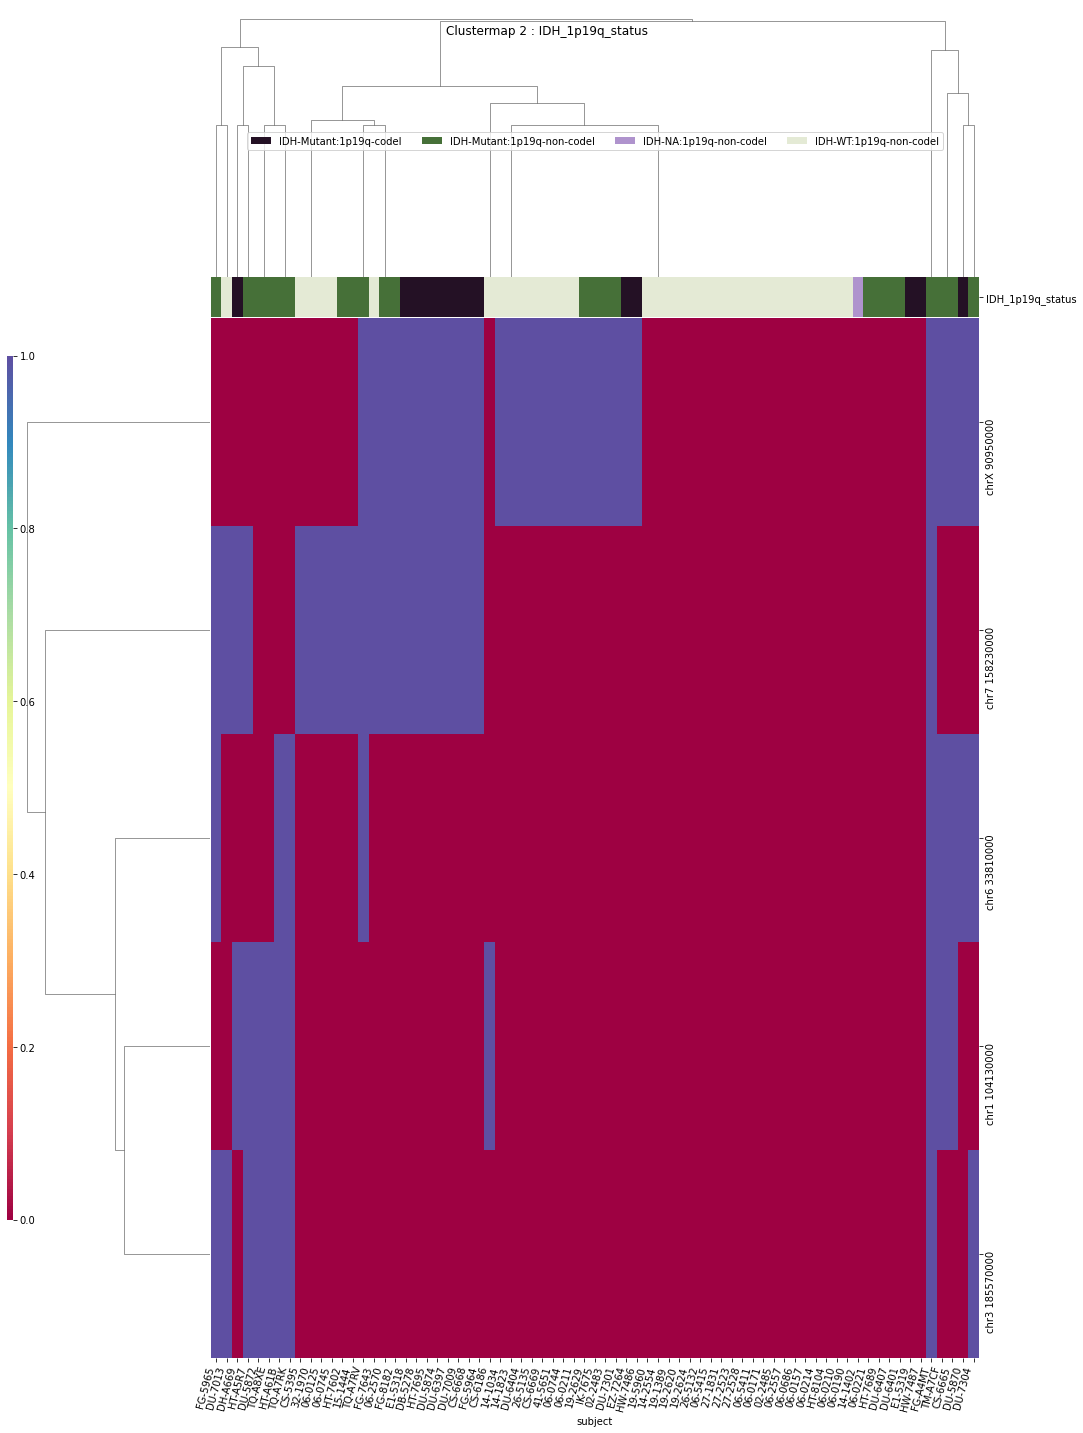

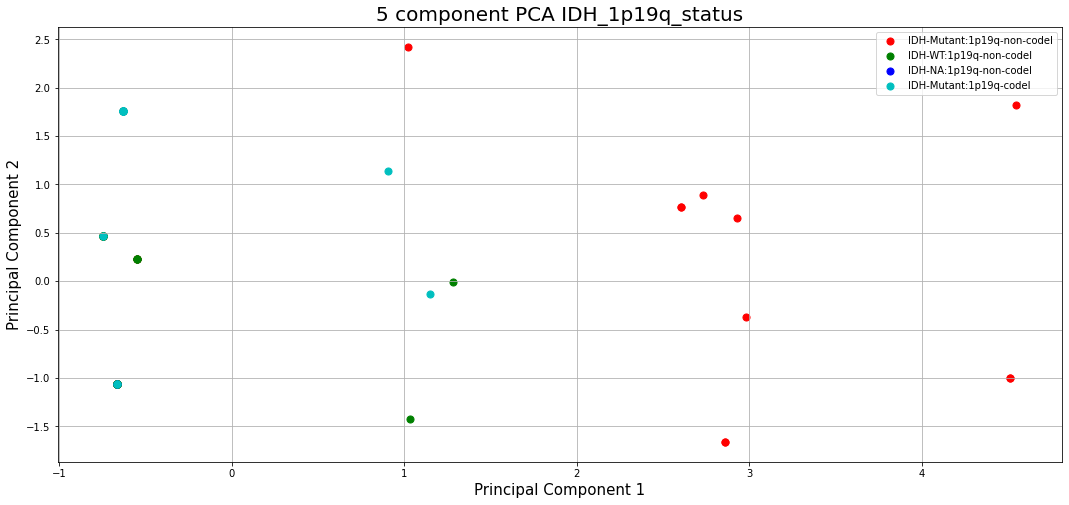

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104130000' 'chr1 111520000' 'chr1 120420000'
 'chr1 144450000' 'chr1 146940000' 'chr1 147100000' 'chr1 15130000'
 'chr1 160650000' 'chr1 166600000' 'chr1 209140000' 'chr1 246080000'
 'chr1 29350000' 'chr1 33060000' 'chr1 45510000' 'chr1 46320000'
 'chr1 65140000' 'chr1 75370000' 'chr1 89060000' 'chr1 9000000'
 'chr1 99830000' 'chr10 130620000' 'chr10 43330000' 'chr10 99250000'
 'chr11 118720000' 'chr11 62320000' 'chr11 62850000' 'chr12 10570000'
 'chr12 123490000' 'chr12 58330000' 'chr12 73000000' 'chr12 73340000'
 'chr13 95260000' 'chr14 20260000' 'chr14 64970000' 'chr15 101860000'
 'chr15 65730000' 'chr16 2210000' 'chr16 23590000' 'chr16 35200000'
 'chr16 5750000' 'chr16 66950000' 'chr18 31810000' 'chr18 41180000'
 'chr18 67070000' 'chr18 68100000' 'chr18 69040000' 'chr19 18000000'
 'chr19 20150000' 'chr19 20460000' 'chr19 27810000' 'chr19 29360000'
 'chr19 36230000' 'chr19 37320000' 'chr19 380000' 'chr19 39470000'
 

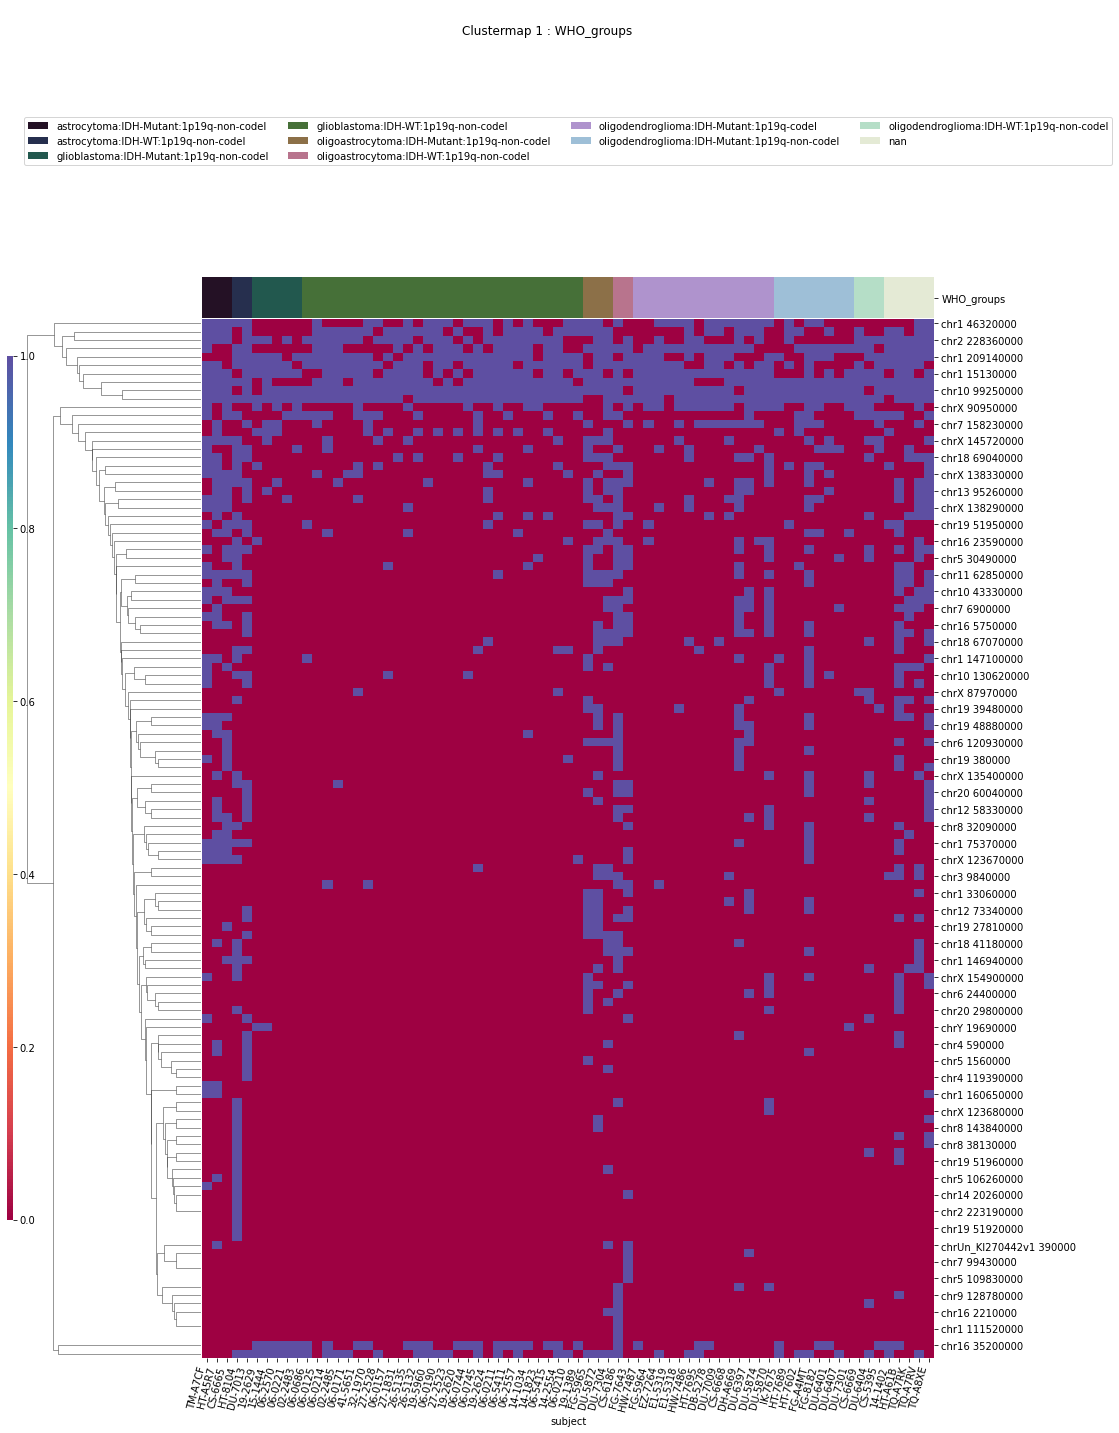

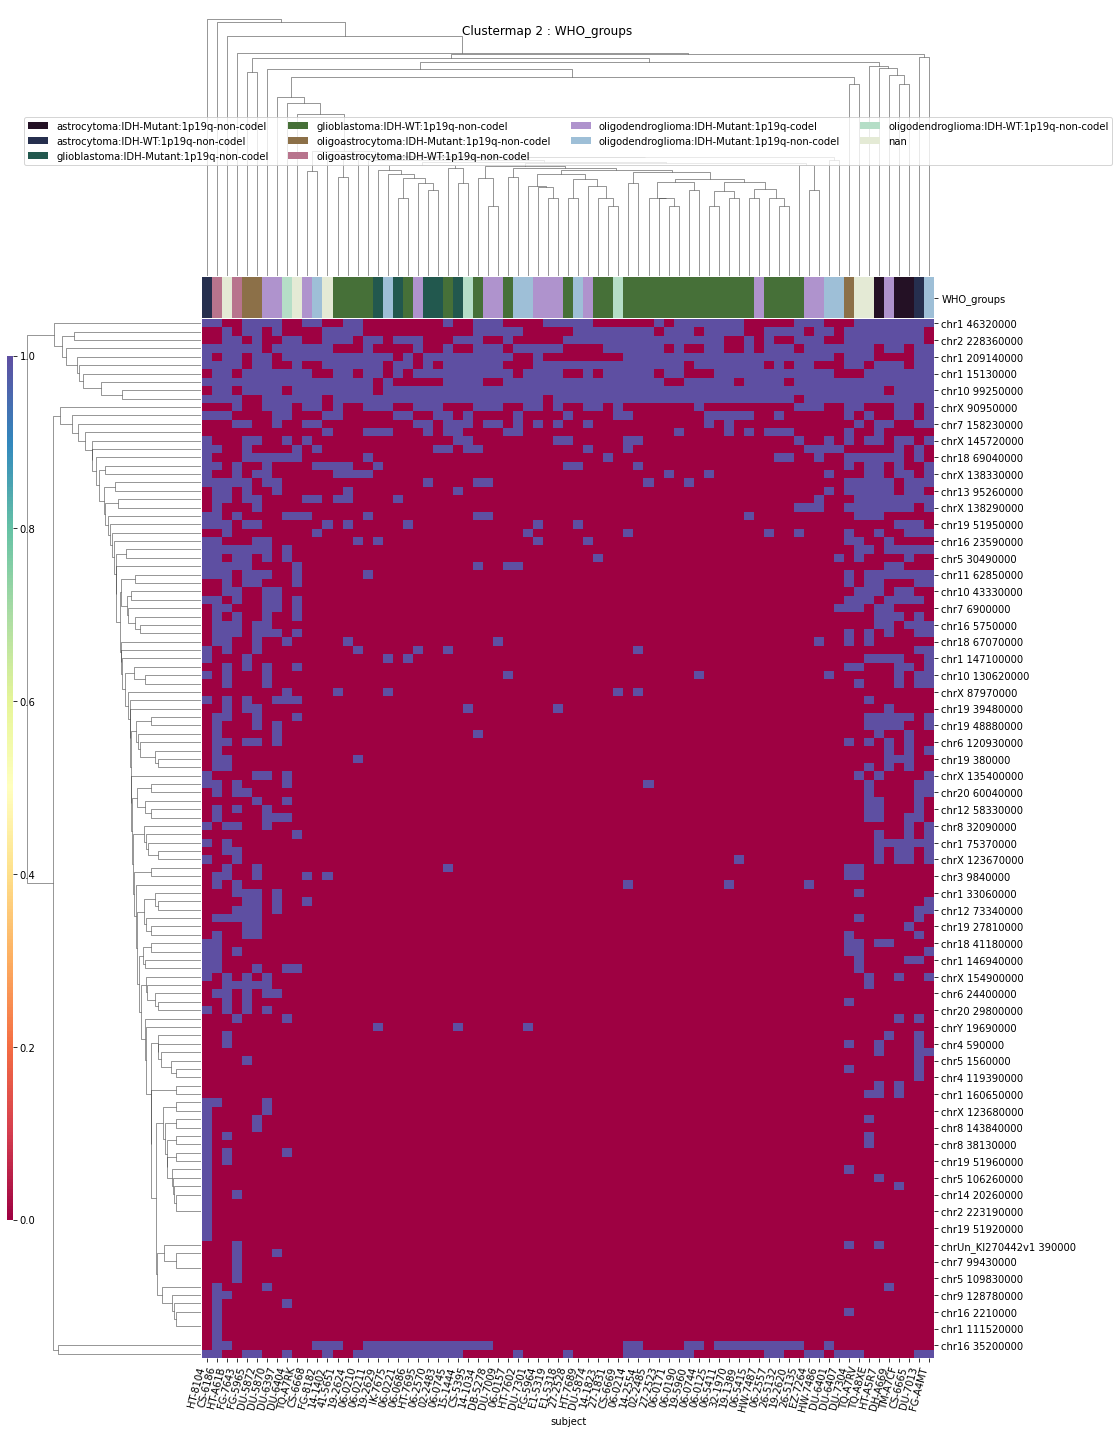

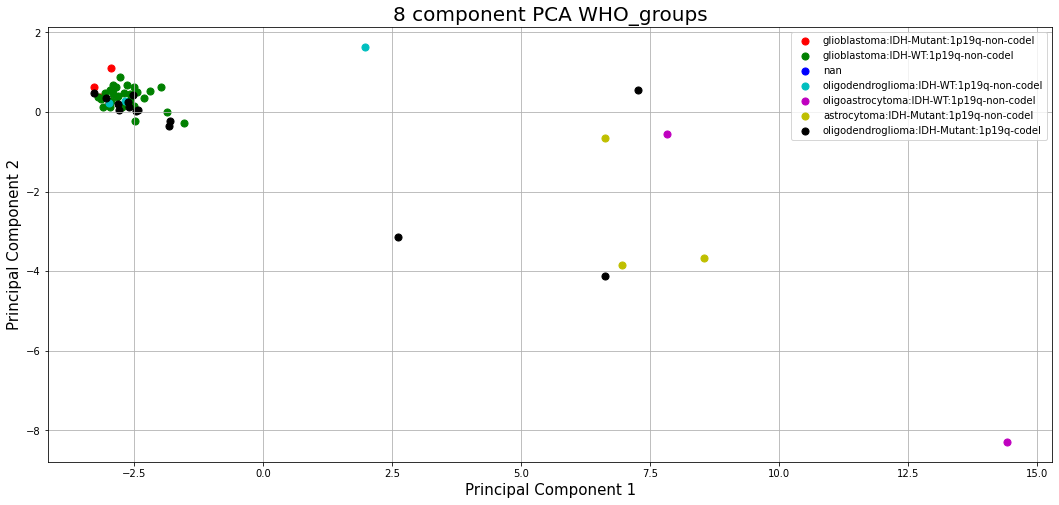

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 46390000' 'chr12 123580000' 'chr16 21220000'
 'chr2 105250000' 'chr2 201130000' 'chr2 37930000' 'chr20 18490000'
 'chr22 23530000' 'chr4 159970000' 'chr4 40140000' 'chr5 122910000'
 'chr6 160840000' 'chr6 33810000' 'chr7 102830000' 'chrX 135300000'
 'chrX 149620000' 'chrX 77760000' 'chrX 87970000' 'chrX 90950000'
 'subject']


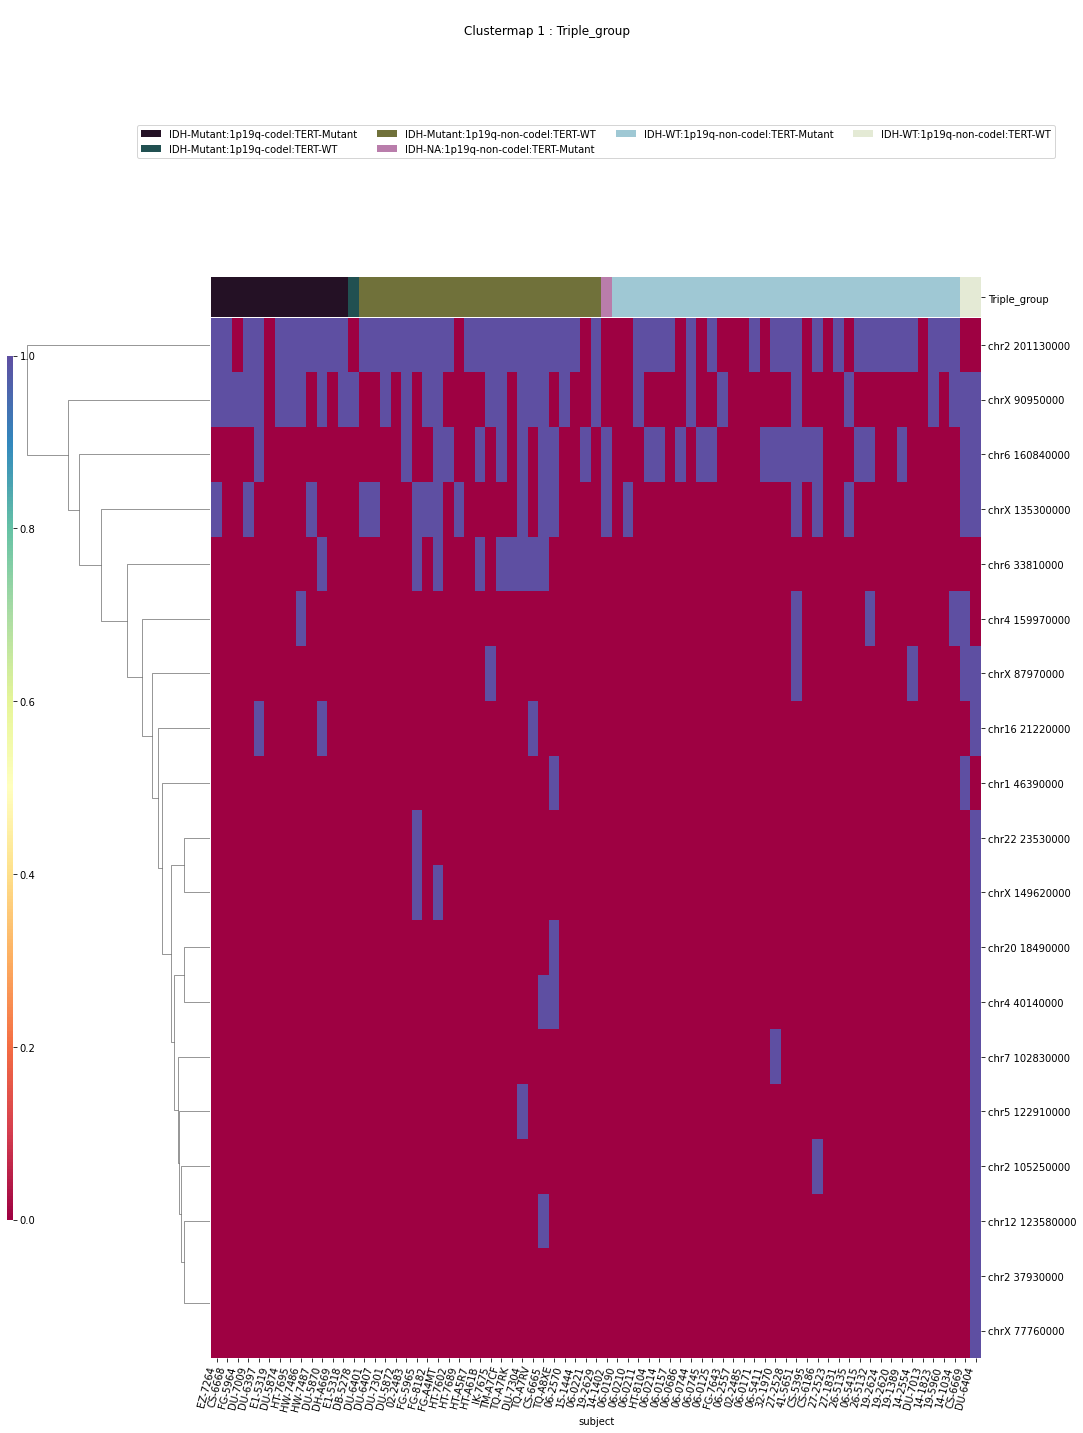

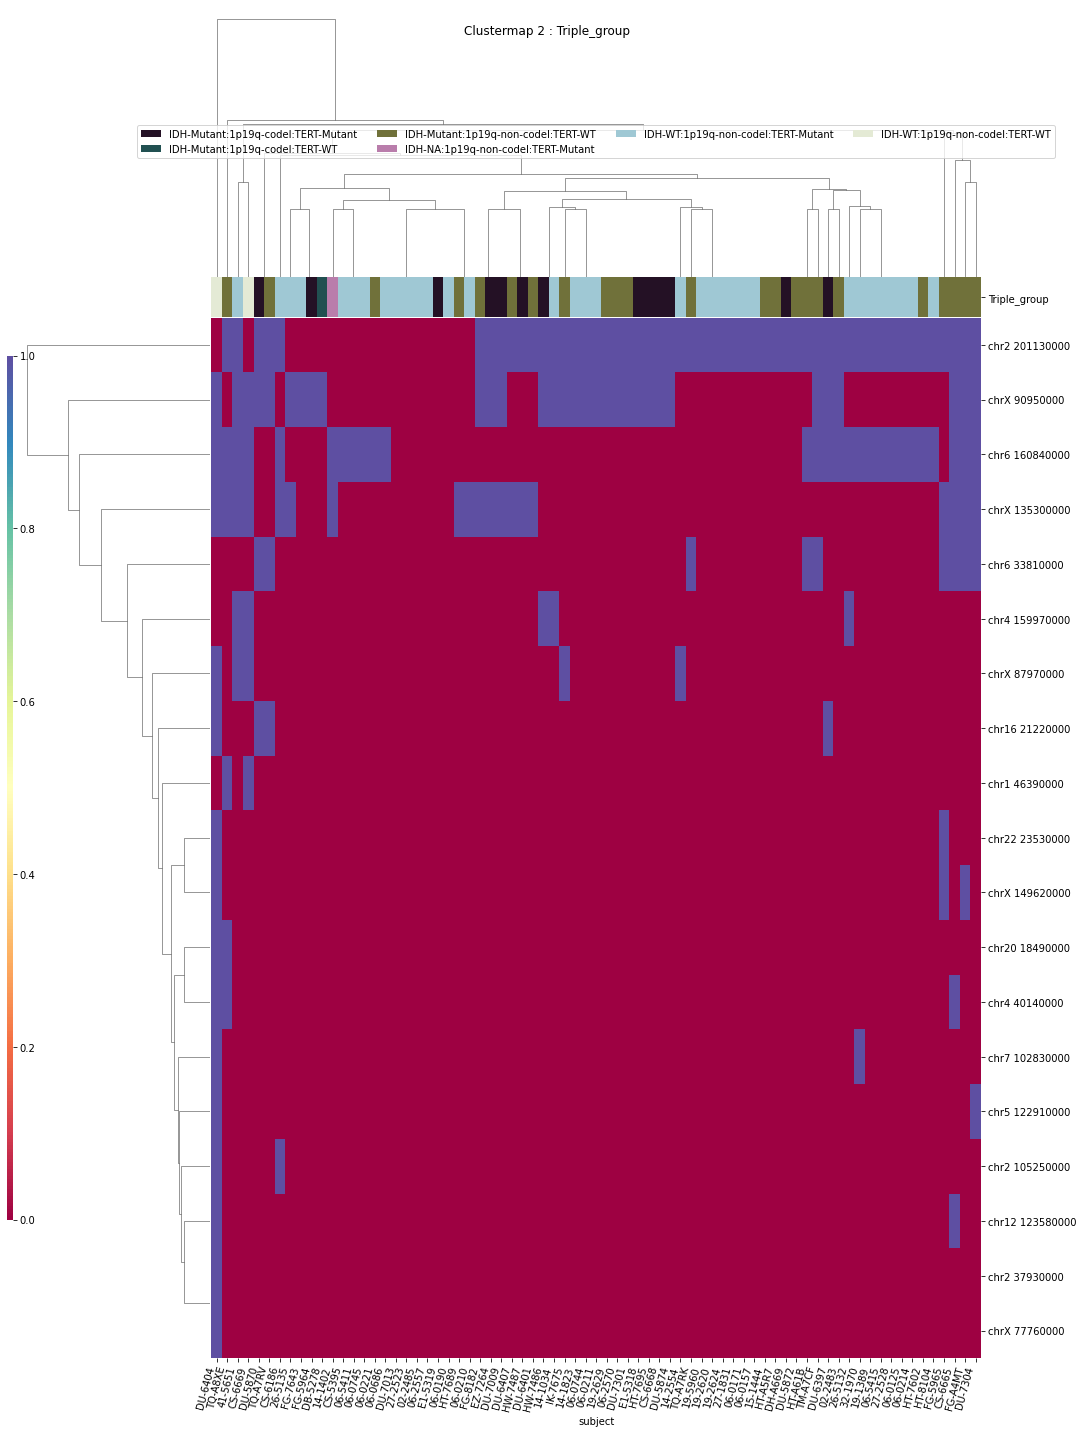

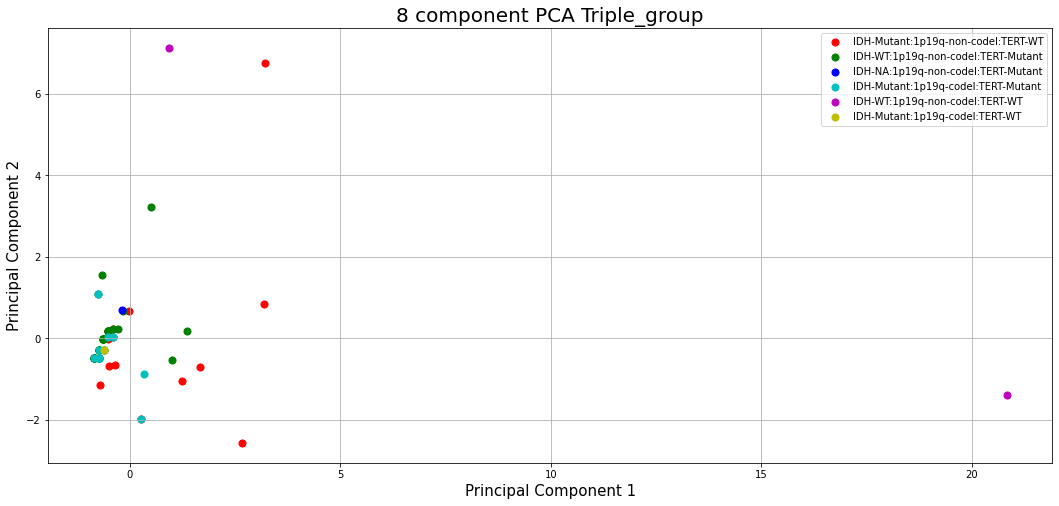

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'subject']
Not enough data to produce cluster maps


In [114]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)

In [115]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 19:05:22'

---

In [116]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [117]:
pd.set_option('display.max_columns', default_max_columns)

In [118]:
pd.set_option('display.max_rows',default_max_rows)

In [119]:
pd.set_option('display.precision', default_precision)